# DST-II for 2D-signals

In [ ]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Importing libraries and defining some useful functions

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
from dst import S, build_shapelet
import os
from skimage import draw
import pywt
from skimage import io

In [83]:
def detect_pattern(image,threshold=0.6):
    positions = []
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i][j] >= threshold:
                print(f'Detection at position {i,j} with value {image[i][j]}')
                positions.append((i,j))
    return positions

In [ ]:
def make_gaussian(size, fwhm=3, center=None):
    """ 
    Make a square gaussian kernel.
    size is the length of a side of the square
    fwhm is full-width-half-maximum, which
    can be thought of as an effective radius.
    """
    x = np.arange(0, size, 1, float)
    y = x[:, np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)

In [ ]:
def make_rectangle(image_size, size, start_position):
    """ 
    Make a image with a rectangle.
    """
    image = np.zeros(image_size)
    for i in range(size[0]):
        for j in range(size[1]):
            image[i+start_position[0]][j+start_position[1]] = 1
    return image           

In [ ]:
def make_circle(size, stroke, radius):
    """ 
    Make a image with a circle.
    """
    if size is None:
        size = (200,200)
    arr = np.zeros(size)
    for delta in range(-(stroke // 2) + (stroke % 2), (stroke + 1) // 2):
        rr, cc, _ = draw.circle_perimeter_aa(size[0]//2,size[1]//2, 
                                             radius= radius+delta, shape=arr.shape)
        arr[rr, cc] = 1
    return arr

In [ ]:
def noisy(image):
    """ 
    Add gaussian noise to image
    """
    row, col = image.shape
    mean = 0
    var = 0.01
    sigma = var**0.5
    gauss = np.random.normal(mean, sigma, (row, col))
    gauss = gauss.reshape(row, col)
    noisy = image + gauss
    return noisy

## Images for experiments

In [88]:
gaussian = make_gaussian(50, 15, center=(30, 30))
noisy_gaussian = noisy(gaussian)

In [54]:
square_image = make_rectangle((50,50),(10,20),(4,10))
noisy_square_image = noisy(square_image)

In [55]:
circle = make_circle((50,50),5,10)
noisy_circle = noisy(circle)

In [56]:
several_shapes = io.imread('../datasets/patterns.png', as_gray=True)
noisy_several_shapes = noisy(several_shapes)

## First Approach: Traditional 2D-Wavelet Transform 

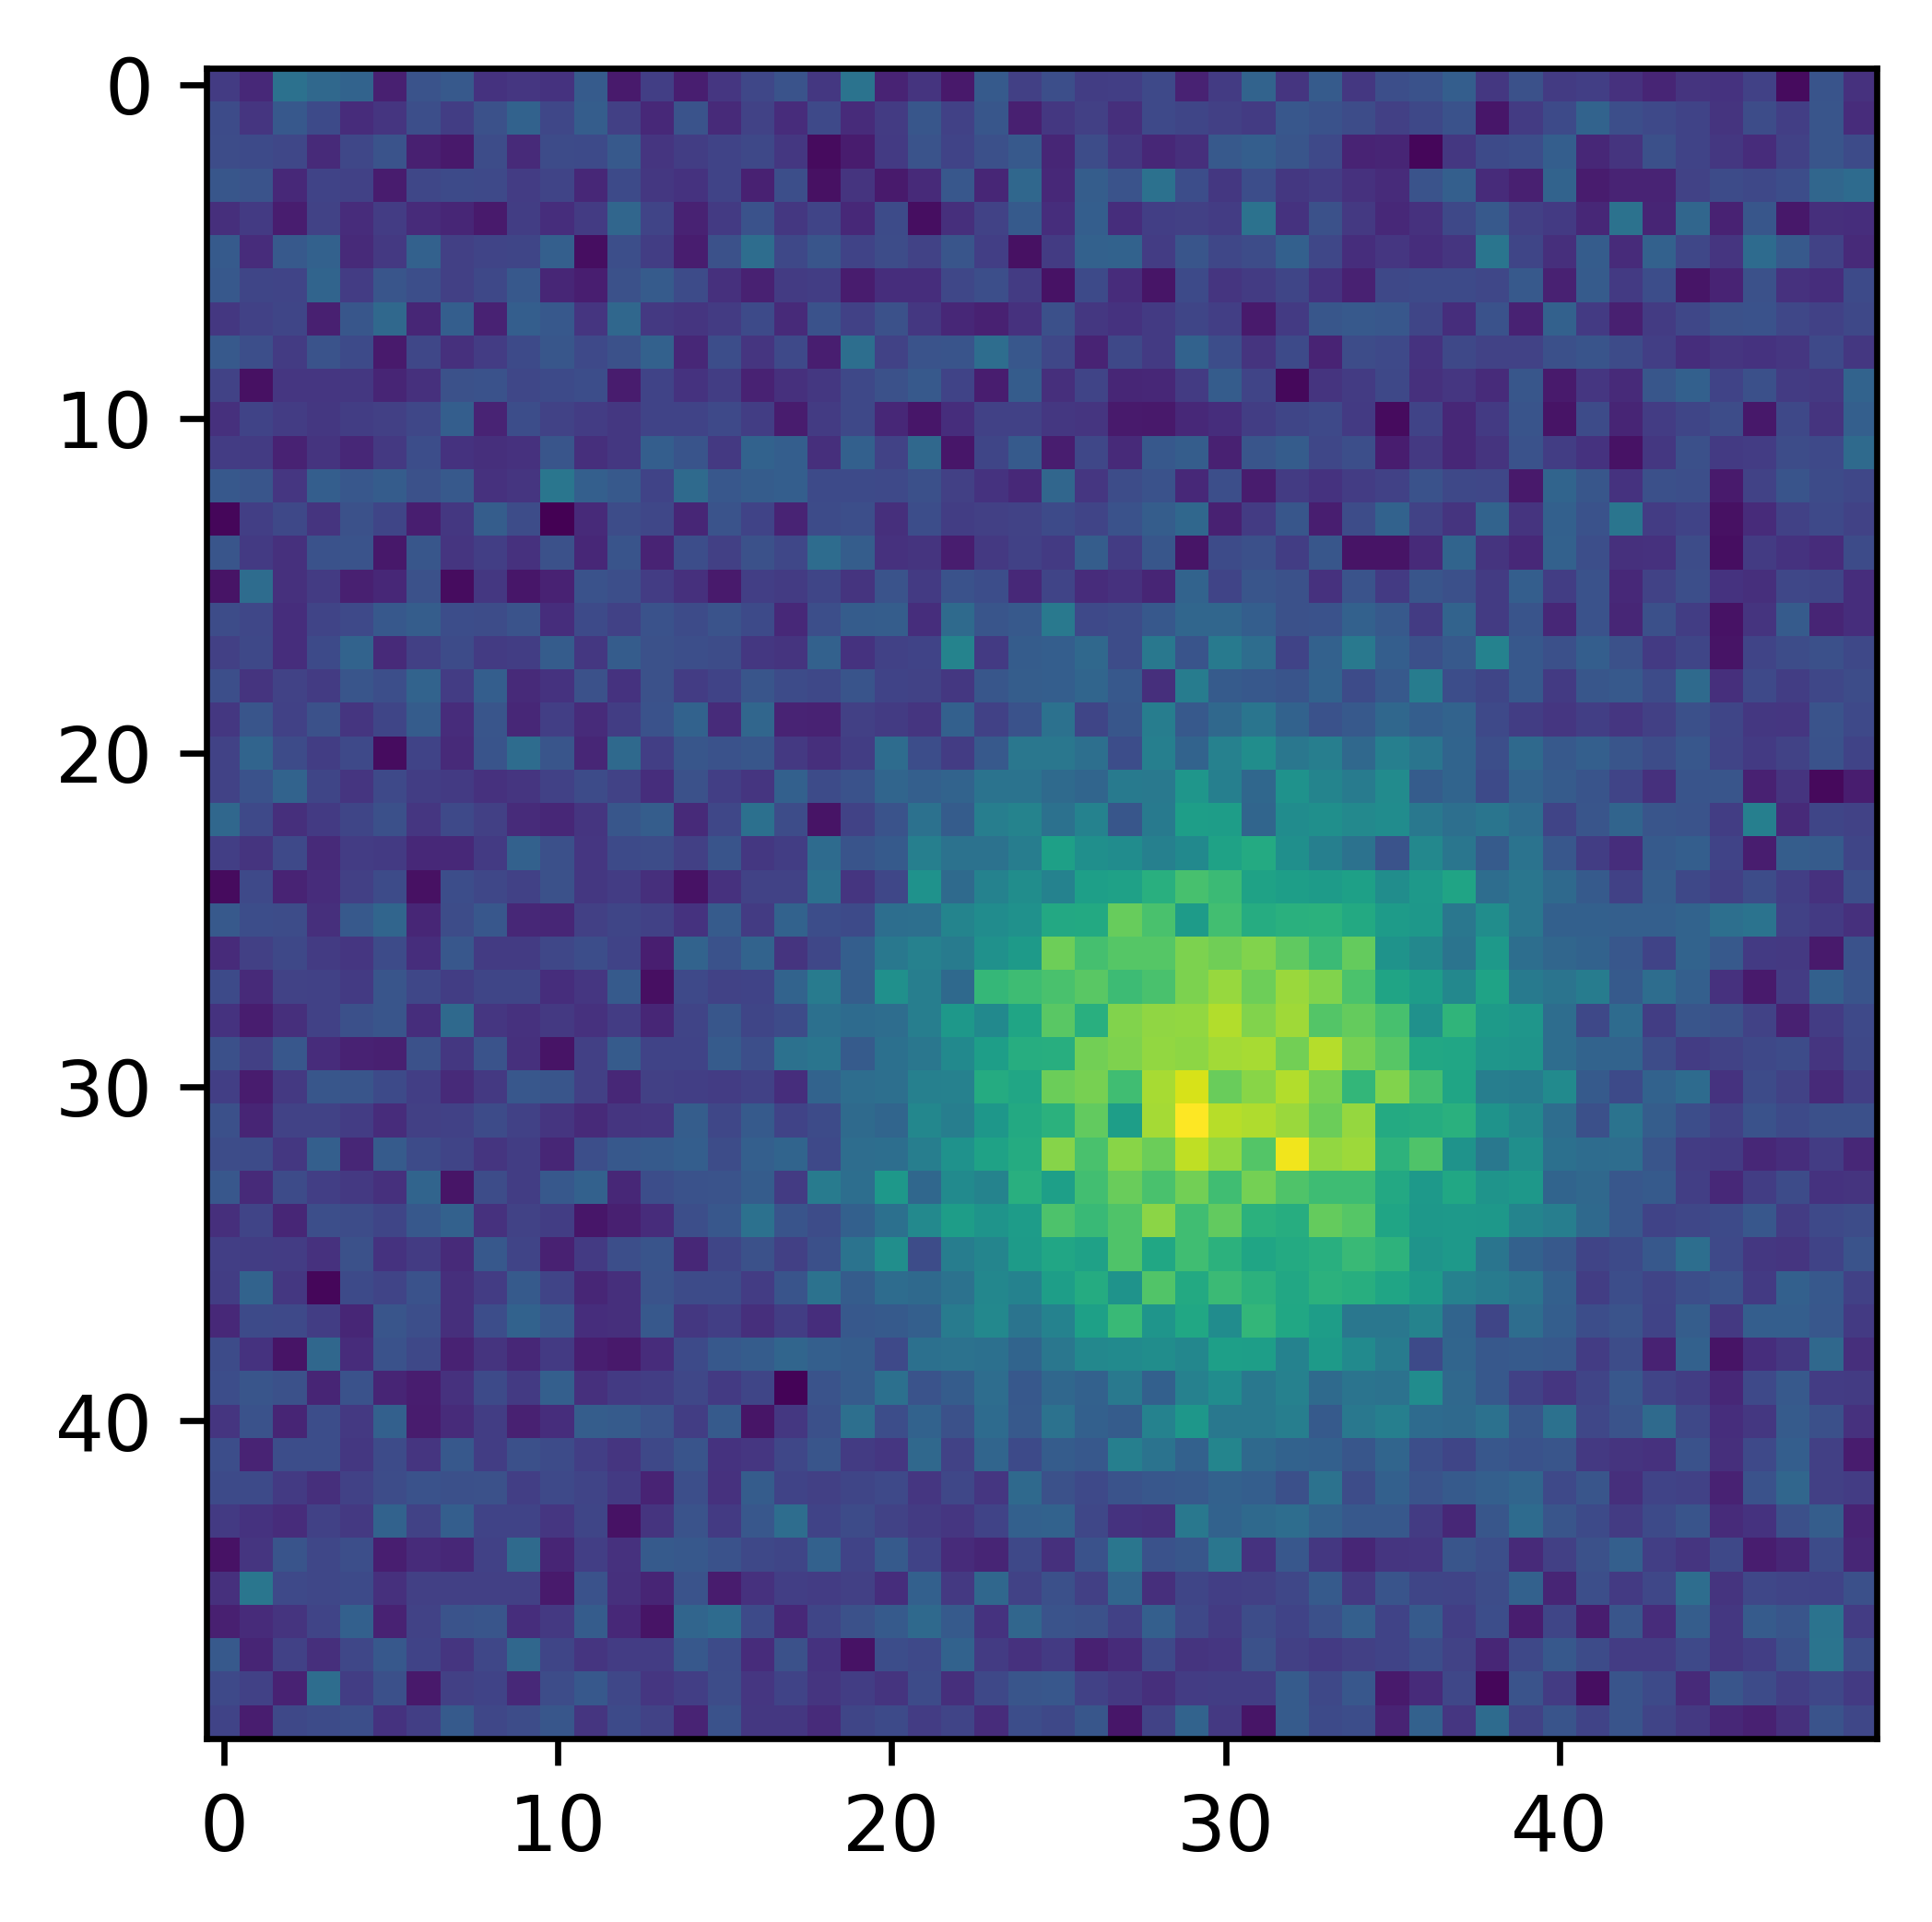

In [89]:
image = noisy_gaussian
plt.gcf().set_dpi(600)
plt.imshow(image)
plt.show()

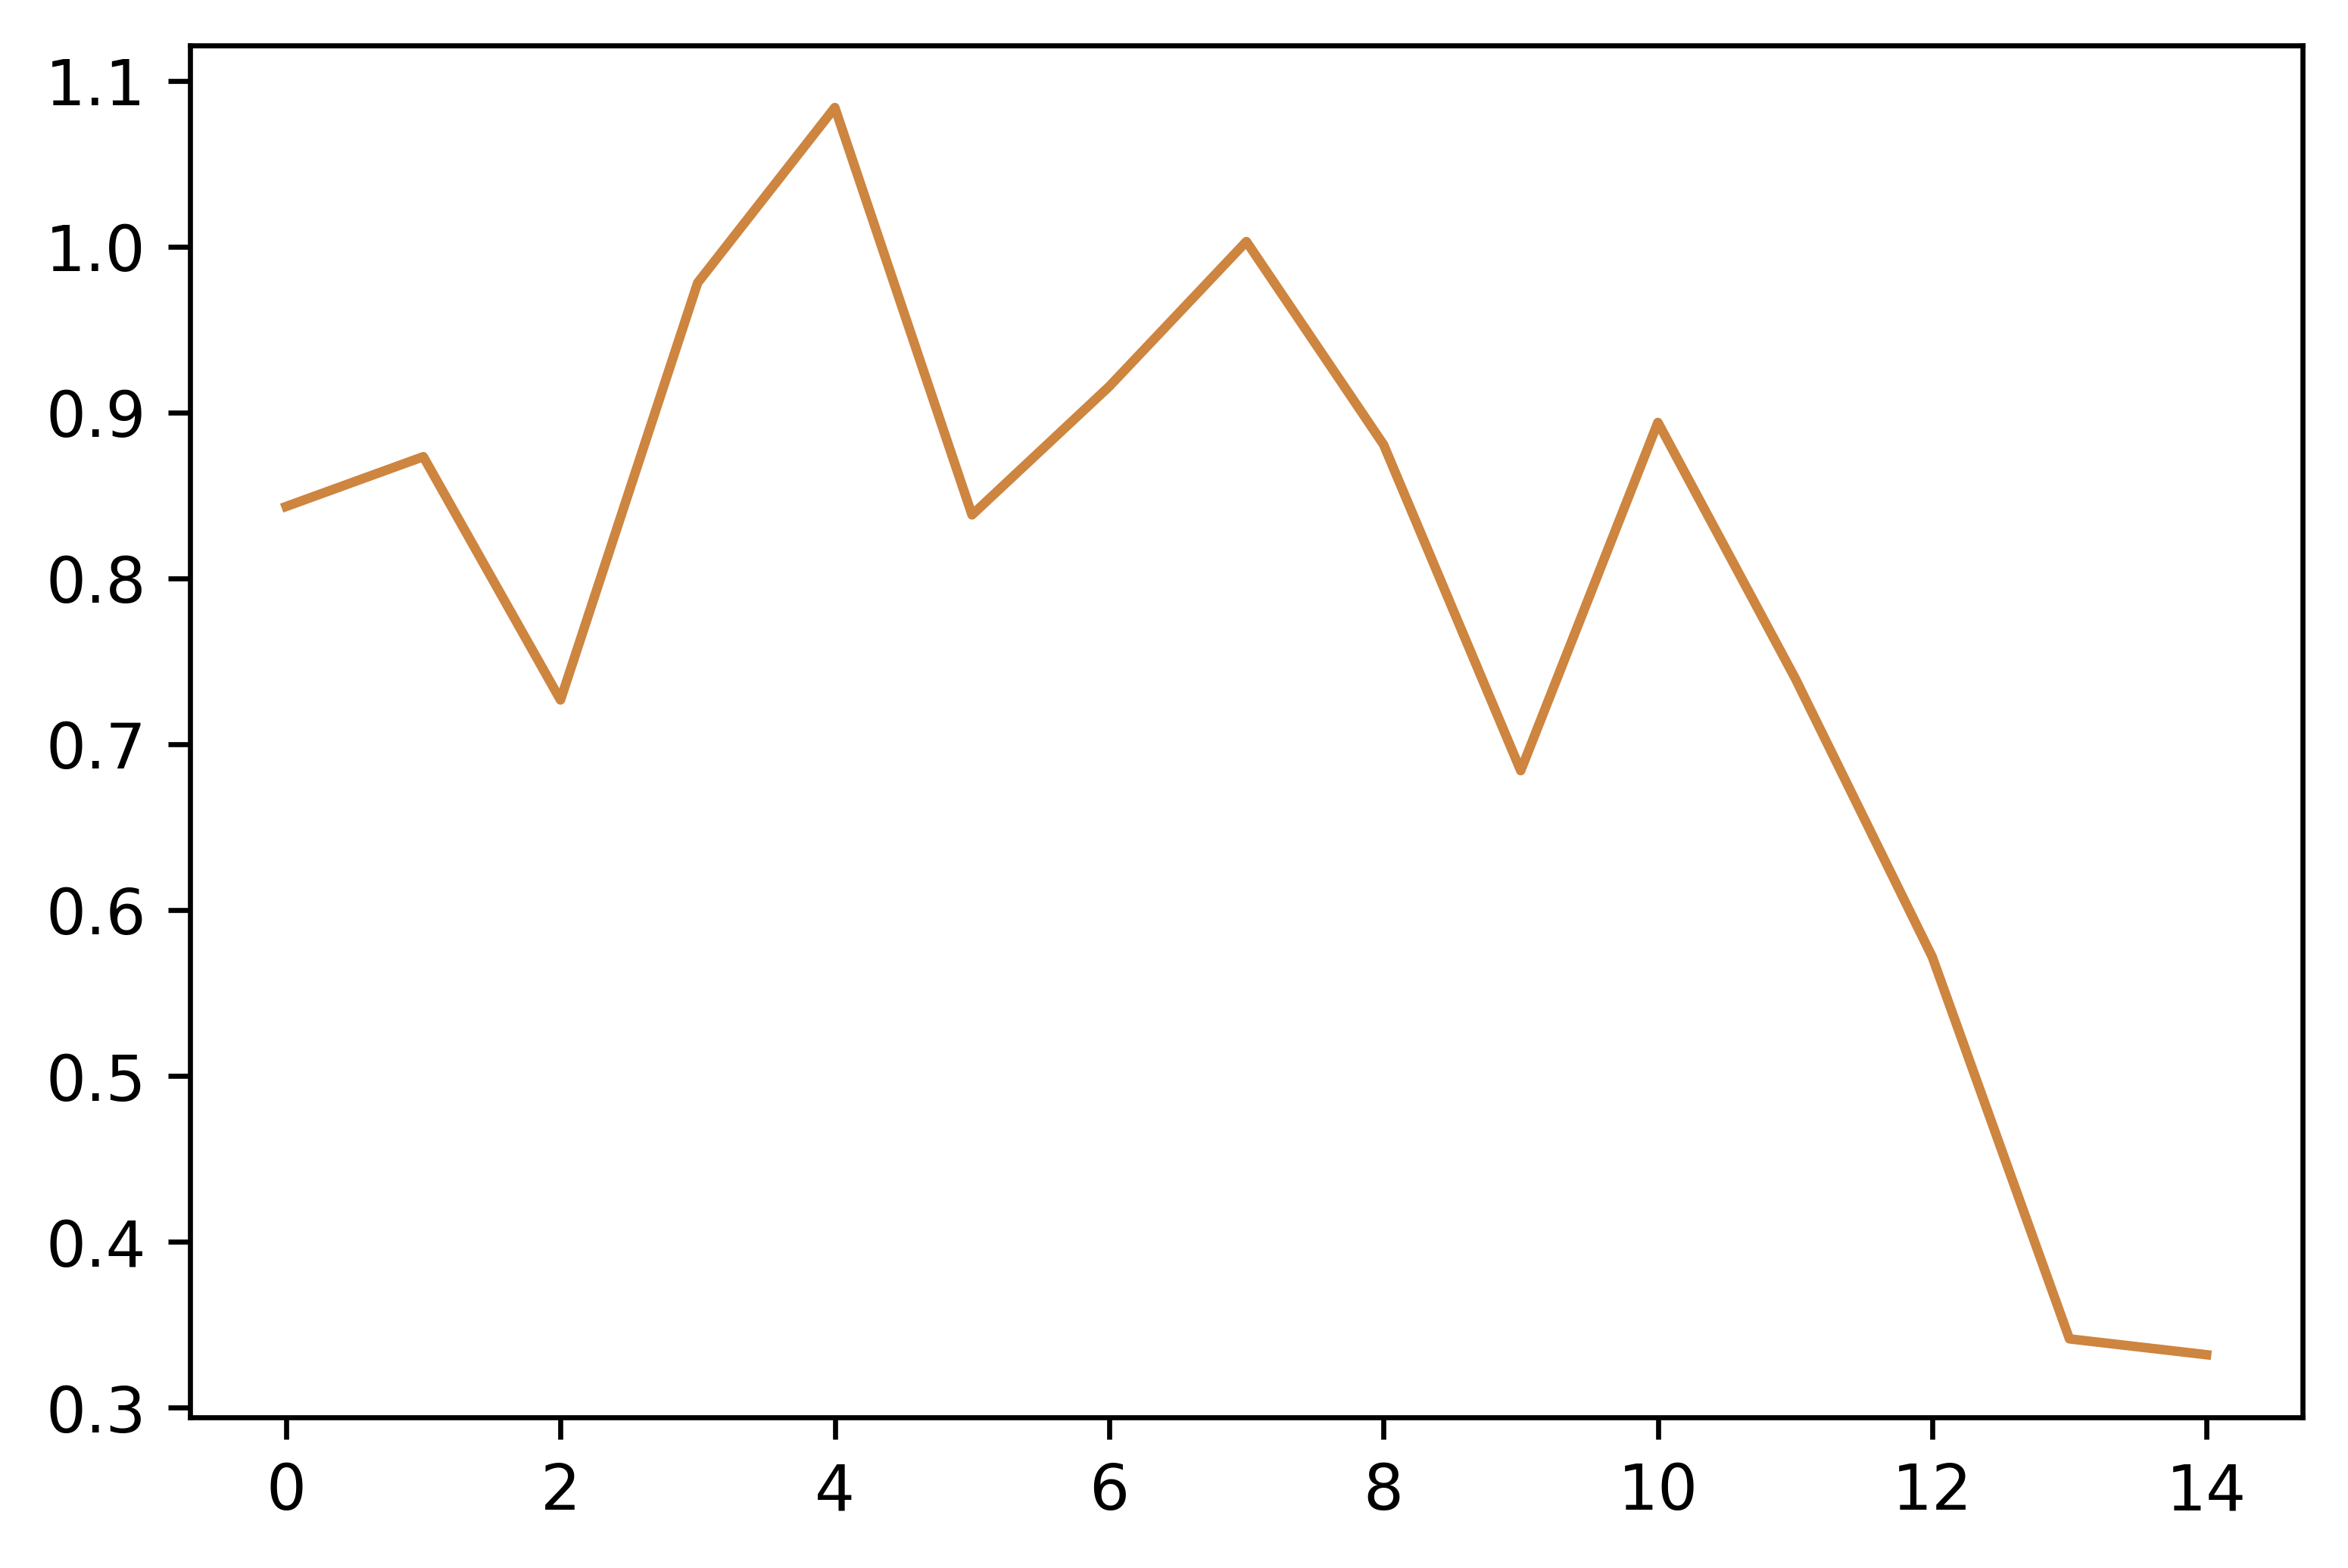

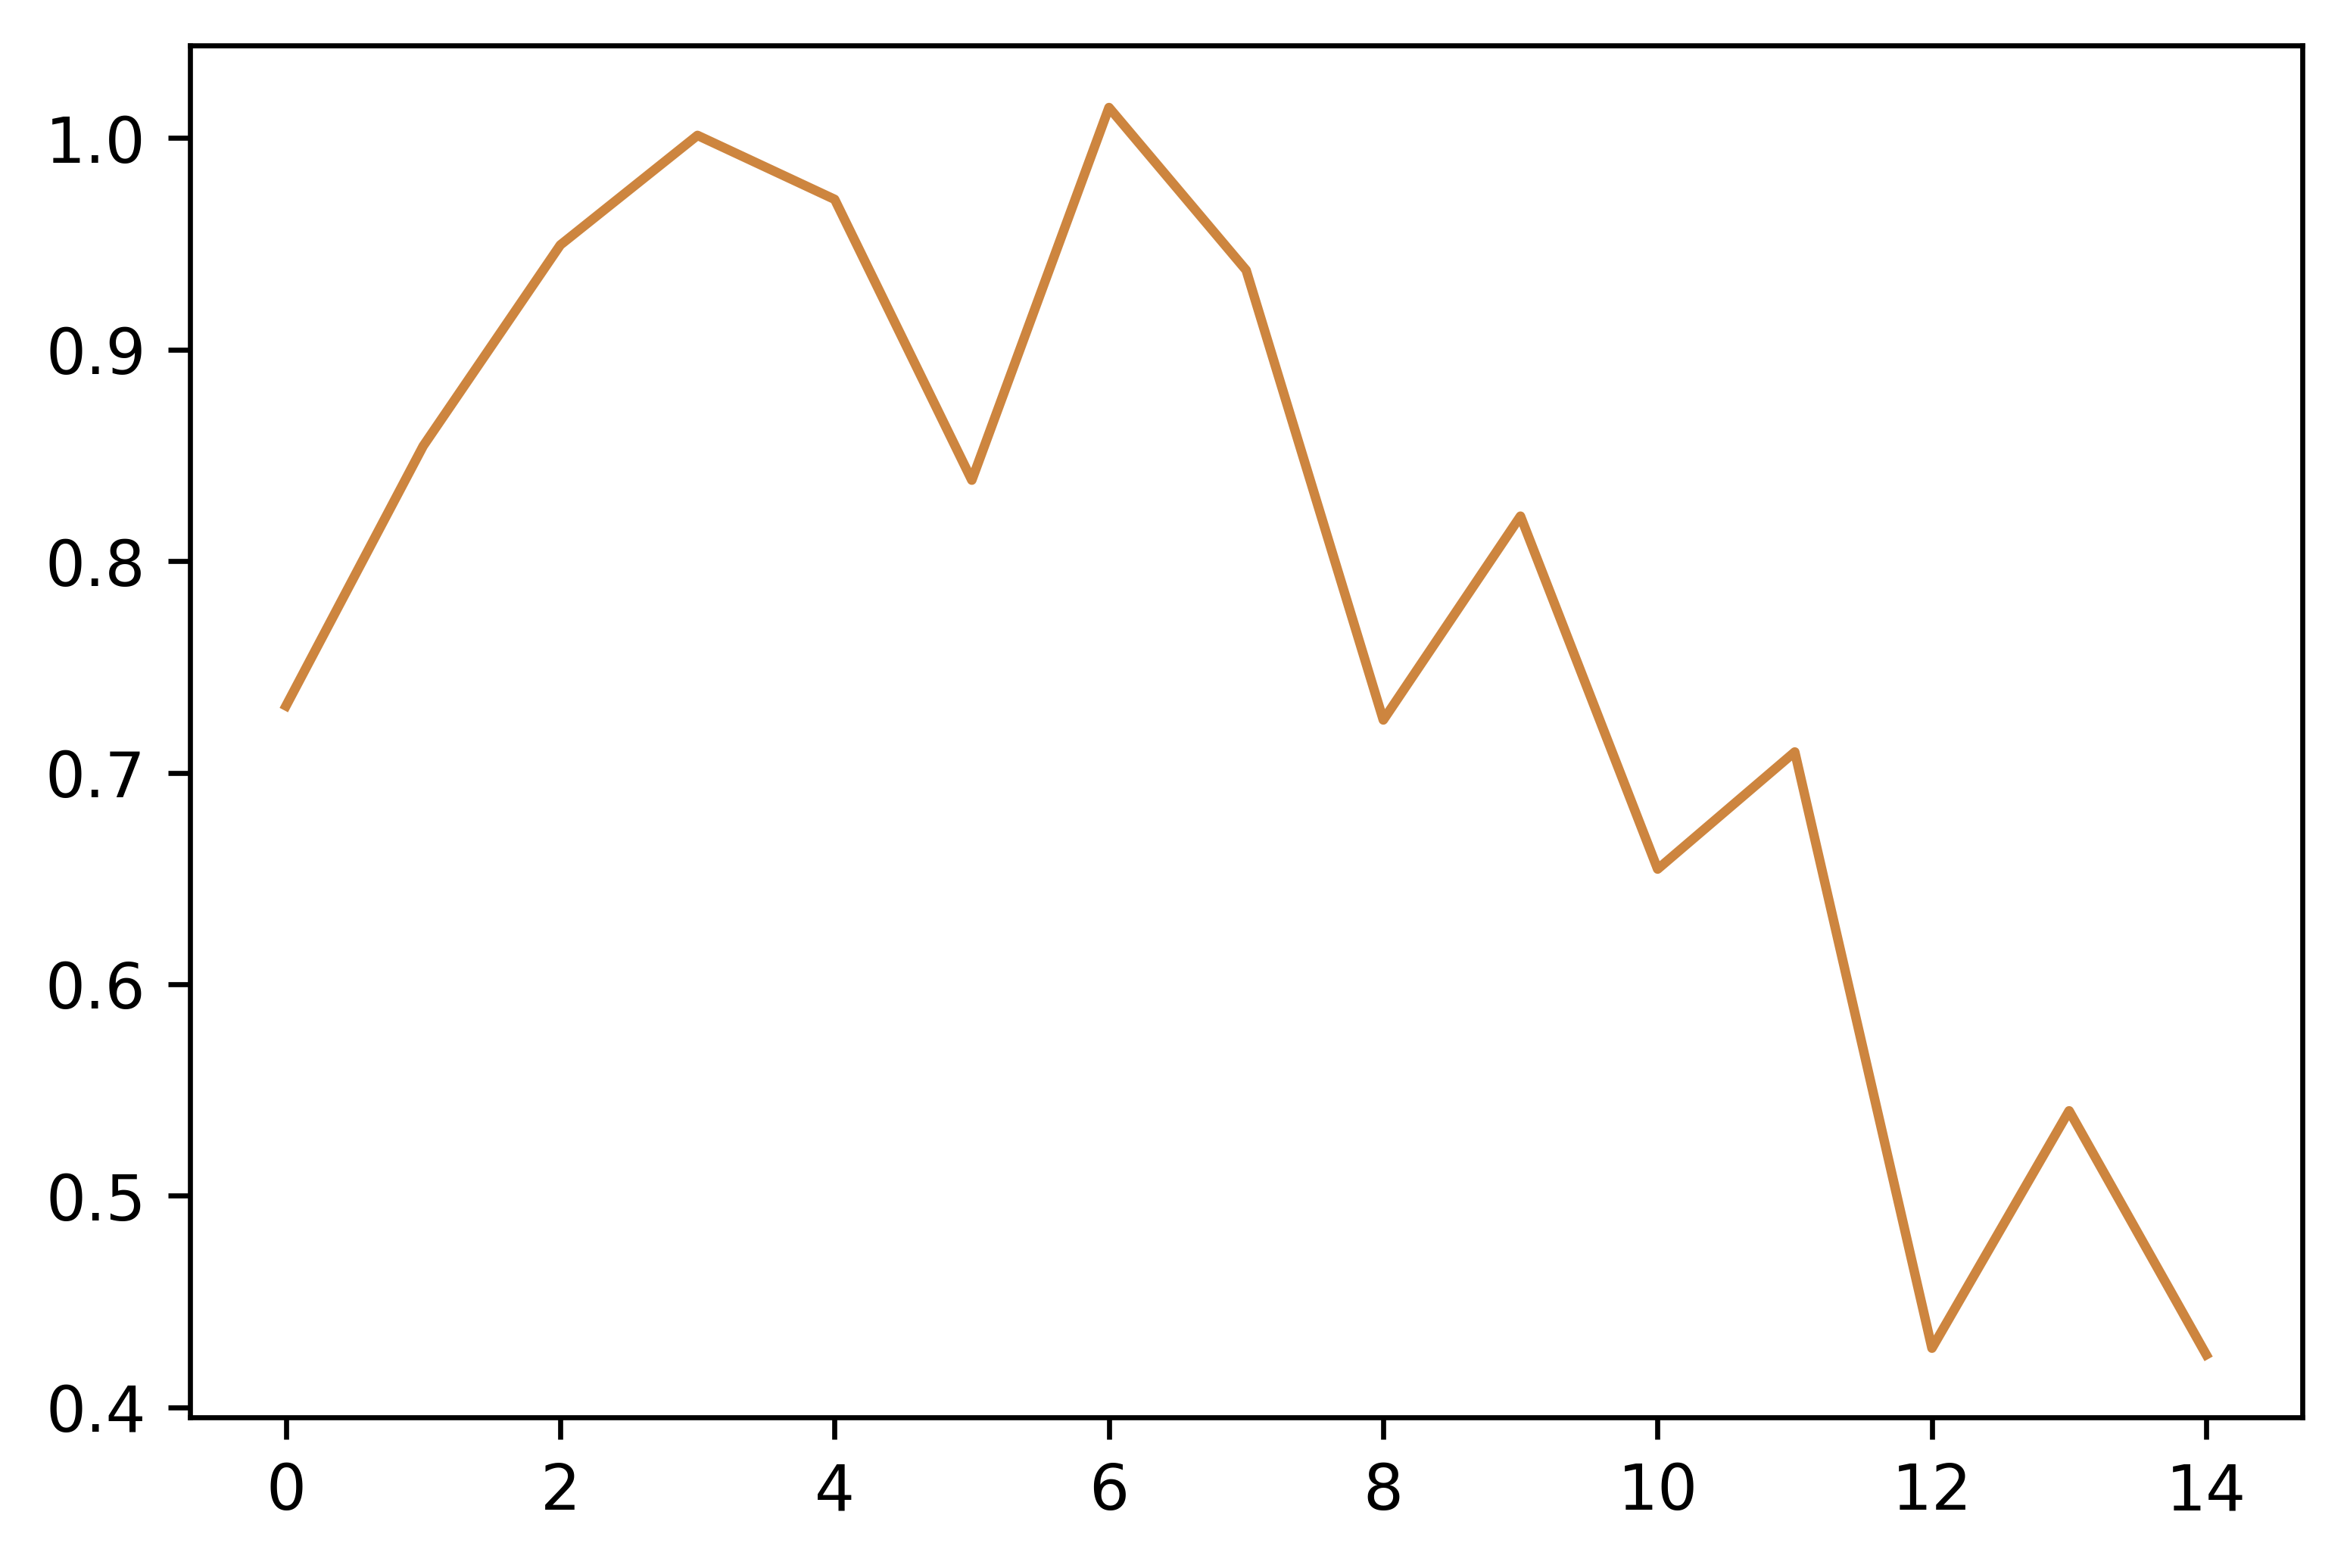

In [90]:
pattern_horizontal = image[30, 25:40].flatten()
pattern_vertical = image[25:40, 30].flatten()
x = [i for i in range(len(pattern_horizontal))]
plt.gcf().set_dpi(600)
plt.plot(x, pattern_horizontal, 'peru')
plt.show()

plt.gcf().set_dpi(600)
plt.plot(x, pattern_vertical, 'peru')
plt.show()

Unitary Energy Equation:
q0**2 + q1**2 + q10**2 + q11**2 + q12**2 + q13**2 + q2**2 + q3**2 + q4**2 + q5**2 + q6**2 + q7**2 + q8**2 + q9**2 - 1
Vanishing Moments Equations:
q1 + q10 + q11 + q12 + q13 + q2 + q3 + q4 + q5 + q6 + q7 + q8 + q9
q1 + 10*q10 + 11*q11 + 12*q12 + 13*q13 + 2*q2 + 3*q3 + 4*q4 + 5*q5 + 6*q6 + 7*q7 + 8*q8 + 9*q9
q1 + 100*q10 + 121*q11 + 144*q12 + 169*q13 + 4*q2 + 9*q3 + 16*q4 + 25*q5 + 36*q6 + 49*q7 + 64*q8 + 81*q9
q1 + 1000*q10 + 1331*q11 + 1728*q12 + 2197*q13 + 8*q2 + 27*q3 + 64*q4 + 125*q5 + 216*q6 + 343*q7 + 512*q8 + 729*q9
q1 + 10000*q10 + 14641*q11 + 20736*q12 + 28561*q13 + 16*q2 + 81*q3 + 256*q4 + 625*q5 + 1296*q6 + 2401*q7 + 4096*q8 + 6561*q9
Orthogonality Equations:
q0*q2 + q1*q3 + q10*q12 + q10*q8 + q11*q13 + q11*q9 + q2*q4 + q3*q5 + q4*q6 + q5*q7 + q6*q8 + q7*q9
q0*q4 + q1*q5 + q10*q6 + q11*q7 + q12*q8 + q13*q9 + q2*q6 + q3*q7 + q4*q8 + q5*q9
q0*q6 + q1*q7 + q10*q4 + q11*q5 + q12*q6 + q13*q7 + q2*q8 + q3*q9
q0*q8 + q1*q9 + q10*q2 + q11*q3 + q12*q4 + q13*q

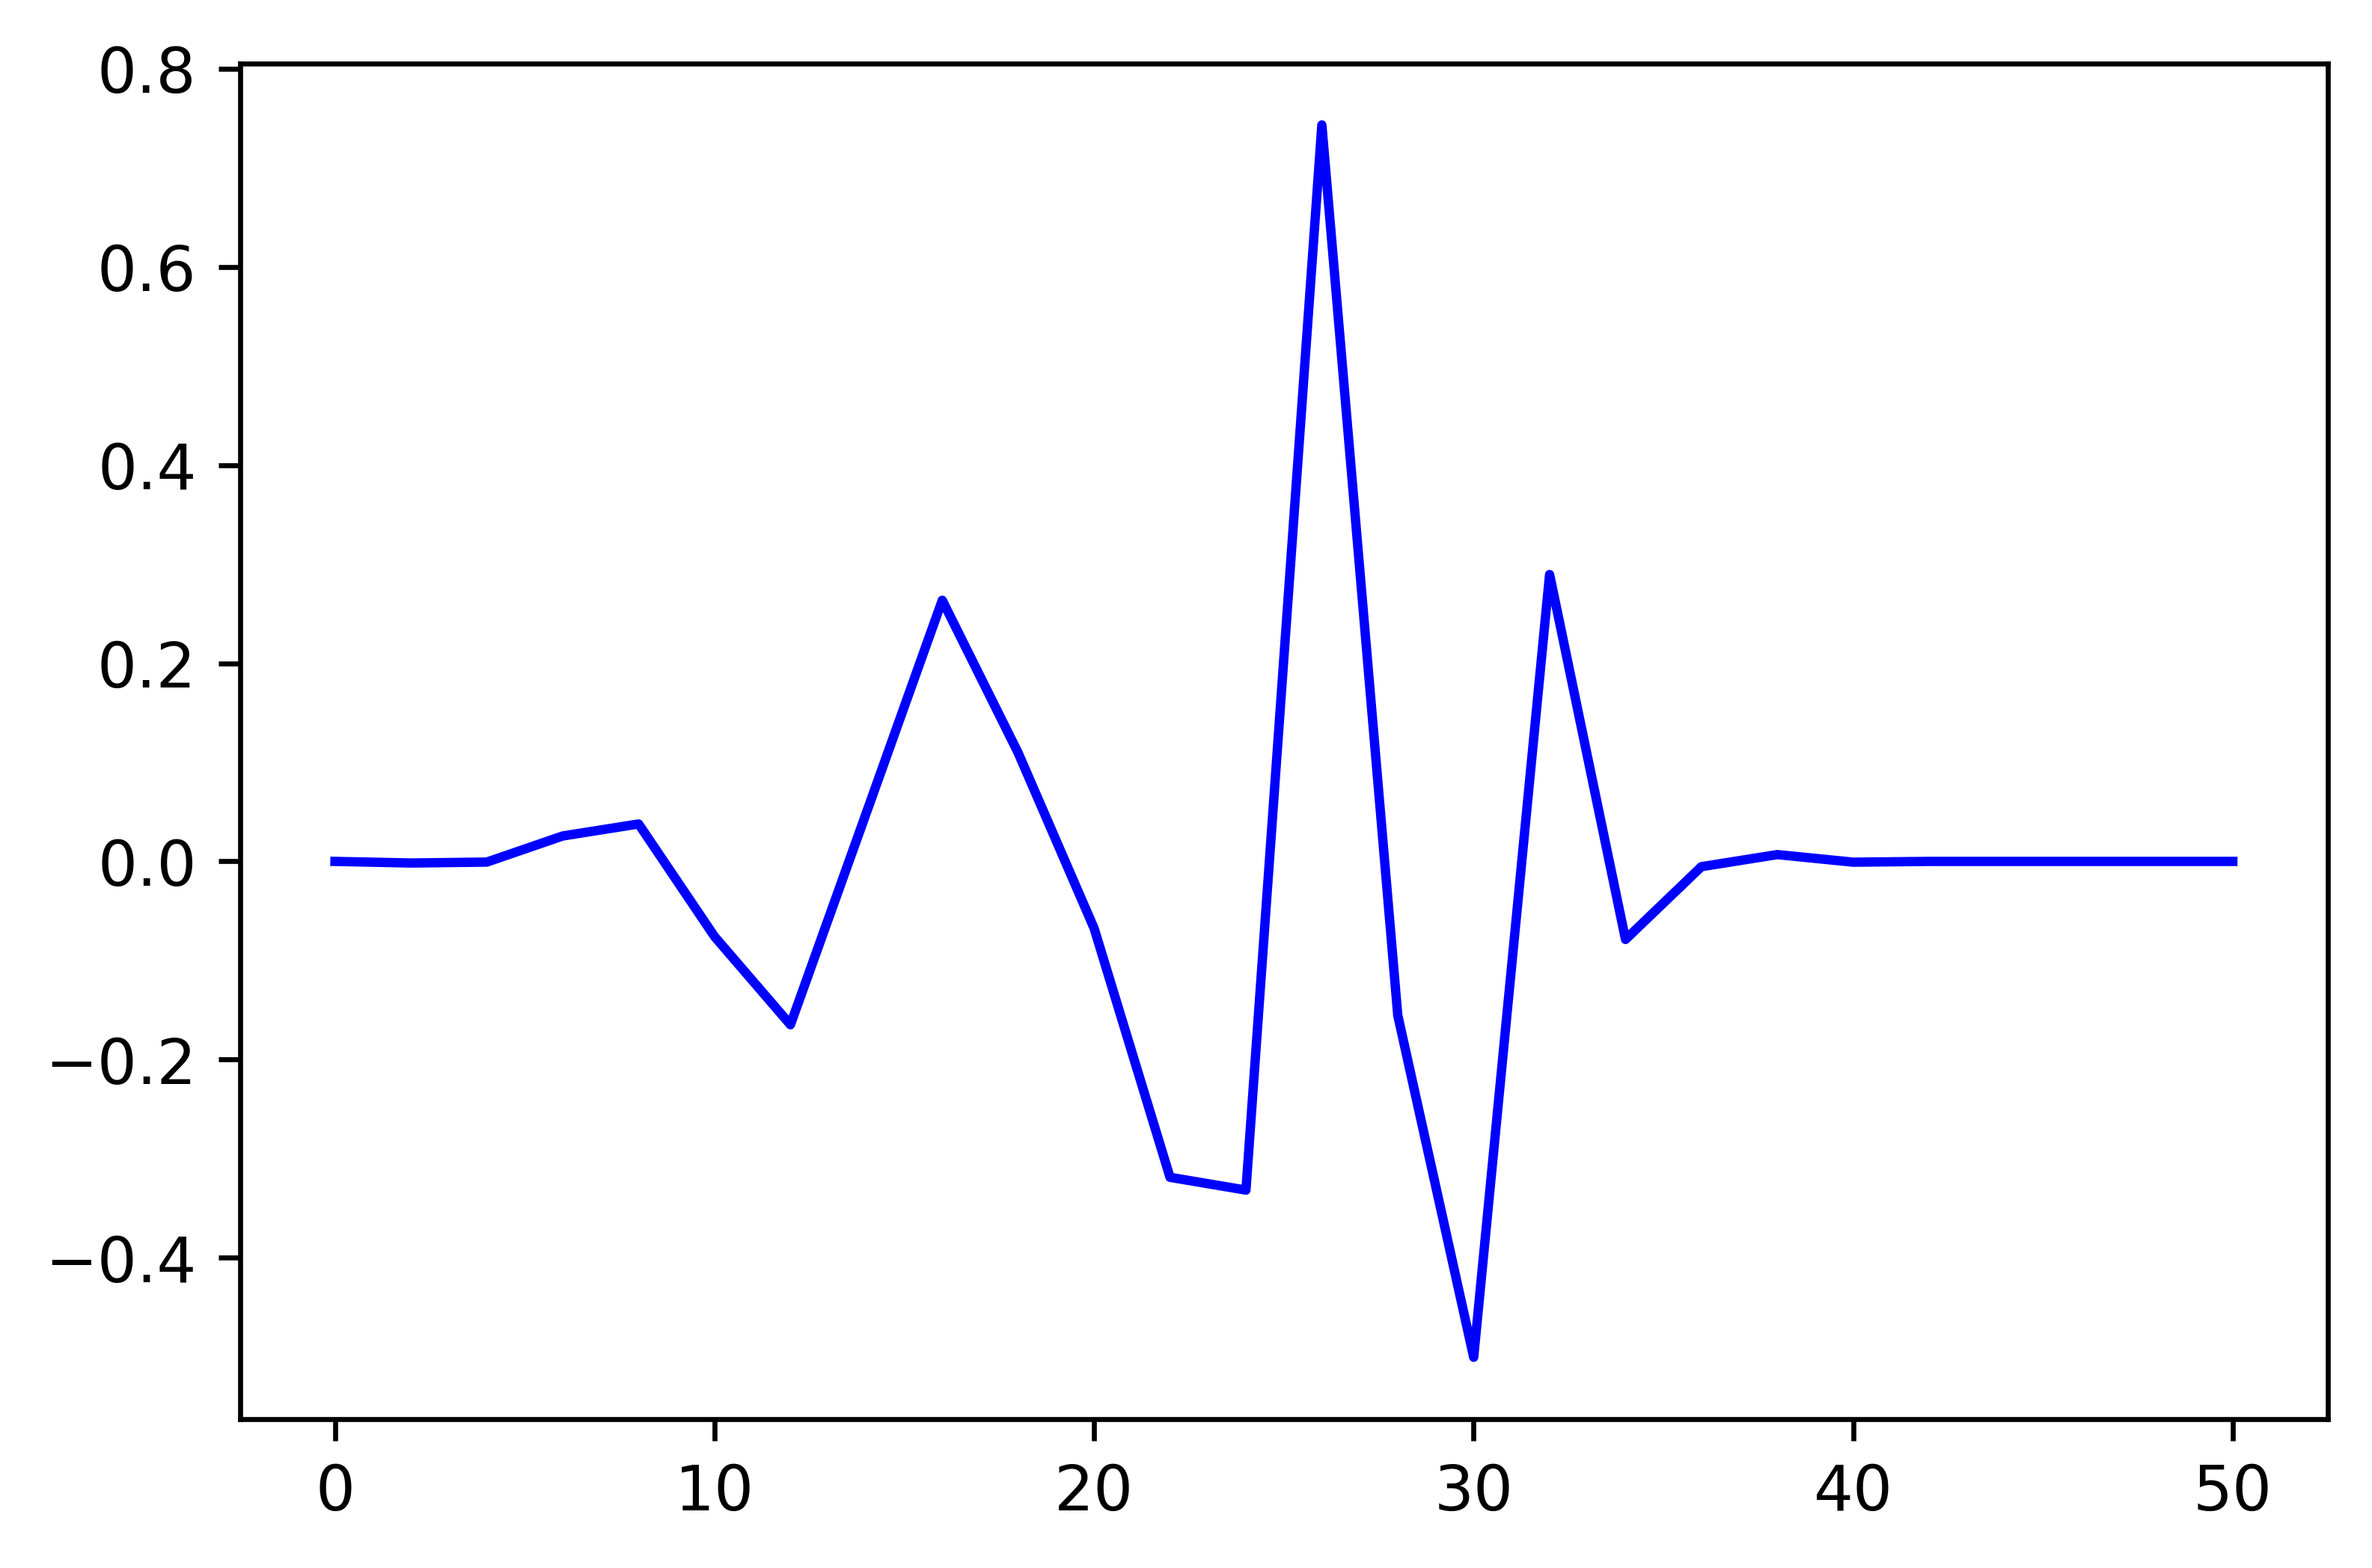

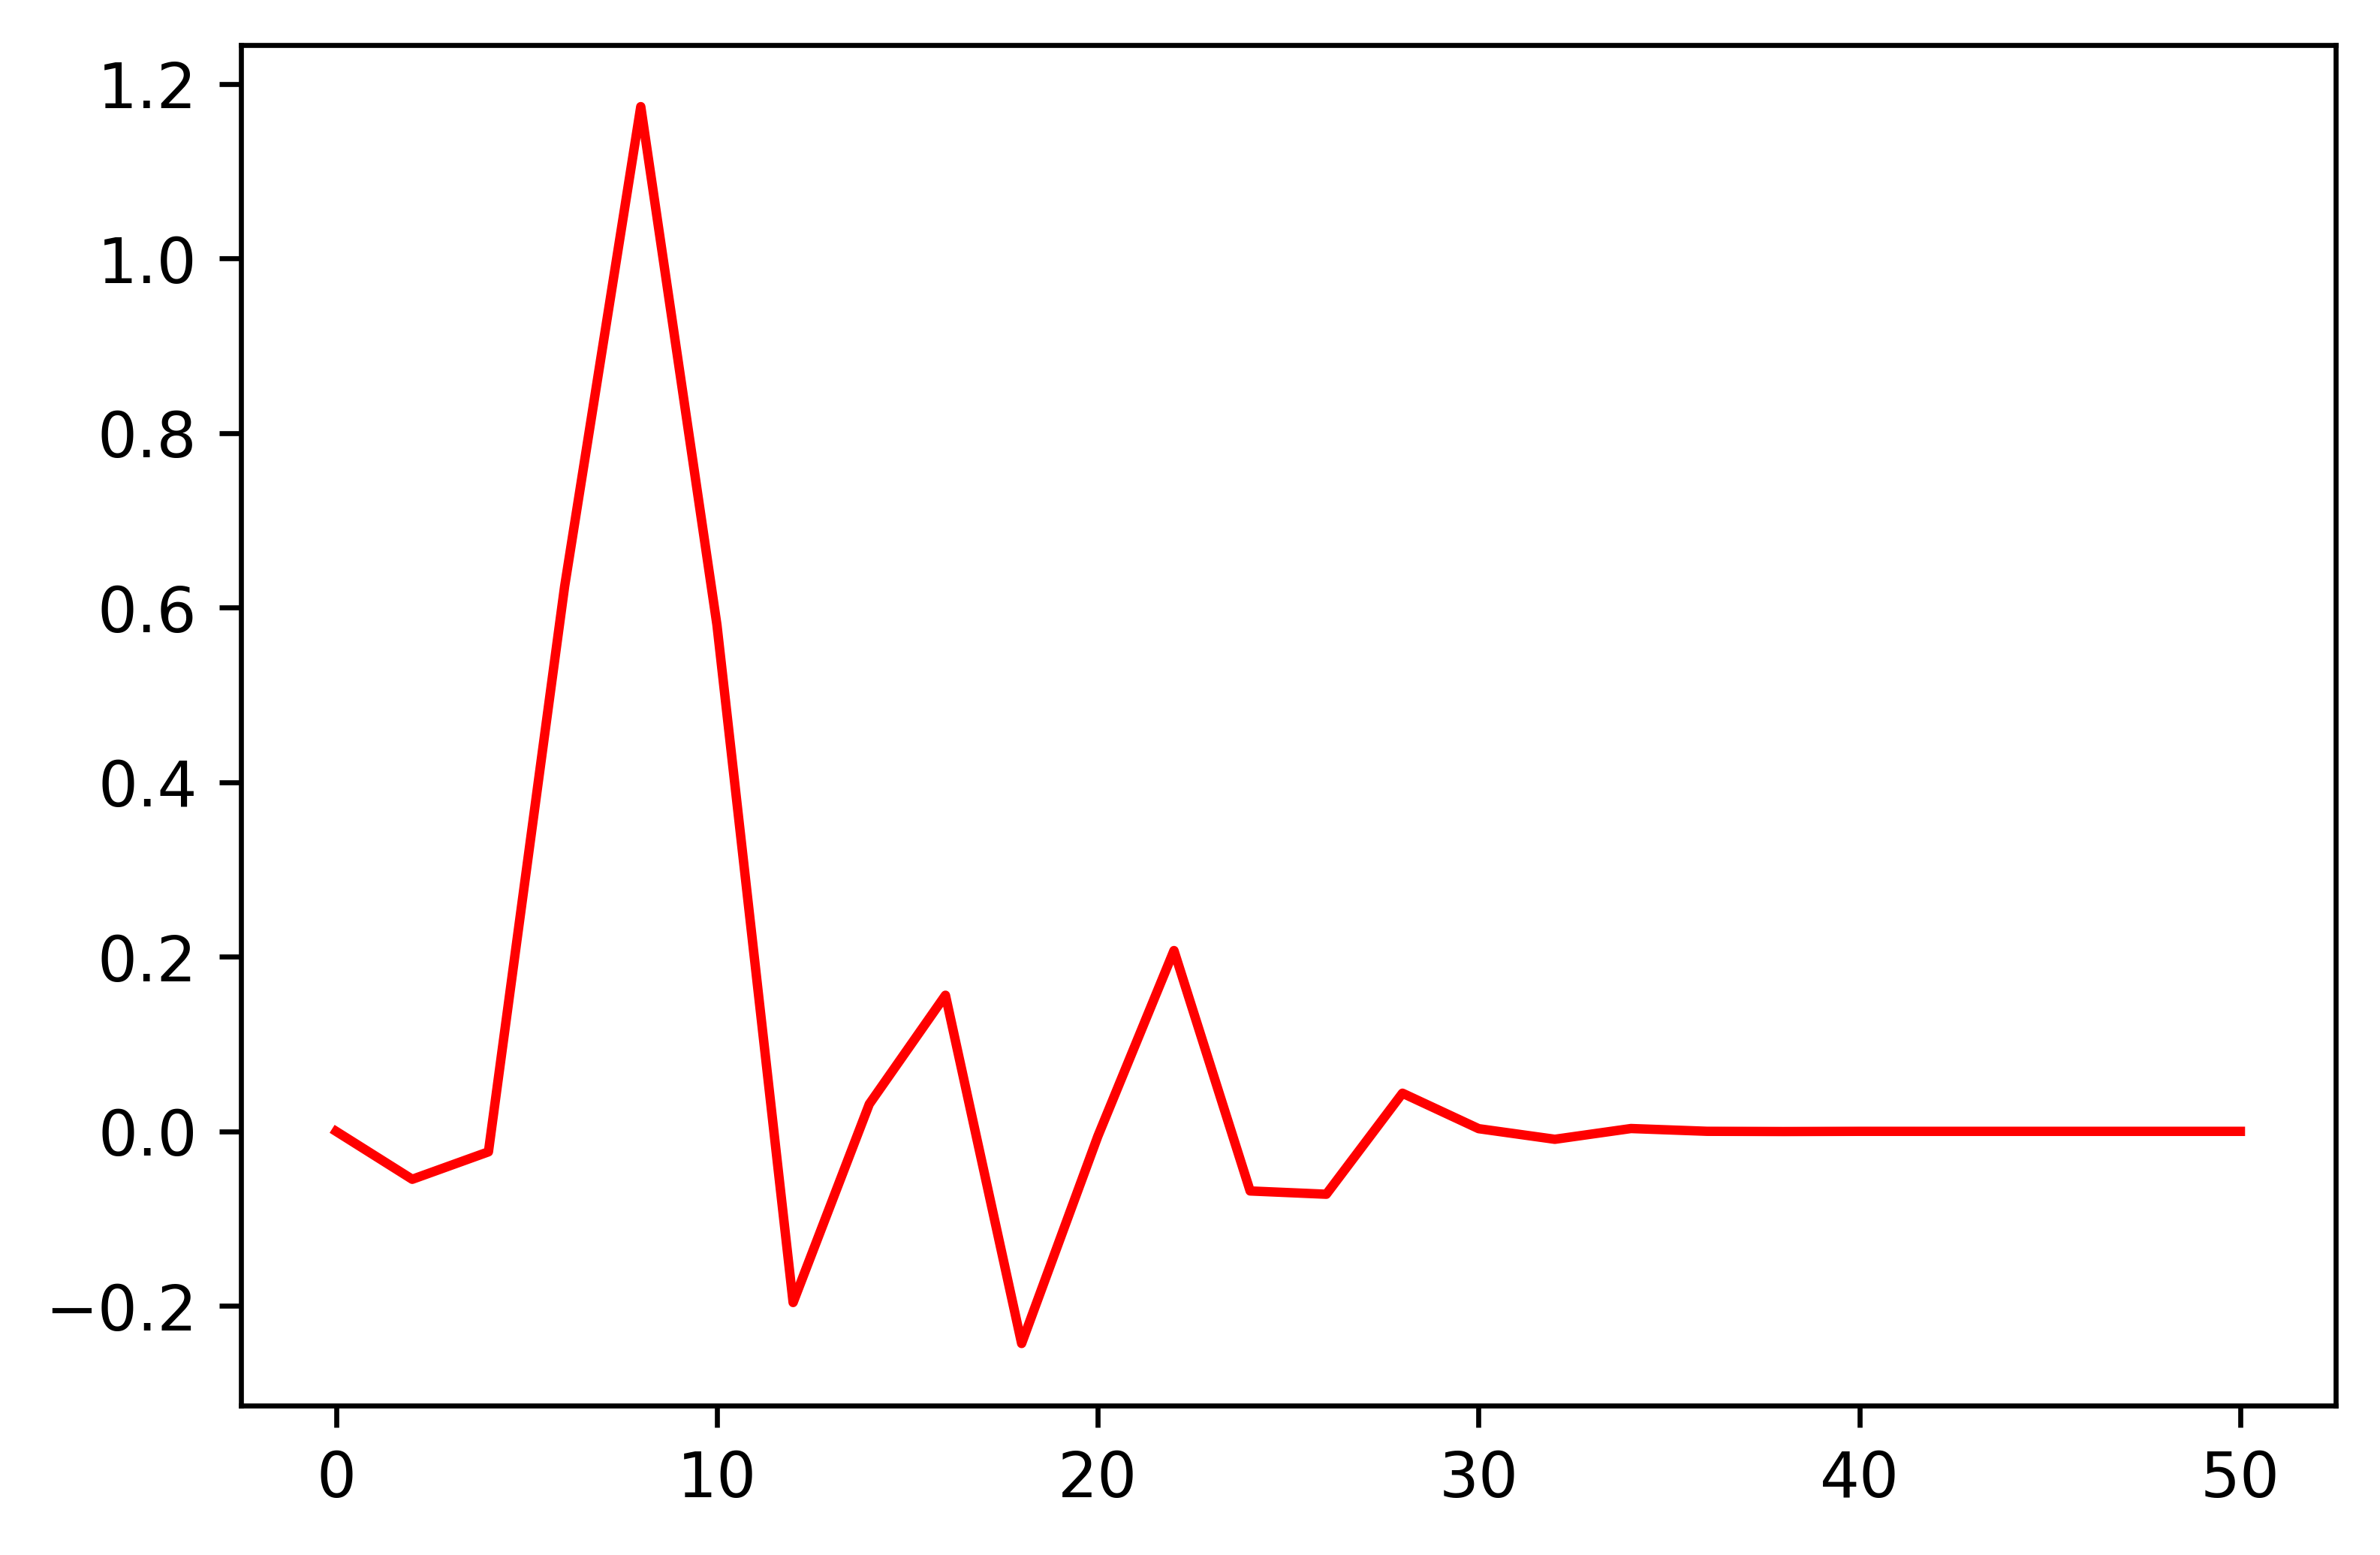

Unitary Energy Equation:
q0**2 + q1**2 + q10**2 + q11**2 + q12**2 + q13**2 + q2**2 + q3**2 + q4**2 + q5**2 + q6**2 + q7**2 + q8**2 + q9**2 - 1
Vanishing Moments Equations:
q1 + q10 + q11 + q12 + q13 + q2 + q3 + q4 + q5 + q6 + q7 + q8 + q9
q1 + 10*q10 + 11*q11 + 12*q12 + 13*q13 + 2*q2 + 3*q3 + 4*q4 + 5*q5 + 6*q6 + 7*q7 + 8*q8 + 9*q9
q1 + 100*q10 + 121*q11 + 144*q12 + 169*q13 + 4*q2 + 9*q3 + 16*q4 + 25*q5 + 36*q6 + 49*q7 + 64*q8 + 81*q9
q1 + 1000*q10 + 1331*q11 + 1728*q12 + 2197*q13 + 8*q2 + 27*q3 + 64*q4 + 125*q5 + 216*q6 + 343*q7 + 512*q8 + 729*q9
q1 + 10000*q10 + 14641*q11 + 20736*q12 + 28561*q13 + 16*q2 + 81*q3 + 256*q4 + 625*q5 + 1296*q6 + 2401*q7 + 4096*q8 + 6561*q9
Orthogonality Equations:
q0*q2 + q1*q3 + q10*q12 + q10*q8 + q11*q13 + q11*q9 + q2*q4 + q3*q5 + q4*q6 + q5*q7 + q6*q8 + q7*q9
q0*q4 + q1*q5 + q10*q6 + q11*q7 + q12*q8 + q13*q9 + q2*q6 + q3*q7 + q4*q8 + q5*q9
q0*q6 + q1*q7 + q10*q4 + q11*q5 + q12*q6 + q13*q7 + q2*q8 + q3*q9
q0*q8 + q1*q9 + q10*q2 + q11*q3 + q12*q4 + q13*q

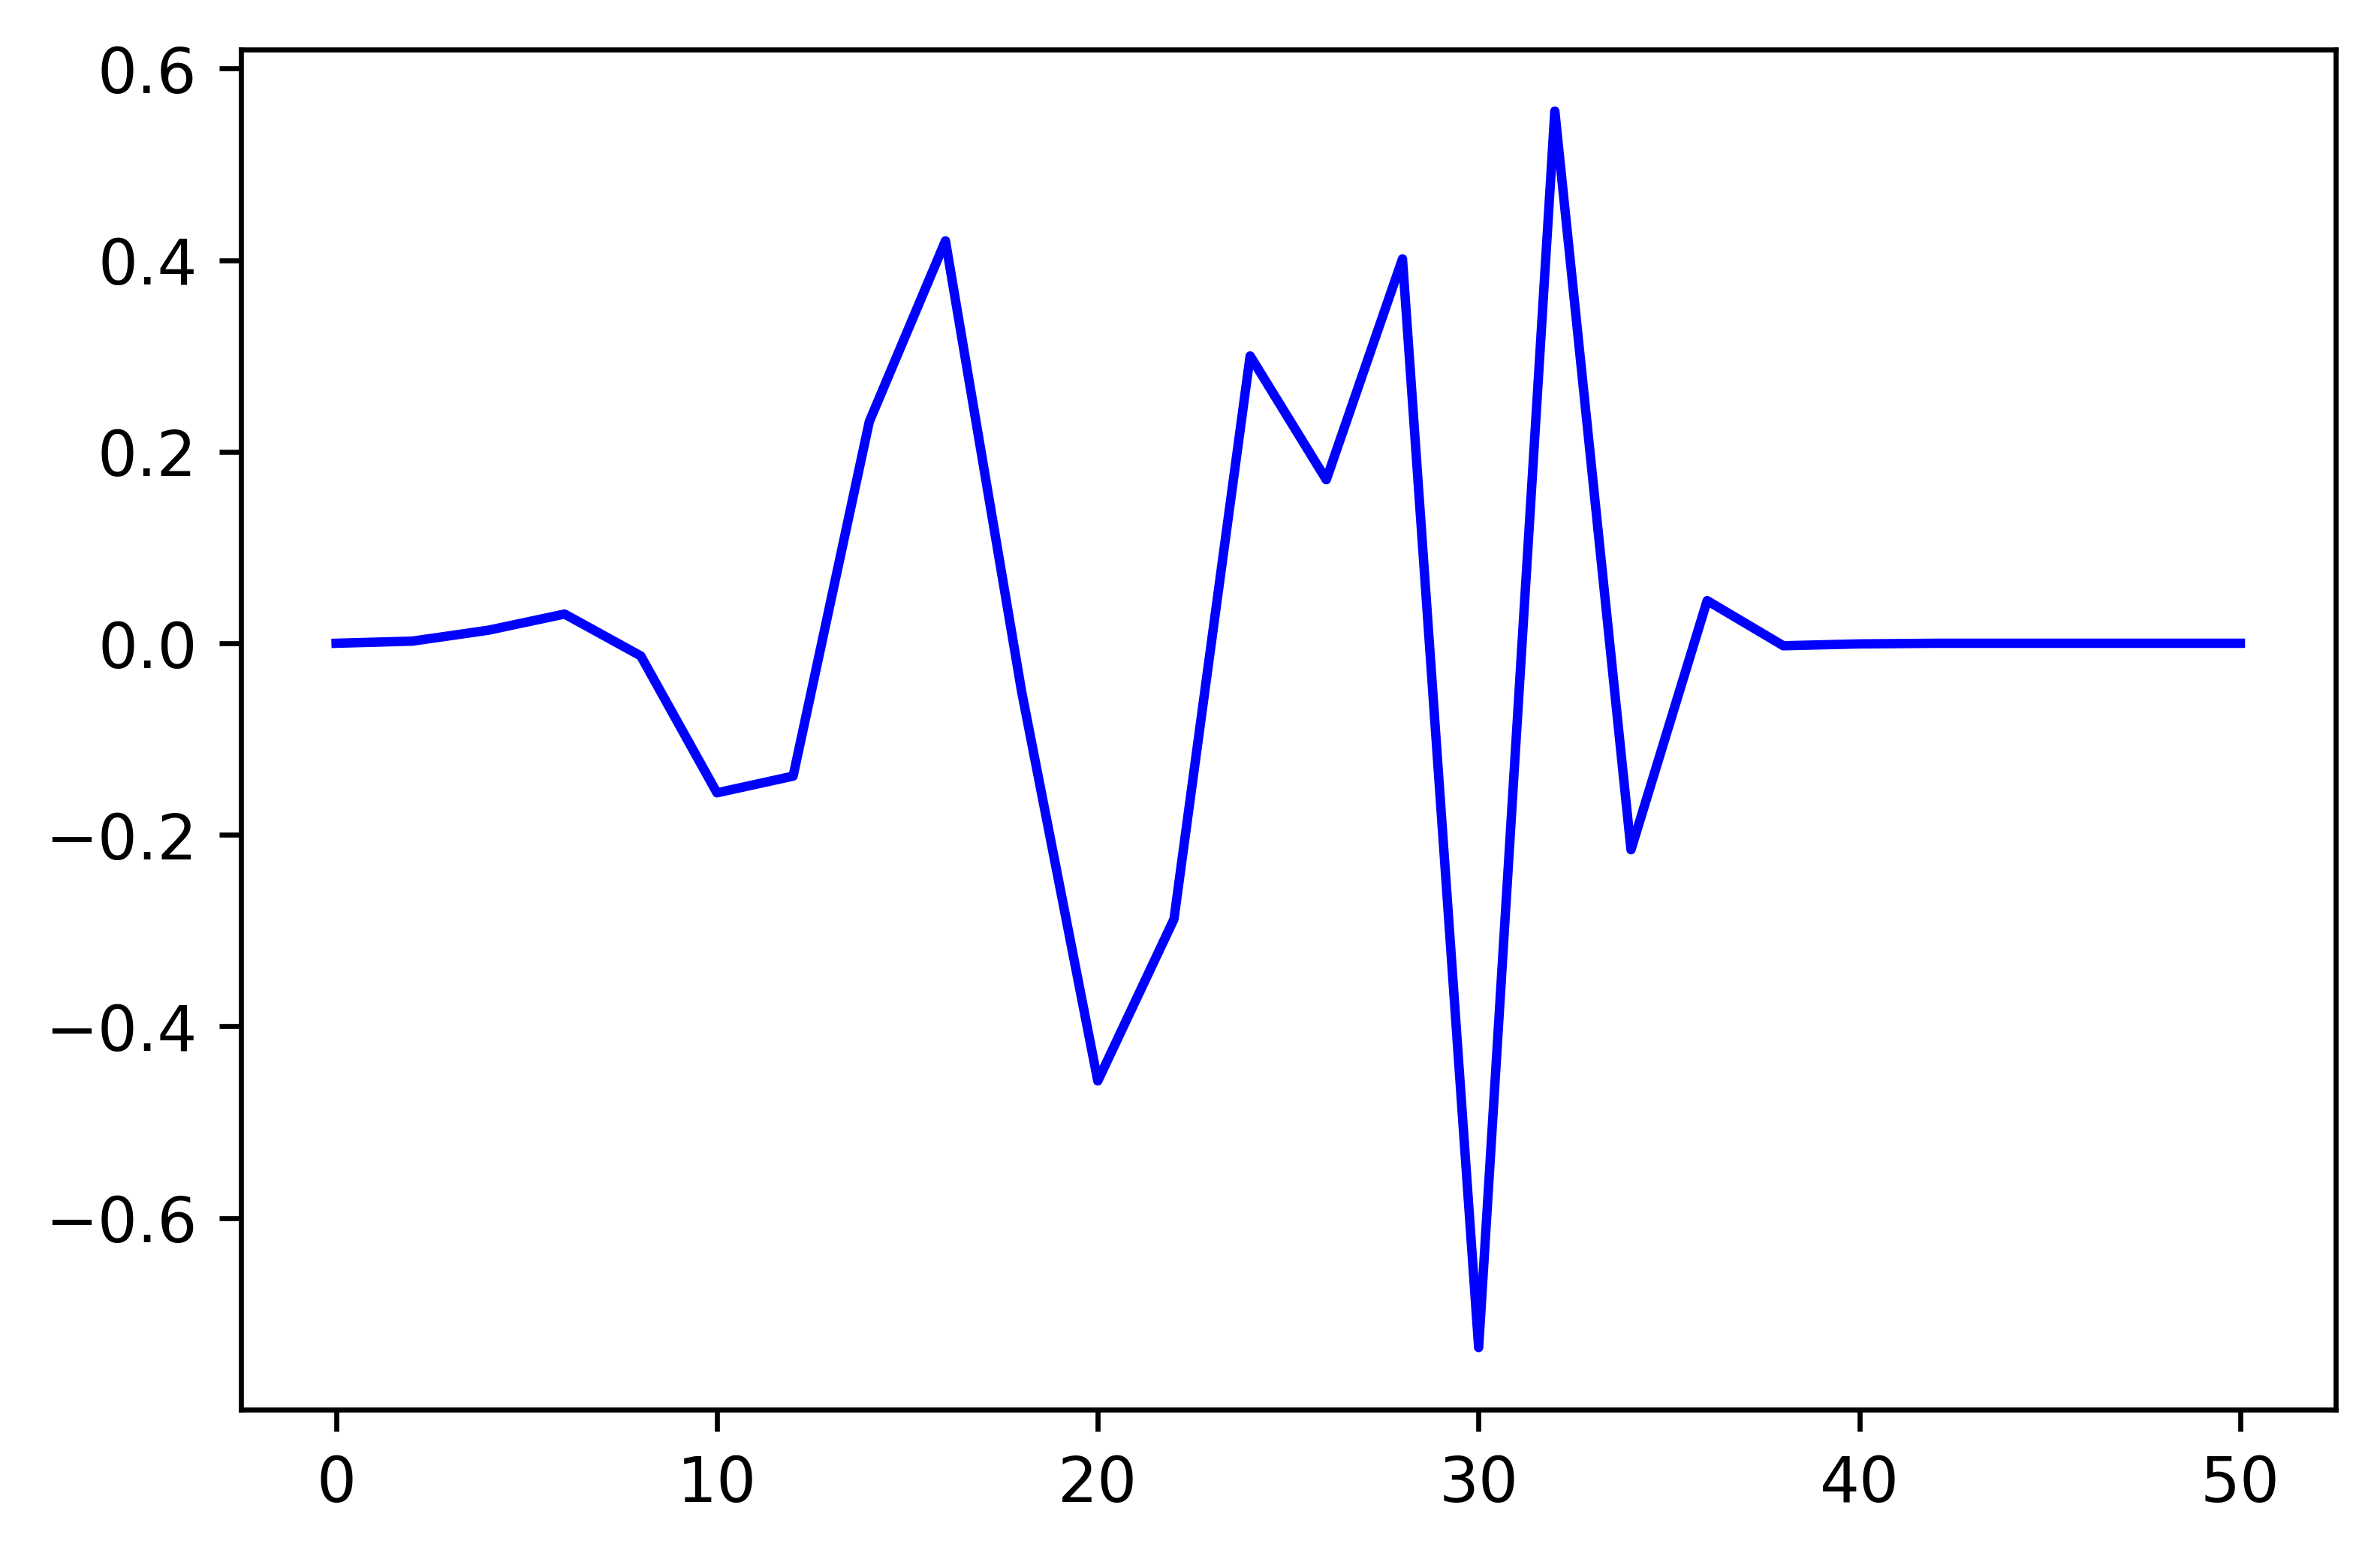

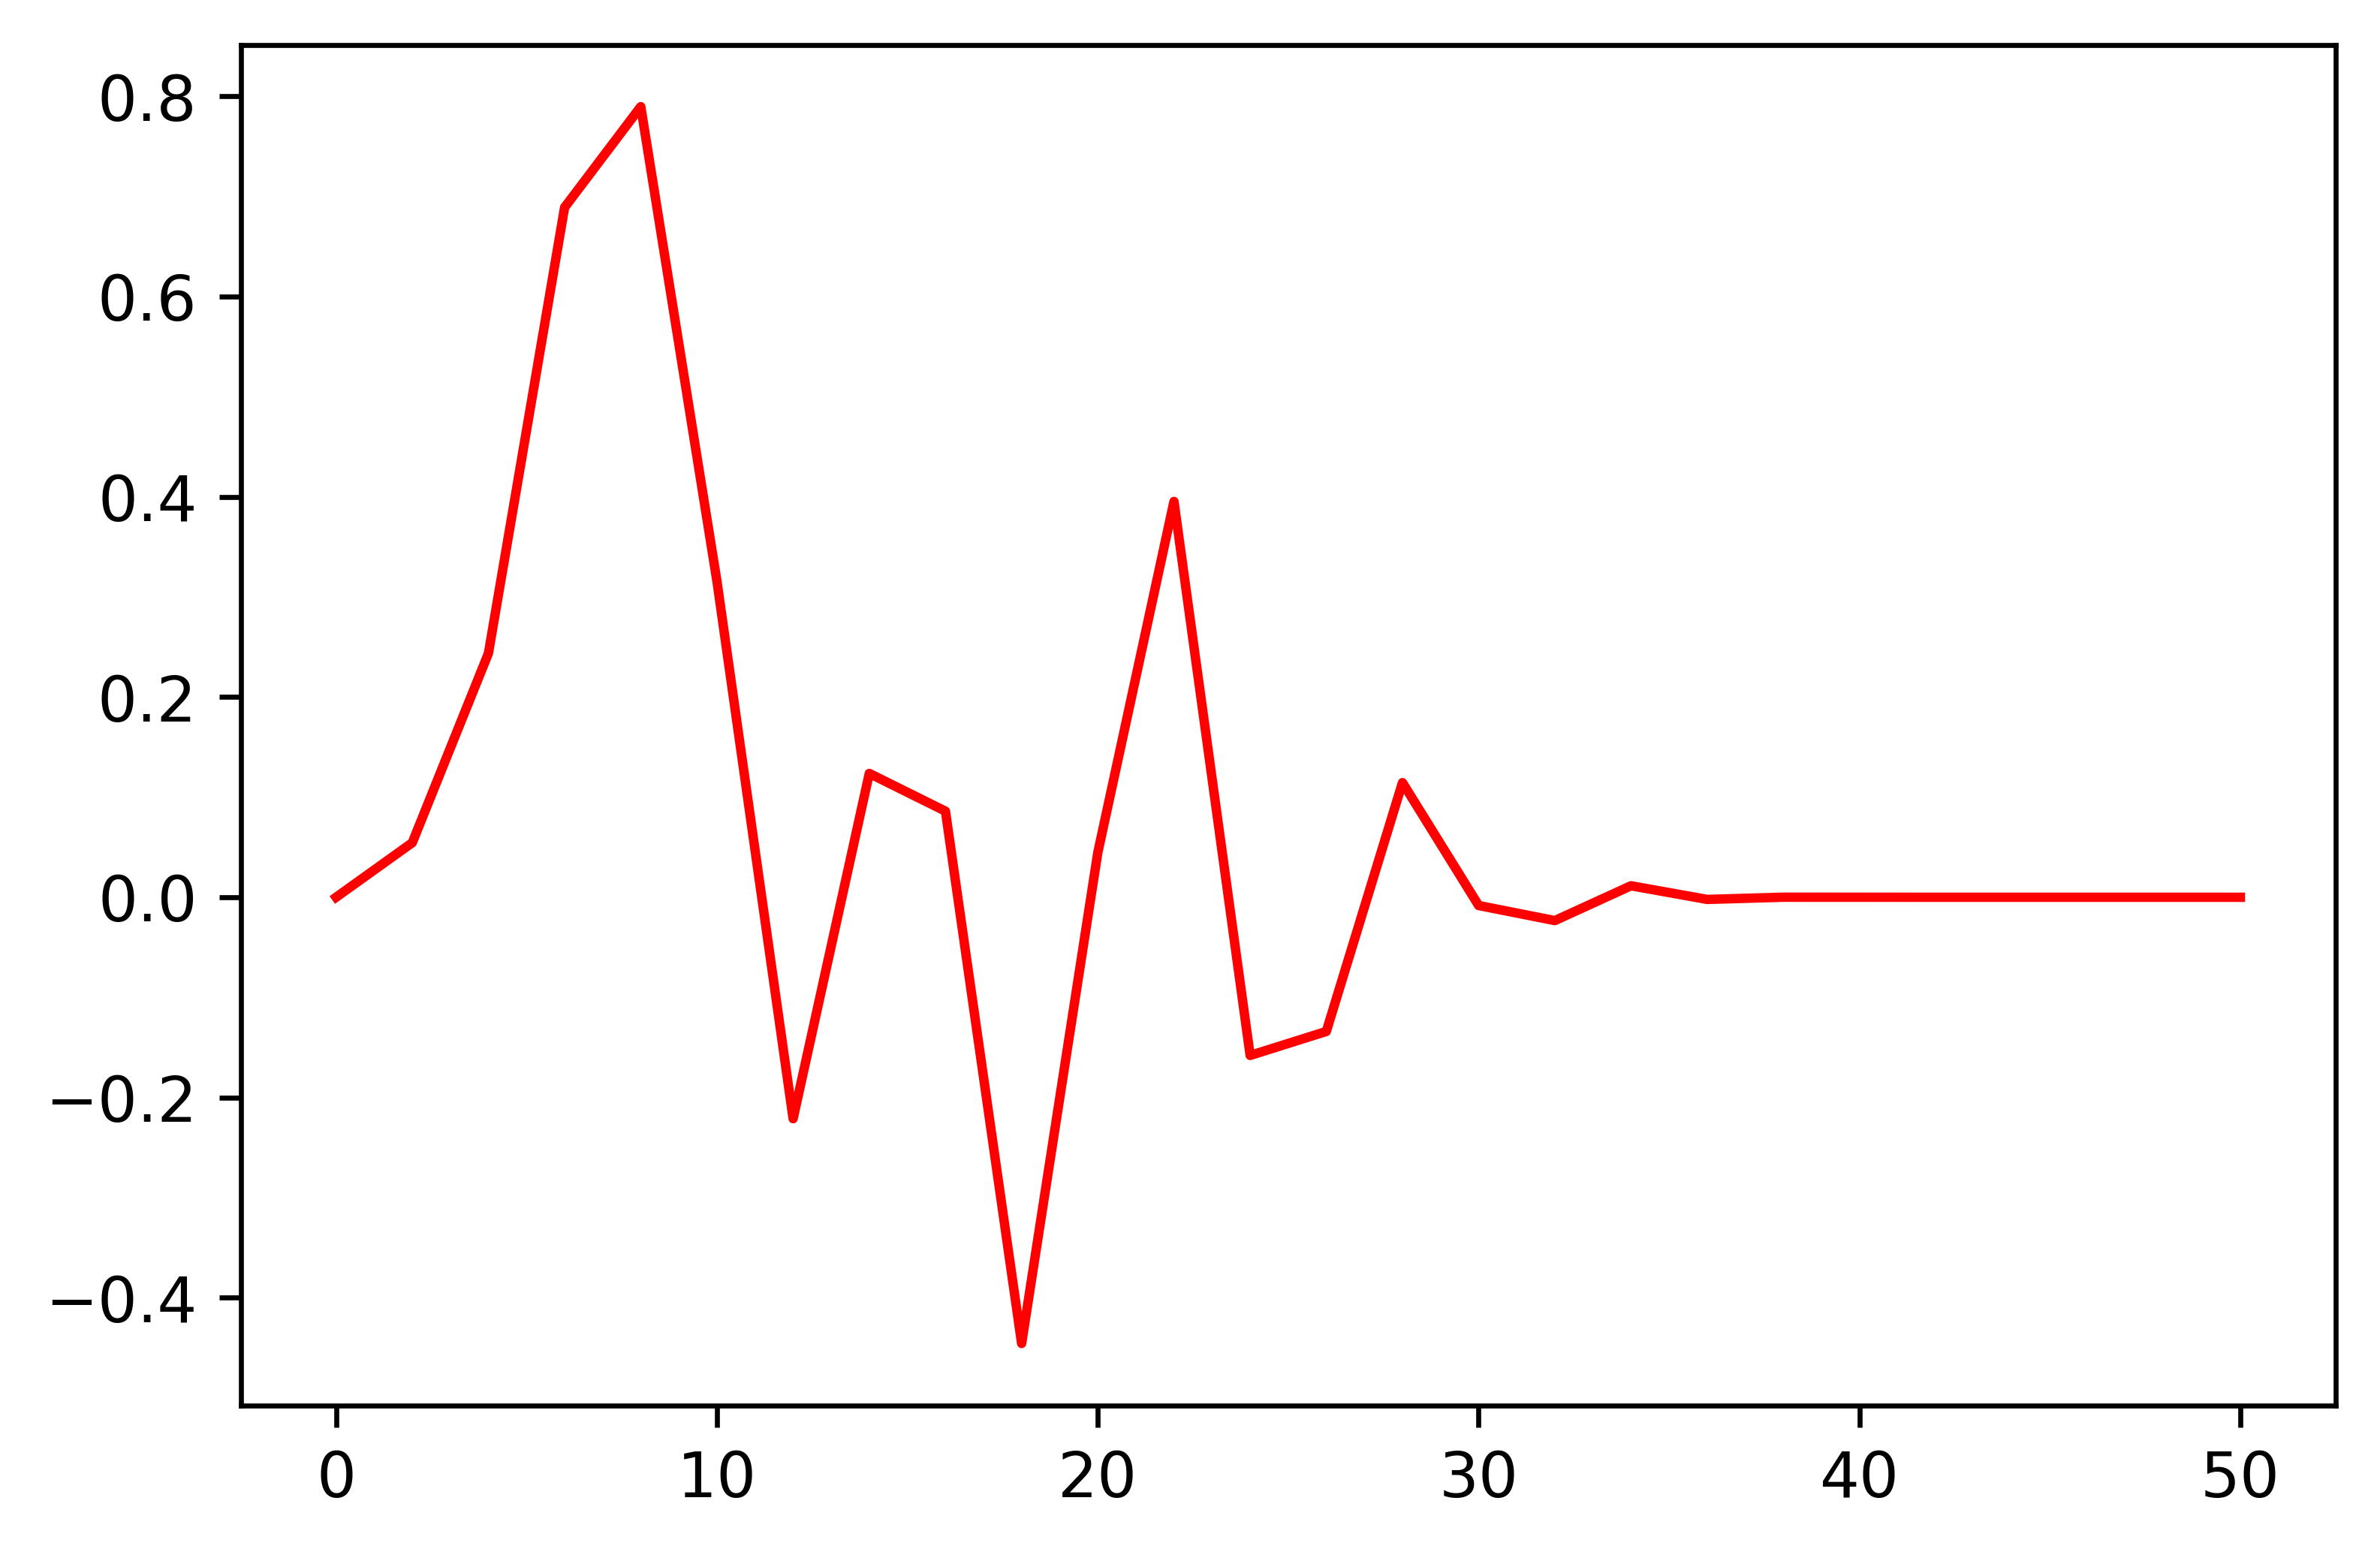

In [59]:
shapelet_horizontal = build_shapelet(pattern_horizontal, verbose=True)
shapelet_vertical = build_shapelet(pattern_vertical, verbose=True)

Detection at position (1, 0) with value 0.6013388062849969
Detection at position (1, 10) with value 0.6015855484052939
Detection at position (3, 14) with value 0.6405858911204914
Detection at position (3, 17) with value 0.6051007217966532
Detection at position (5, 18) with value 0.6499490484736453
Detection at position (8, 16) with value 0.6157571995886548


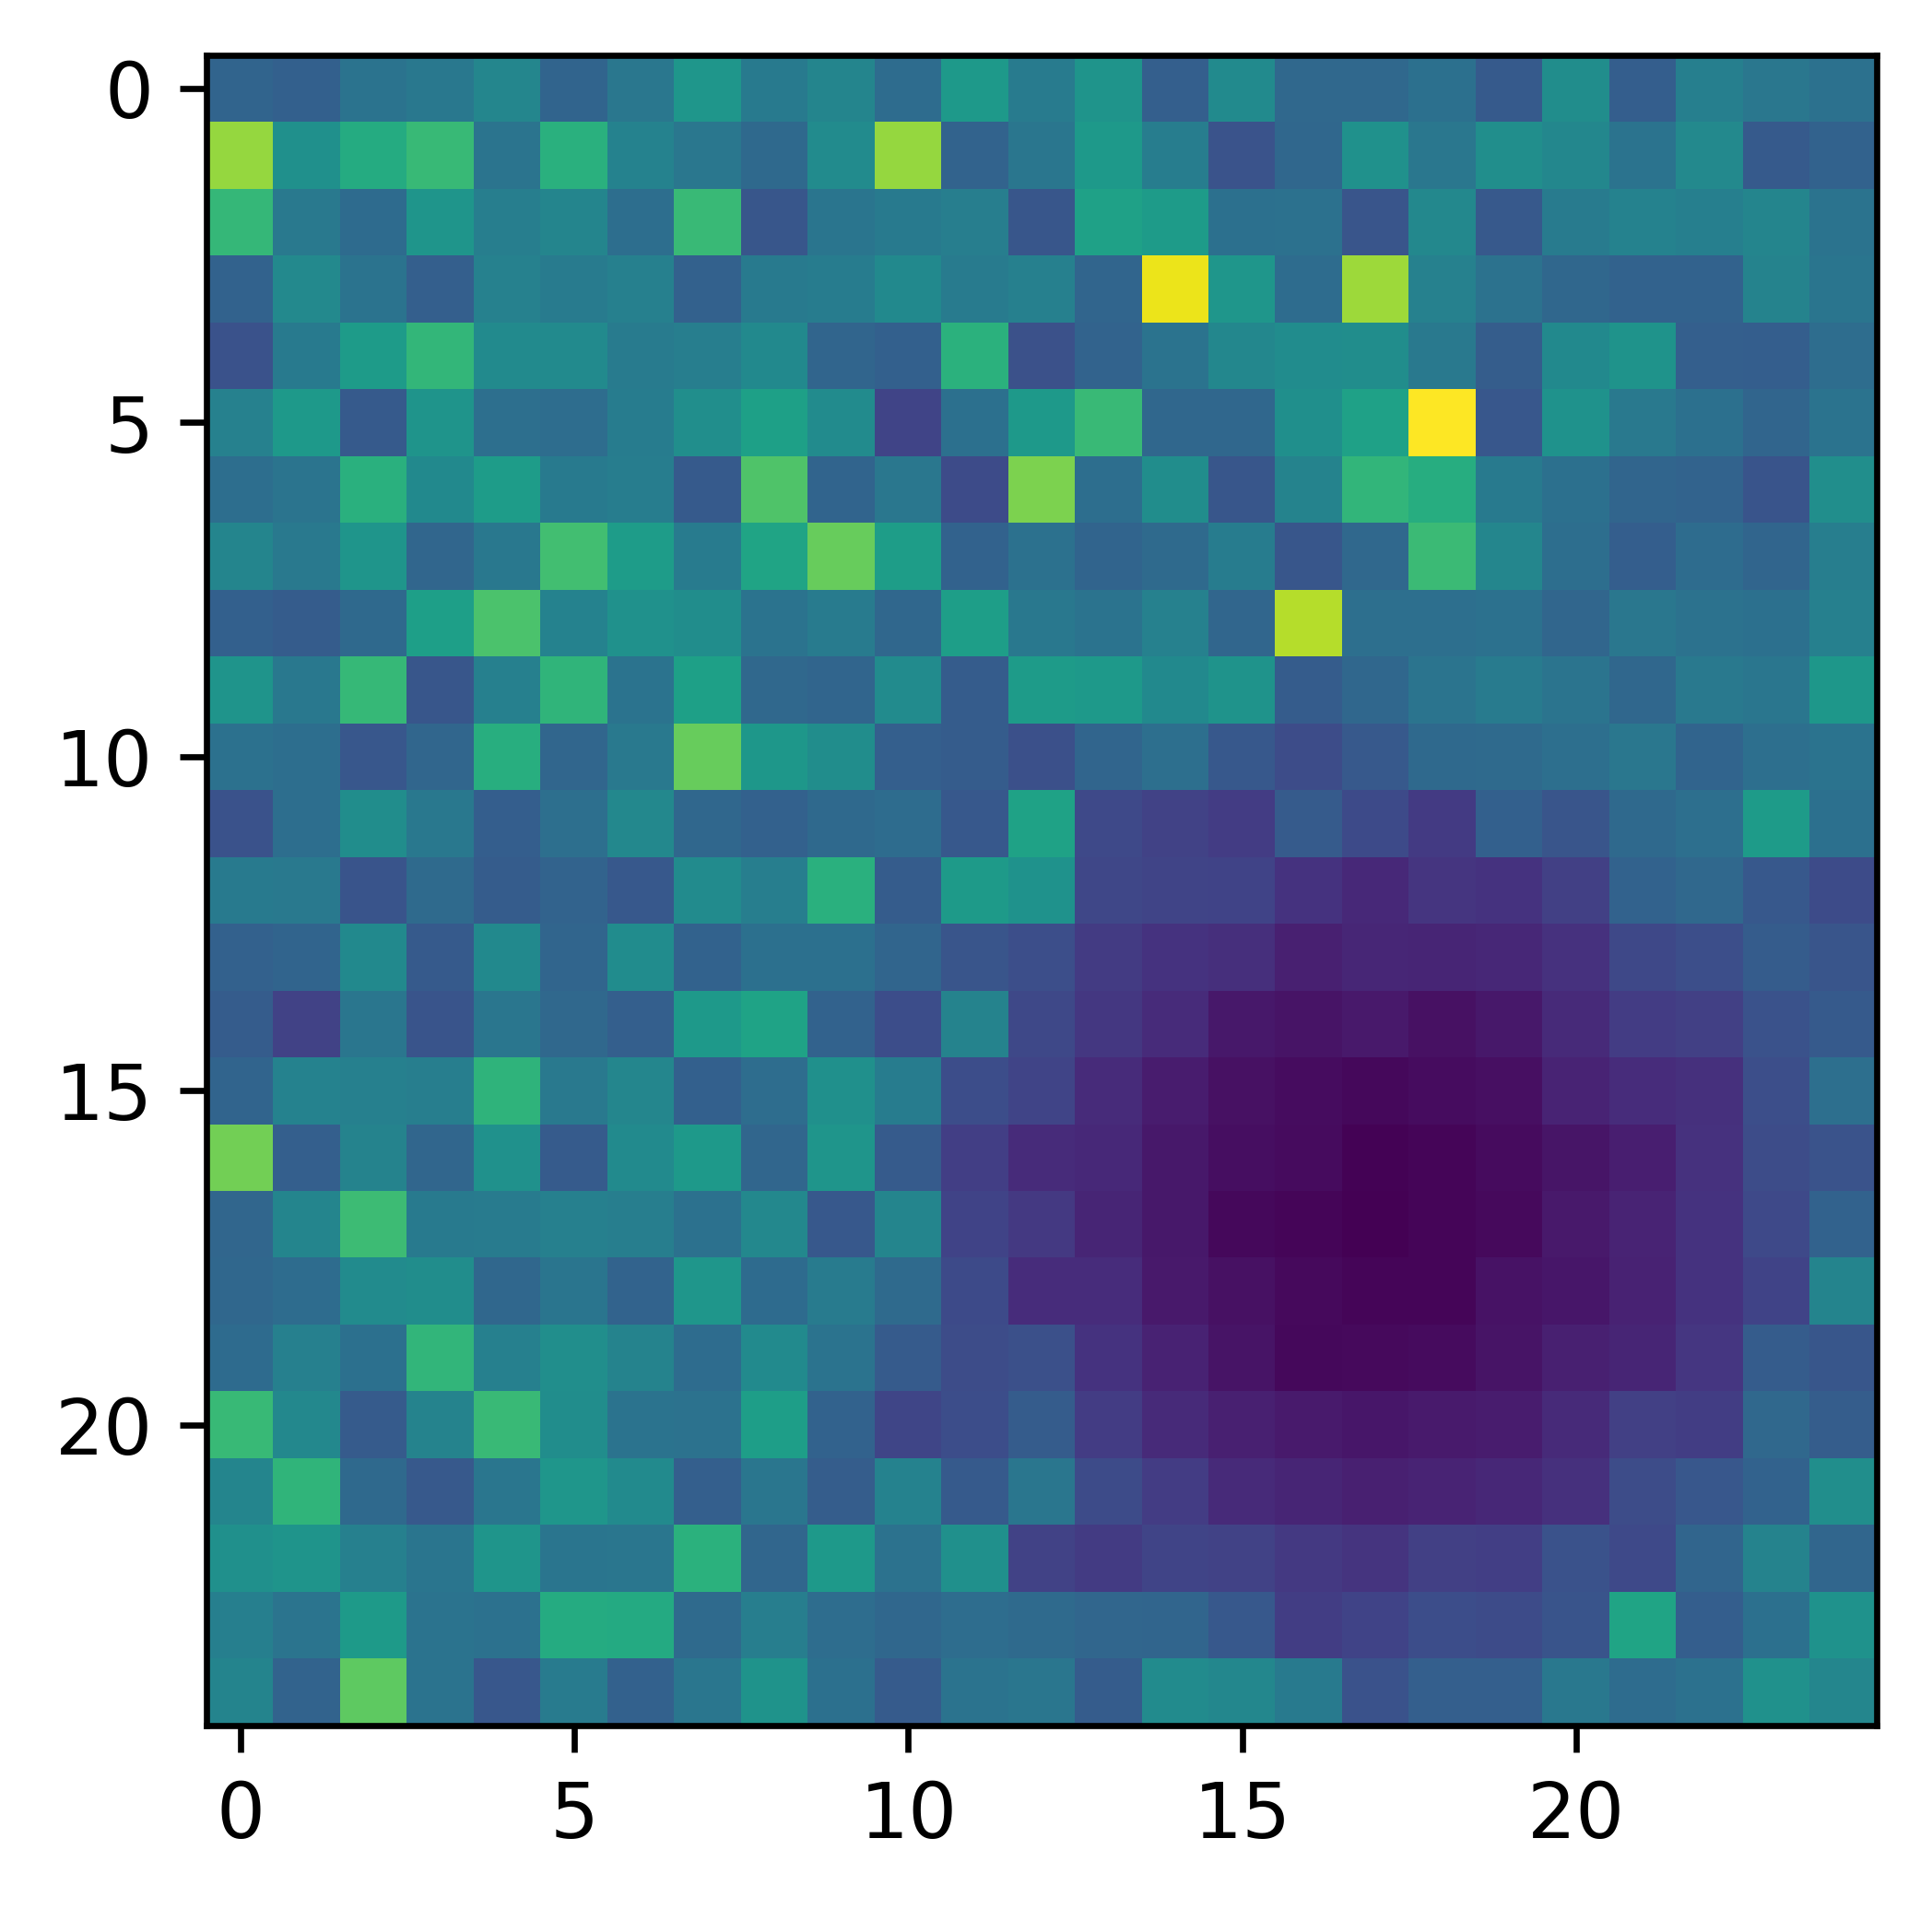

Detection at position (14, 7) with value 0.6190030111520743
Detection at position (22, 3) with value 0.6097073578704351


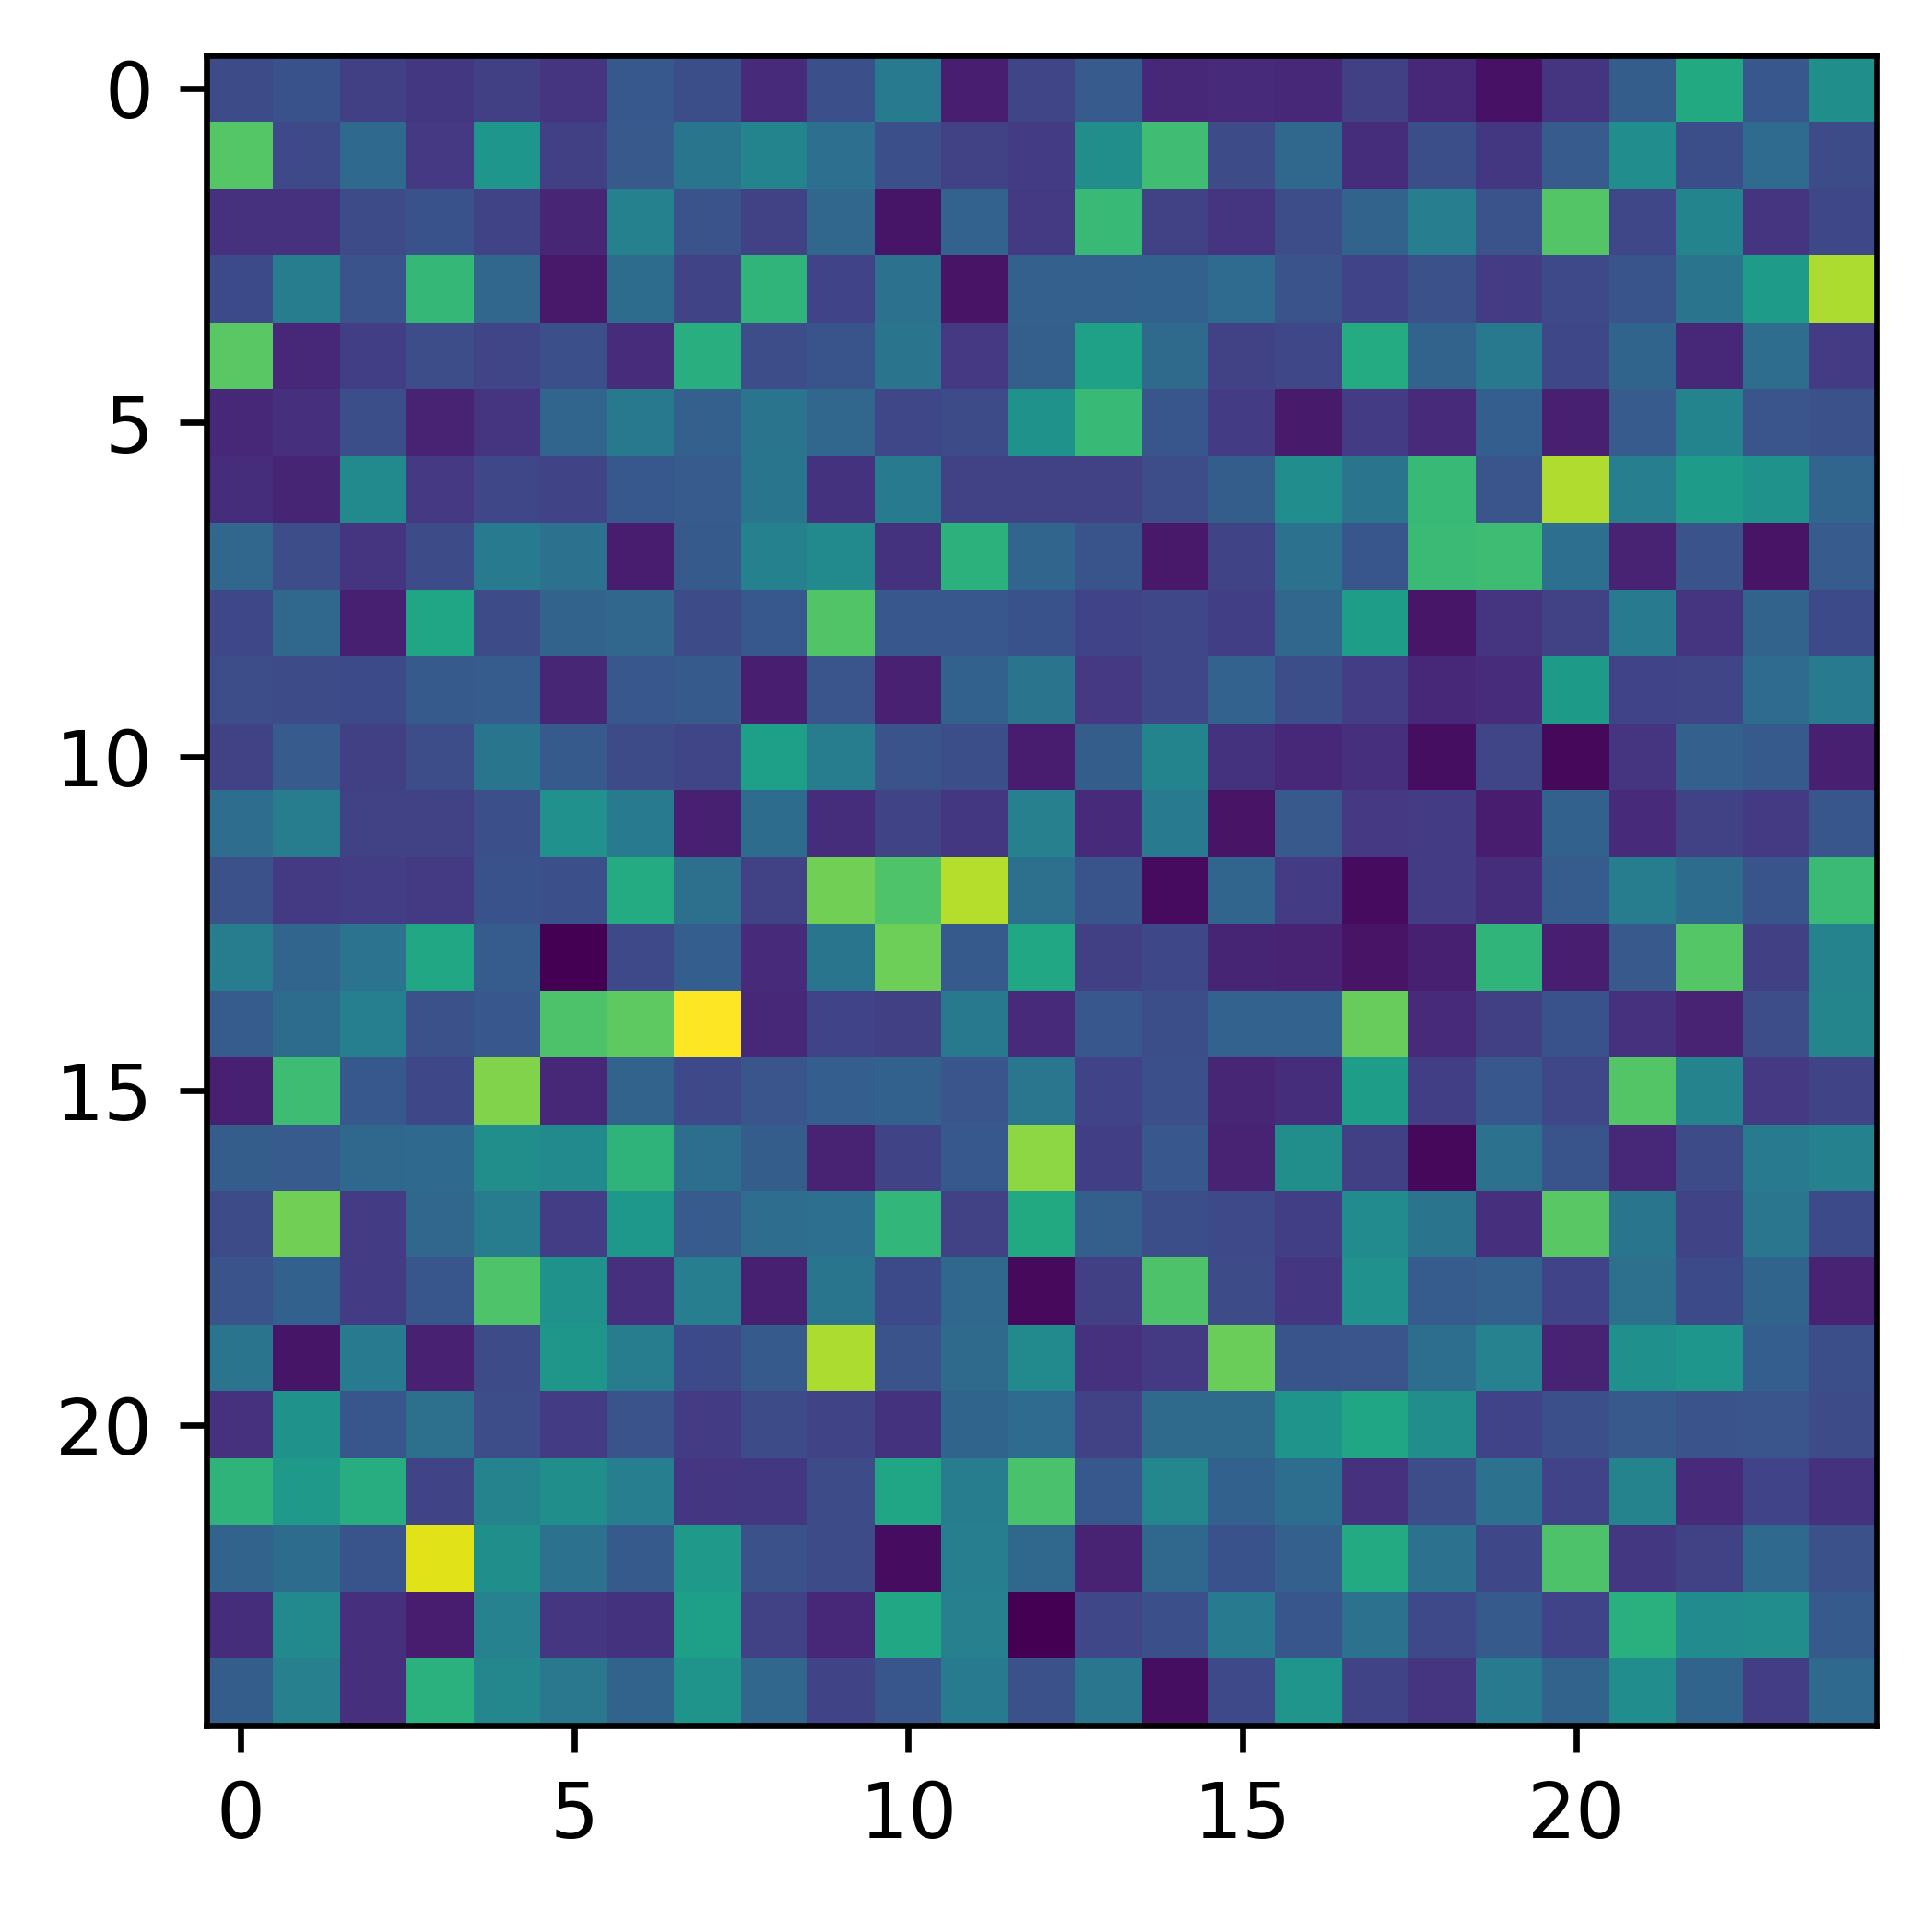

Detection at position (9, 17) with value 0.6705757076602192
Detection at position (12, 6) with value 0.6009149607651106
Detection at position (14, 19) with value 0.6819122860472634
Detection at position (20, 24) with value 0.6006810193433322
Detection at position (23, 3) with value 0.617128902933719


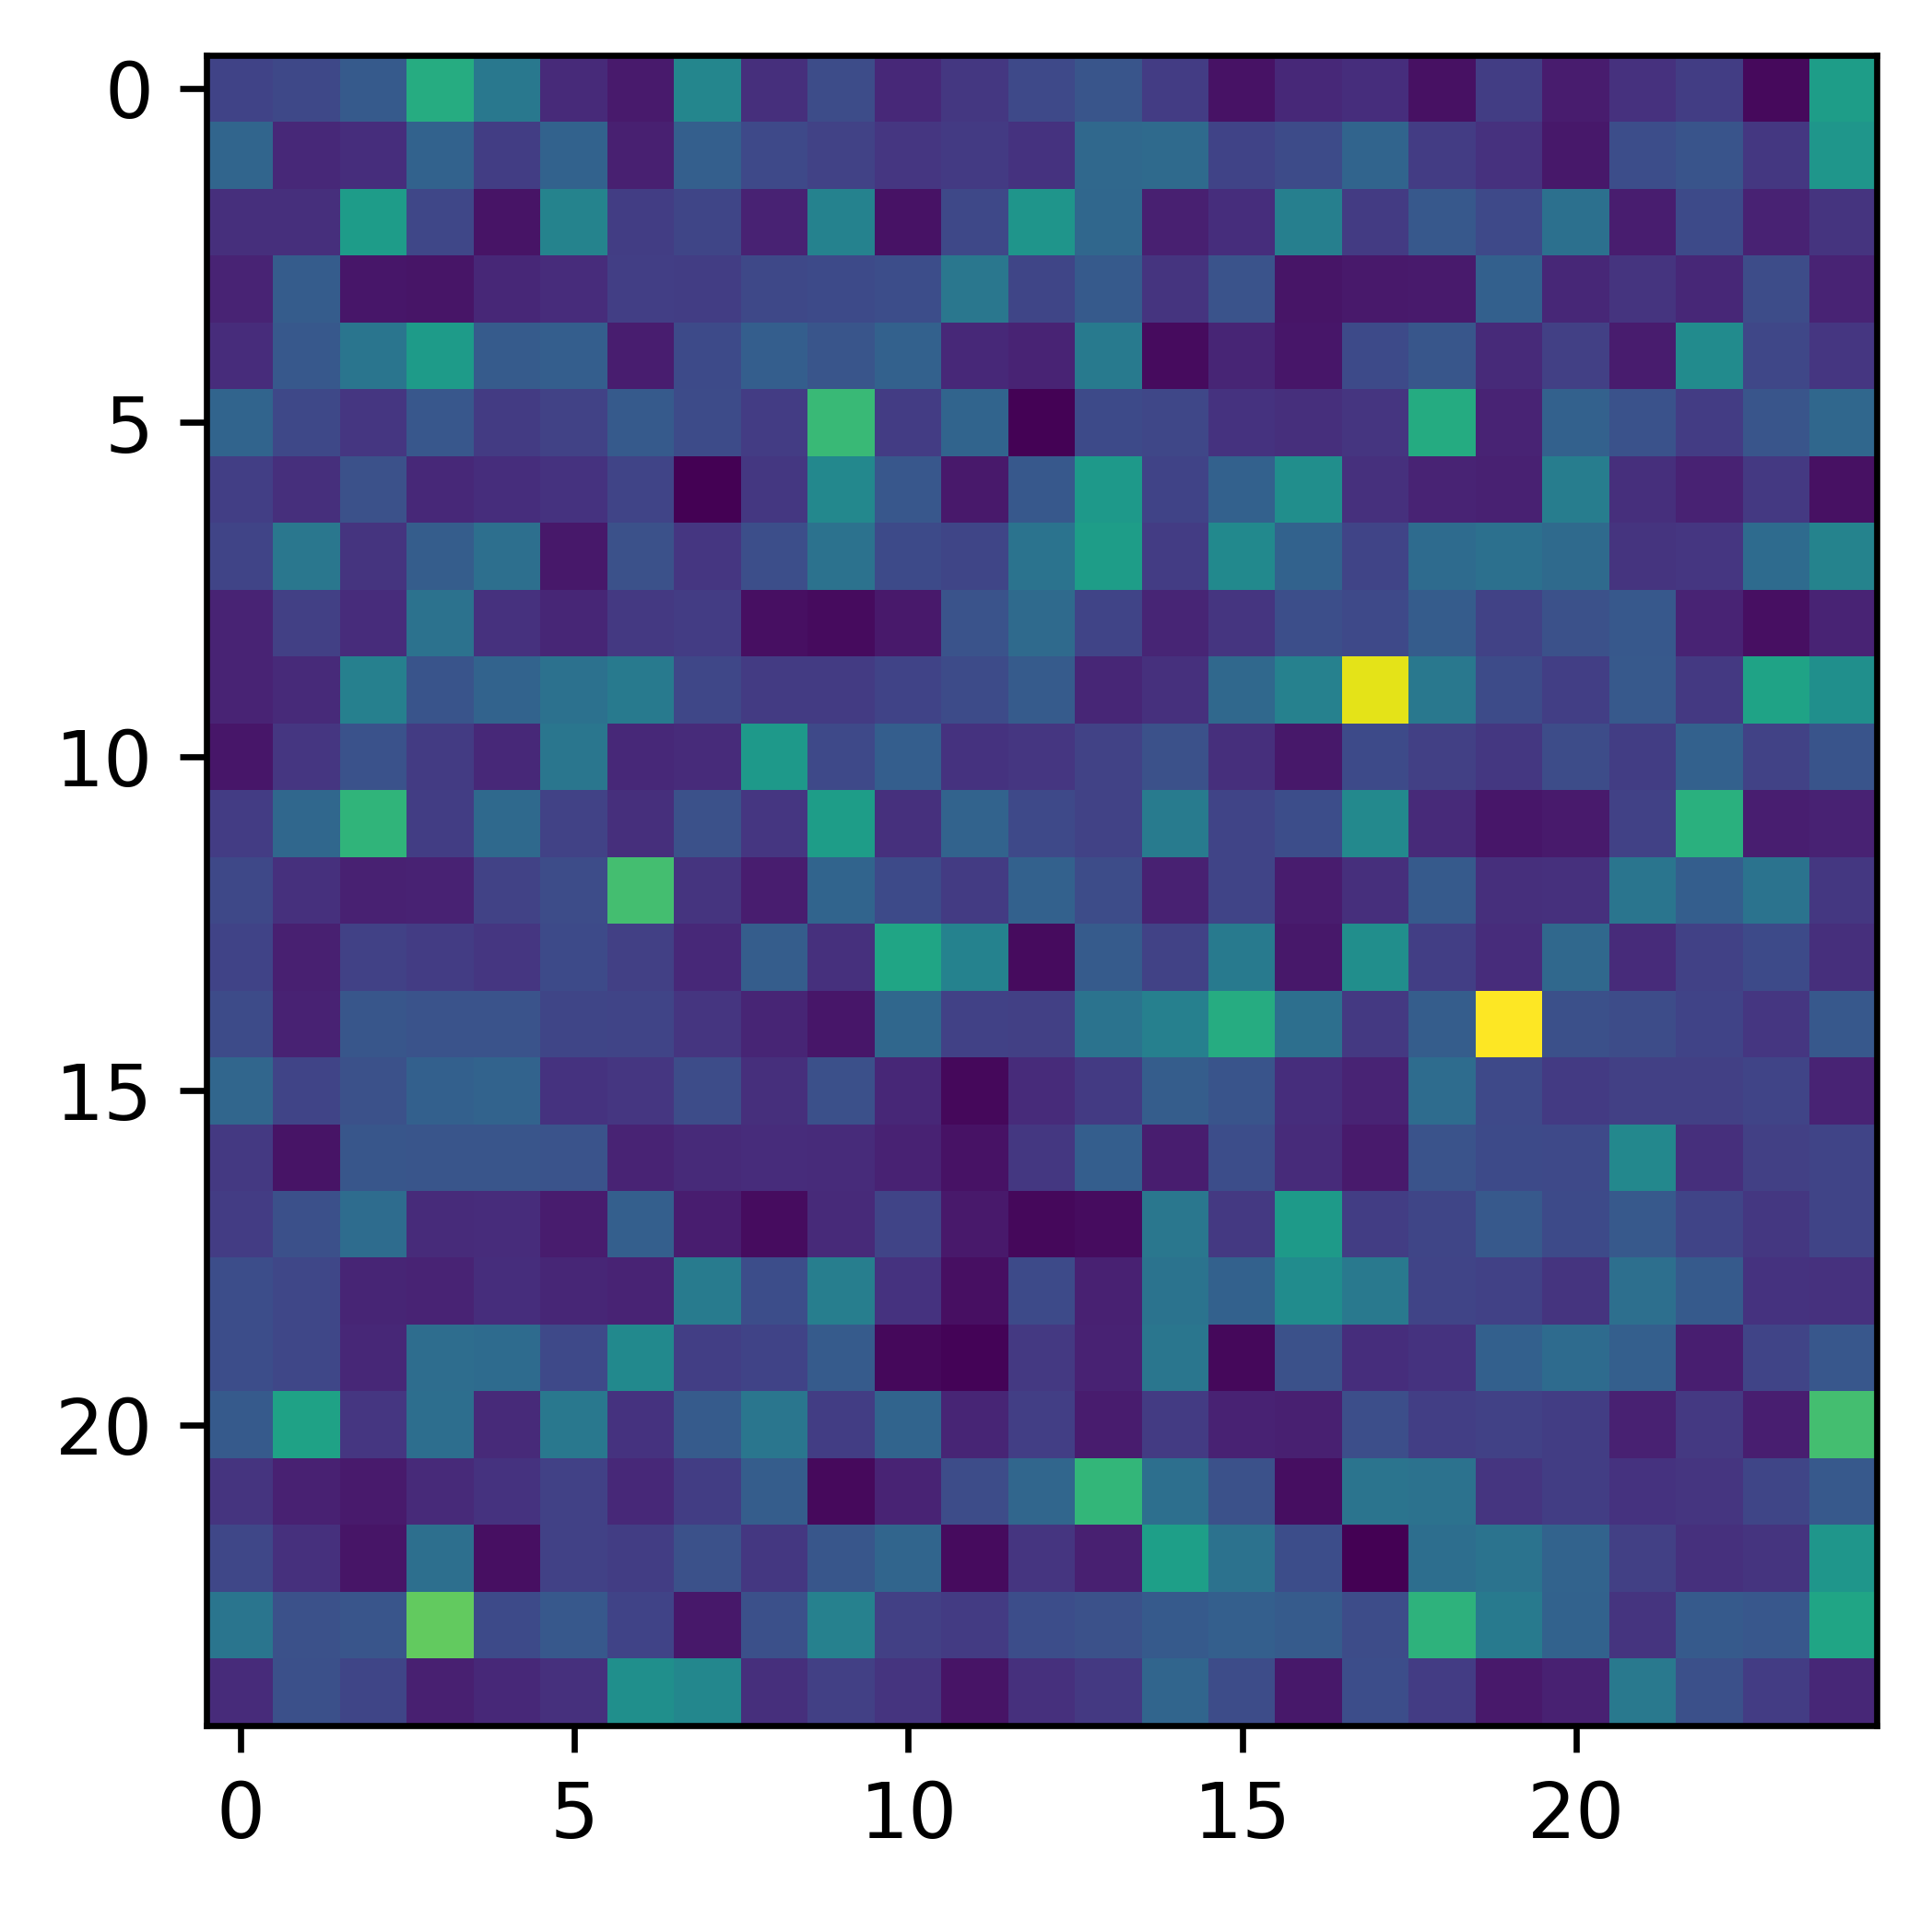

Detection at position (0, 3) with value 0.6136515633491617
Detection at position (6, 14) with value 0.6424728069396703
Detection at position (9, 6) with value 0.6379926253389866
Detection at position (12, 16) with value 0.6061830802751191
Detection at position (13, 7) with value 0.606655989167889
Detection at position (20, 17) with value 0.6196780564975737


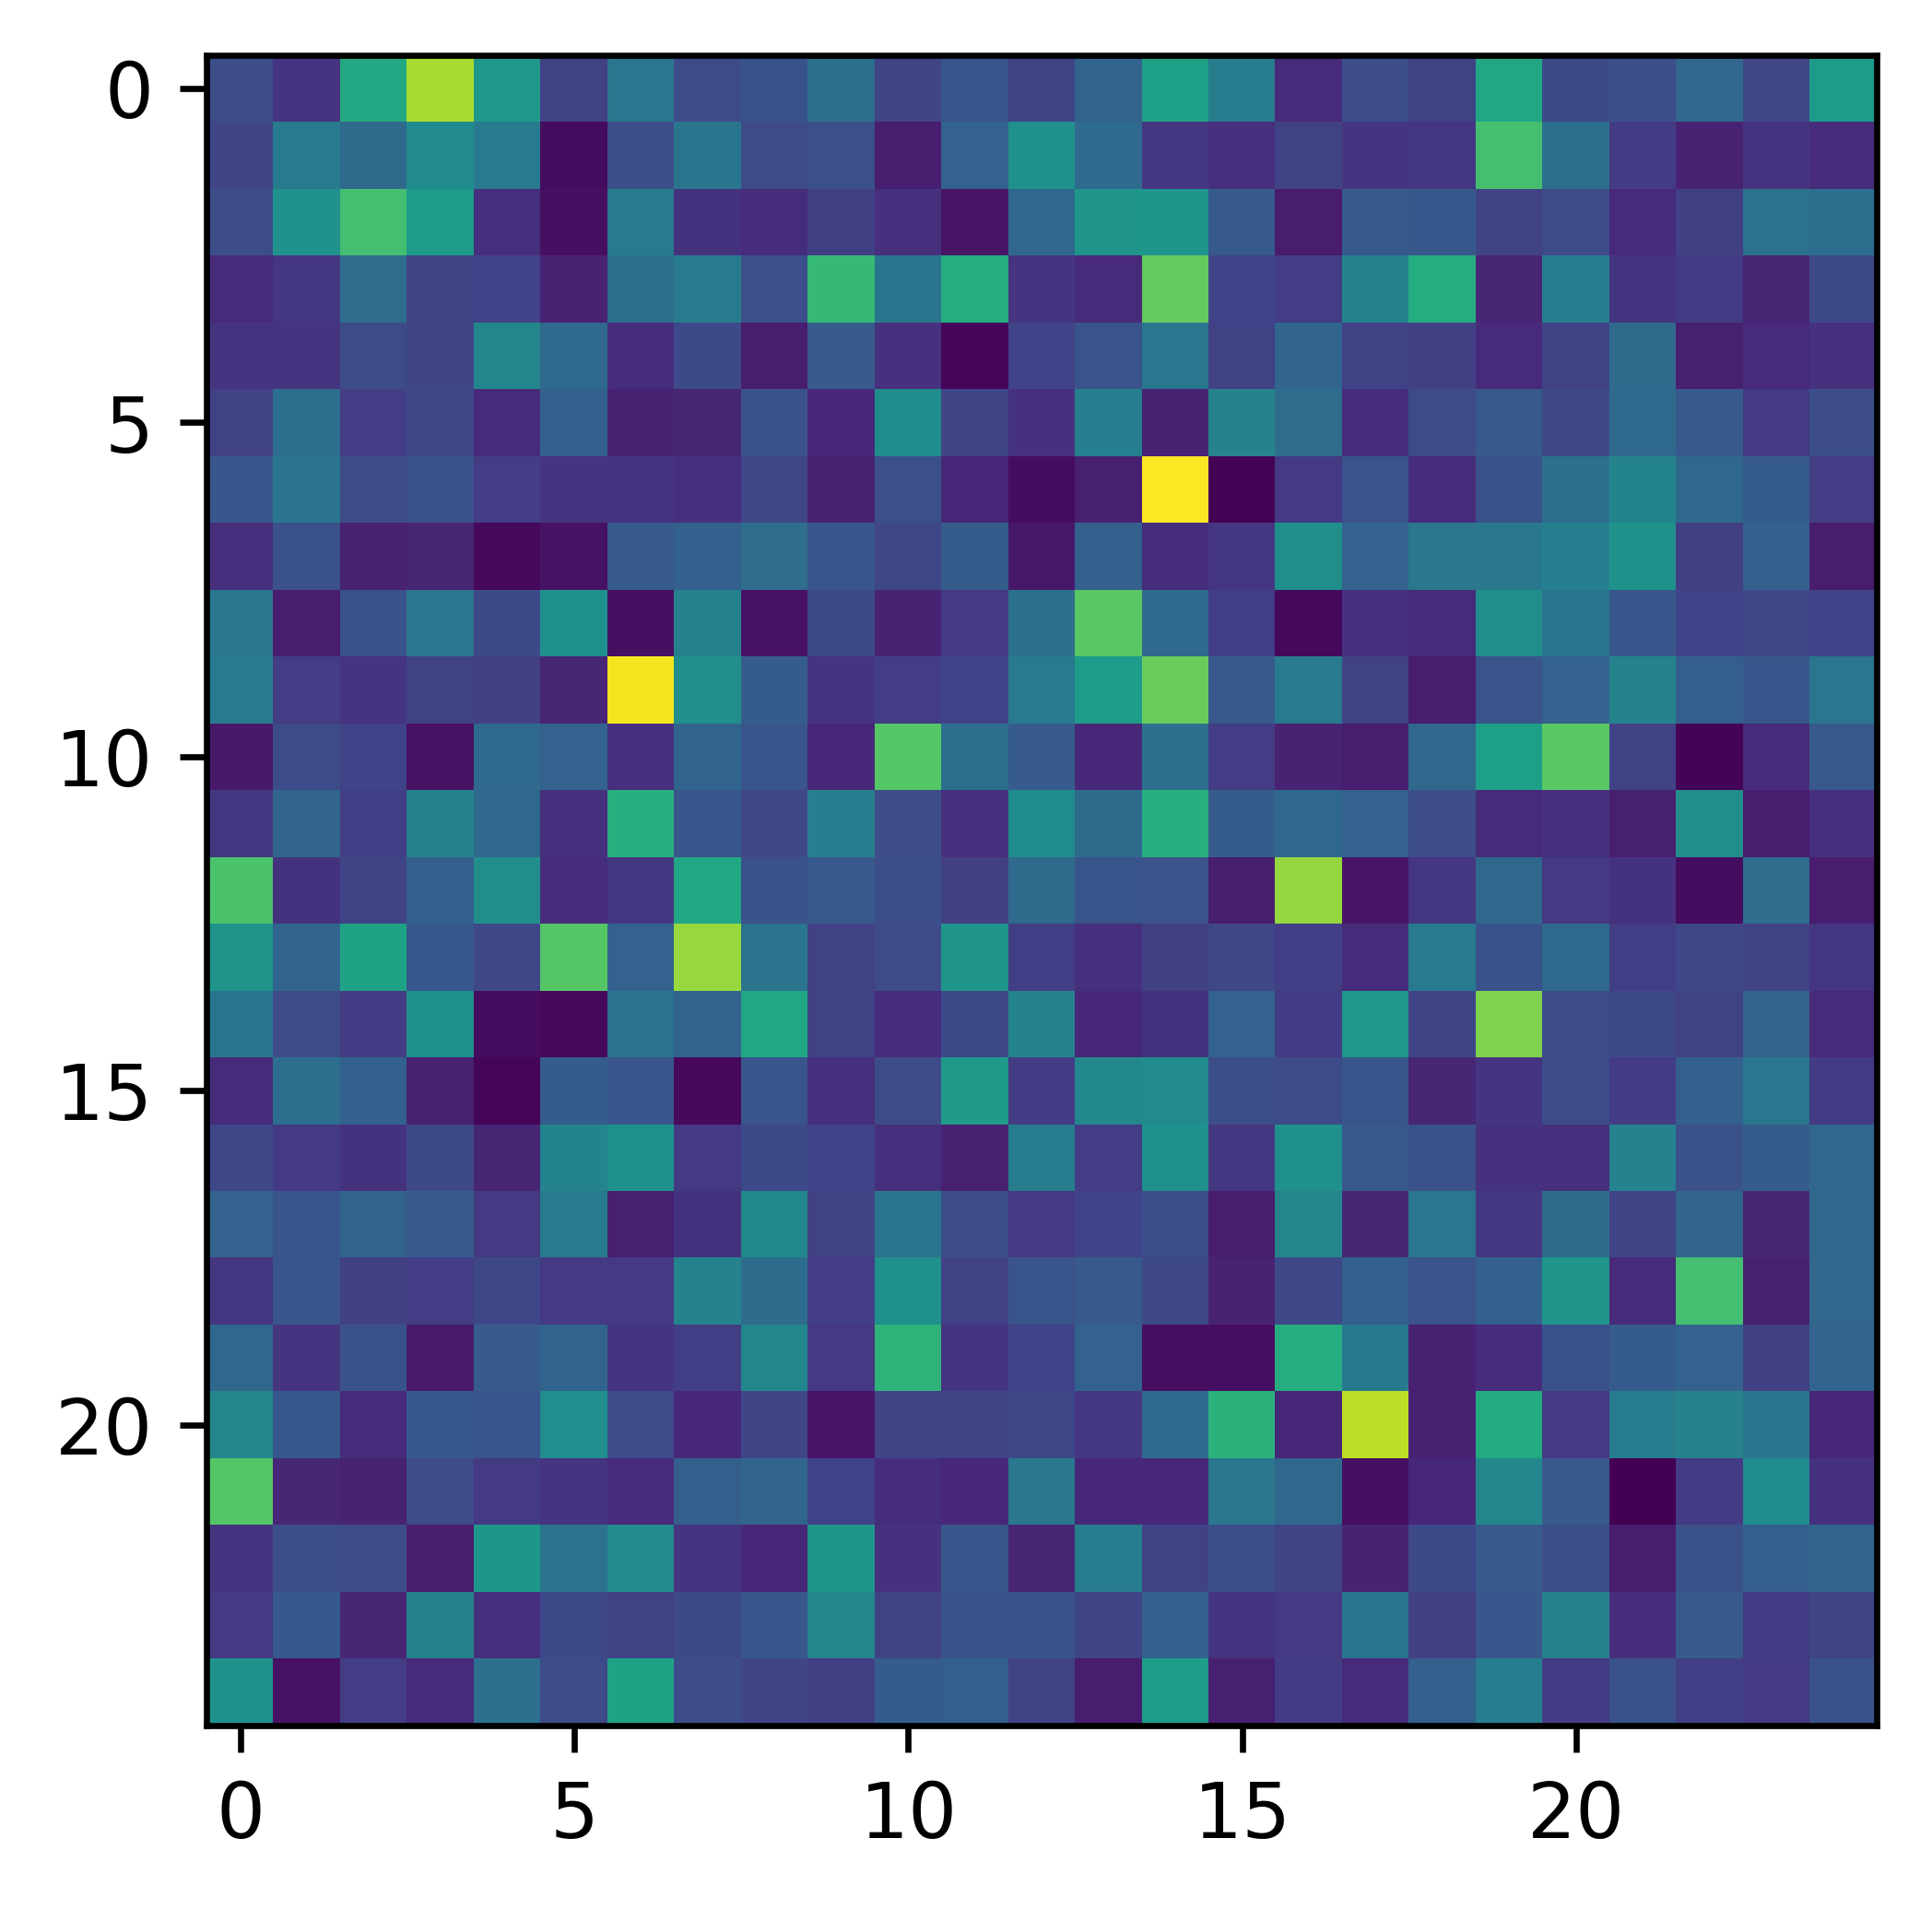

In [60]:
coeffs2 = pywt.dwt2(image,(shapelet_horizontal,shapelet_vertical),mode='per')
LL, (LH, HL, HH) = coeffs2
for i, a in enumerate([LL, LH, HL, HH]):
    plt.gcf().set_dpi(600)
    plt.imshow(S(a))  
    detect_pattern(S(a))
    plt.show()

Detection at position (4, 0) with value 0.7021893757321191
Detection at position (5, 20) with value 0.6156788472617247
Detection at position (8, 5) with value 0.6576486614925686
Detection at position (22, 18) with value 0.623282474876034
Detection at position (23, 20) with value 0.6002306125784461
Detection at position (24, 24) with value 0.6488545878375851


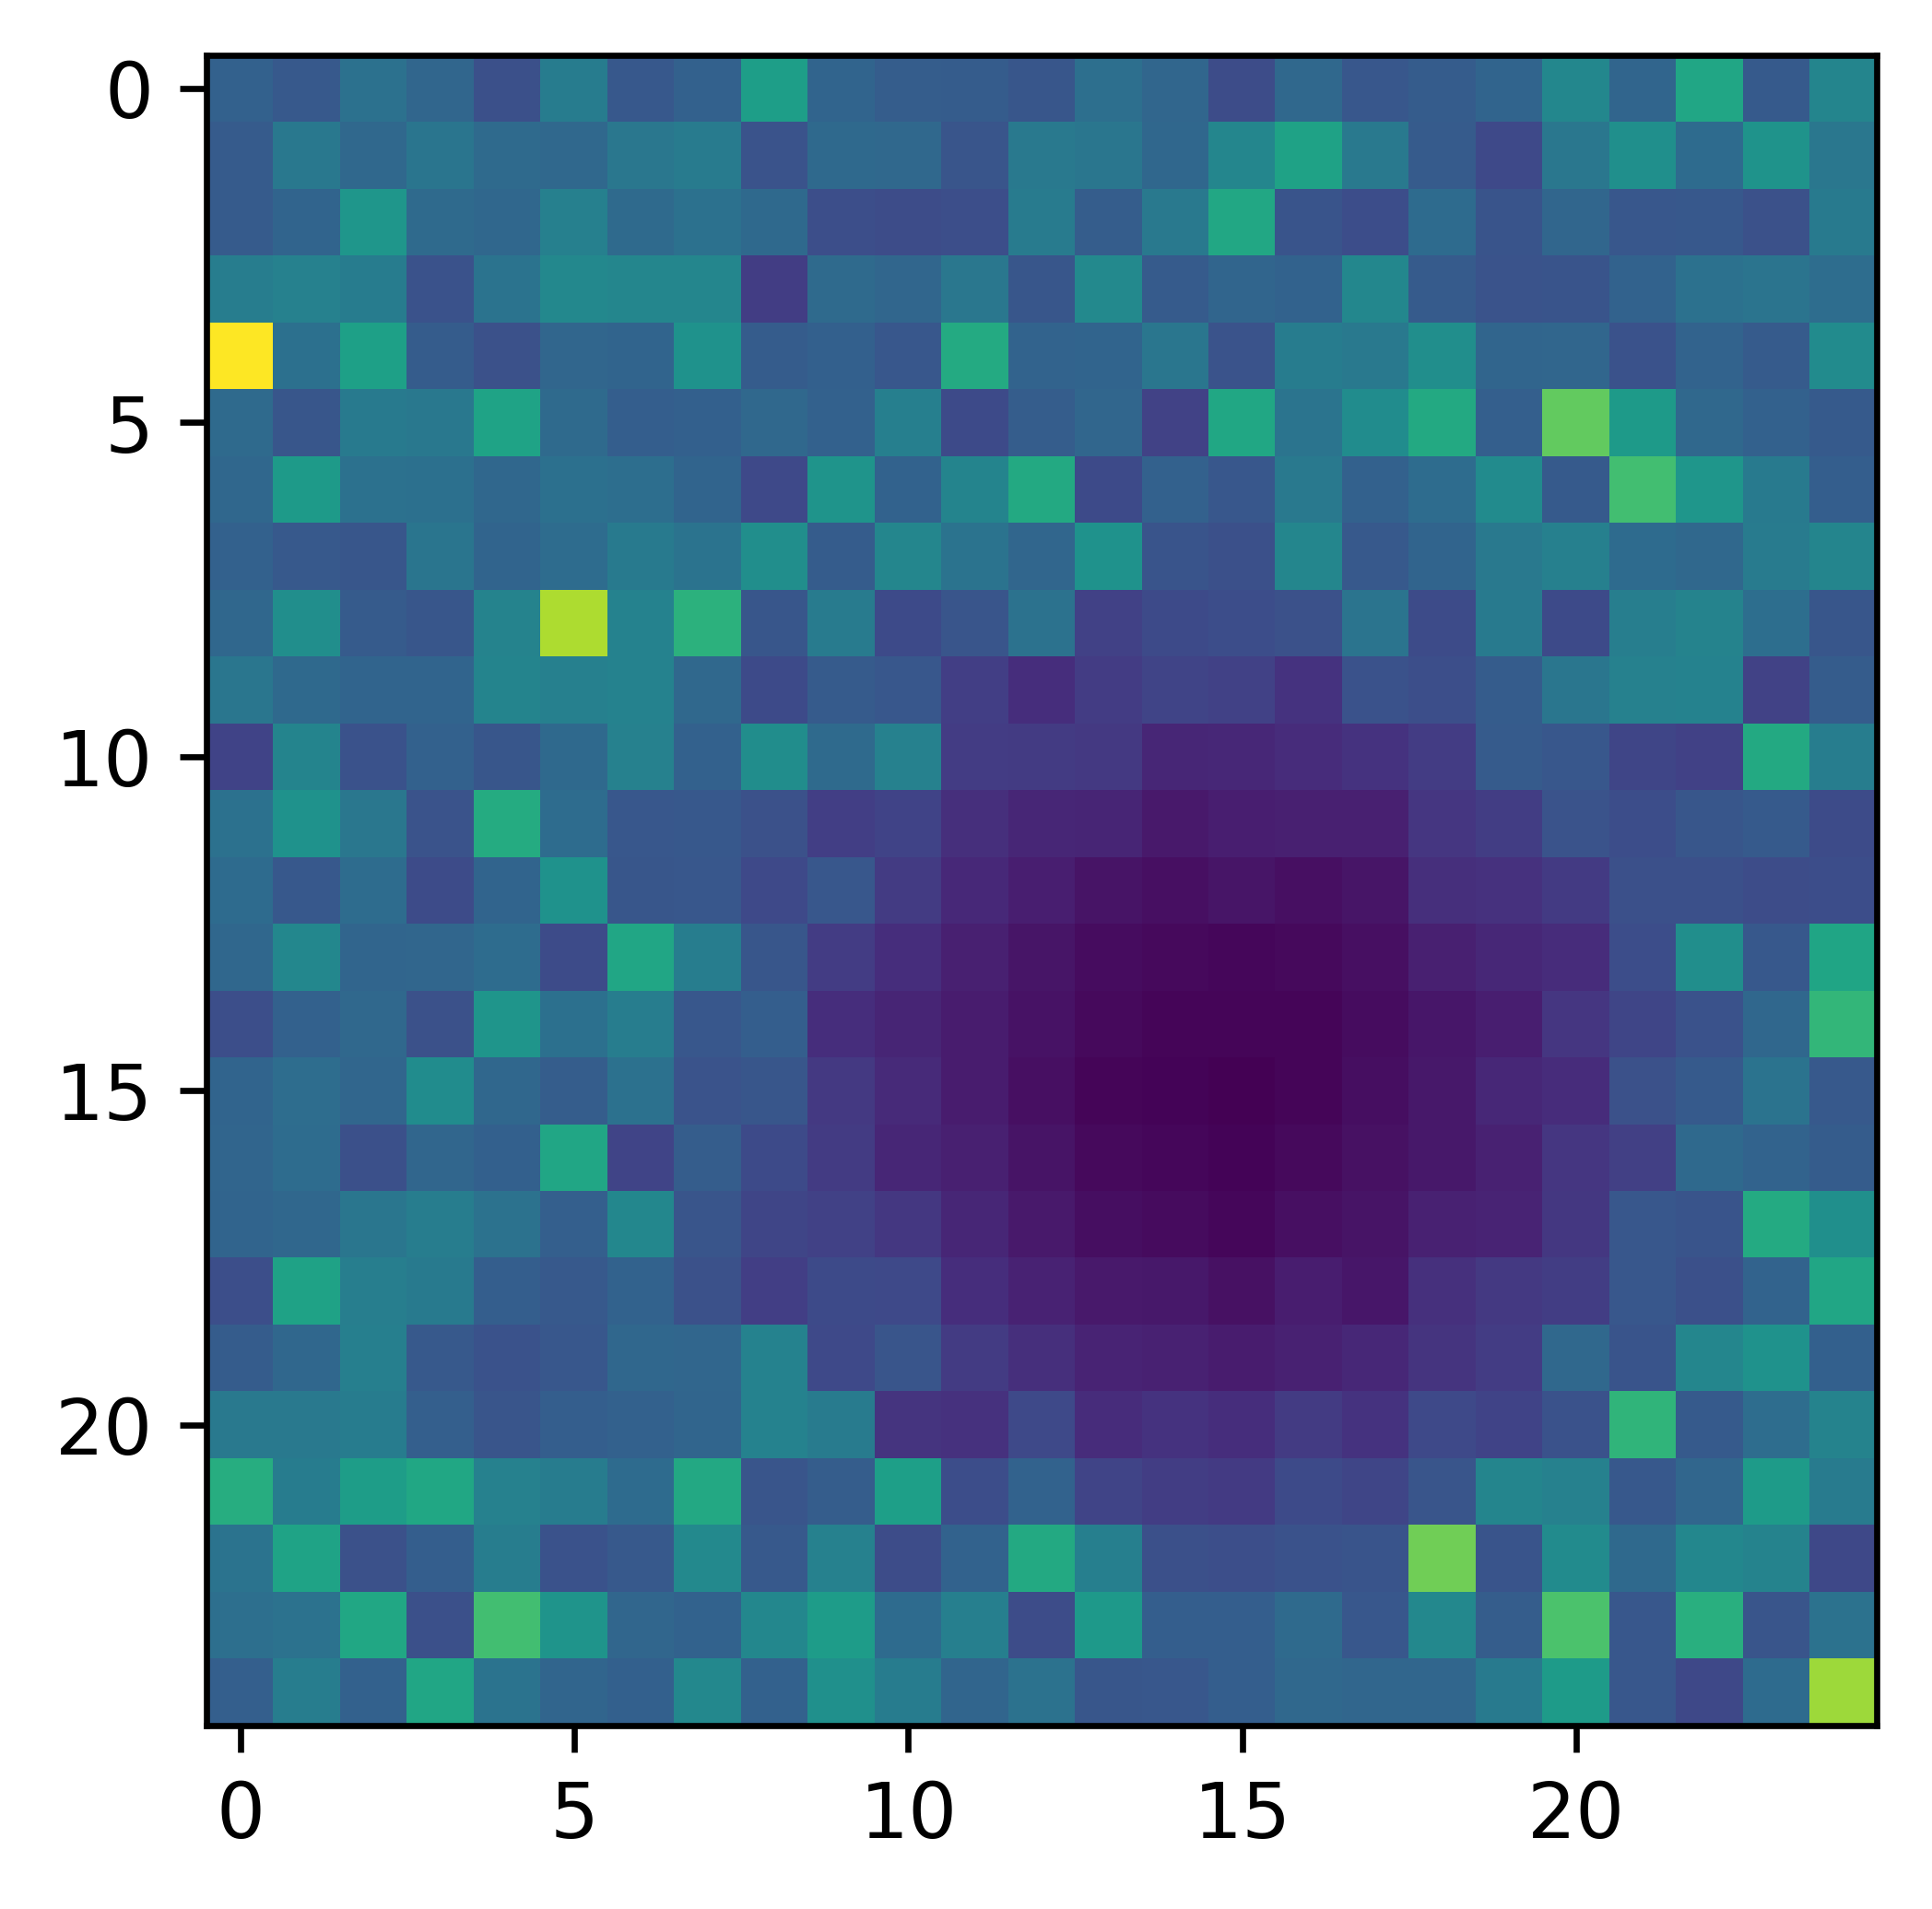

Detection at position (5, 2) with value 0.7166917050135525
Detection at position (7, 24) with value 0.6346812459279796
Detection at position (15, 0) with value 0.6601734073598597
Detection at position (16, 12) with value 0.6003864391745389
Detection at position (21, 13) with value 0.6213770092360394
Detection at position (23, 11) with value 0.6087932437590846


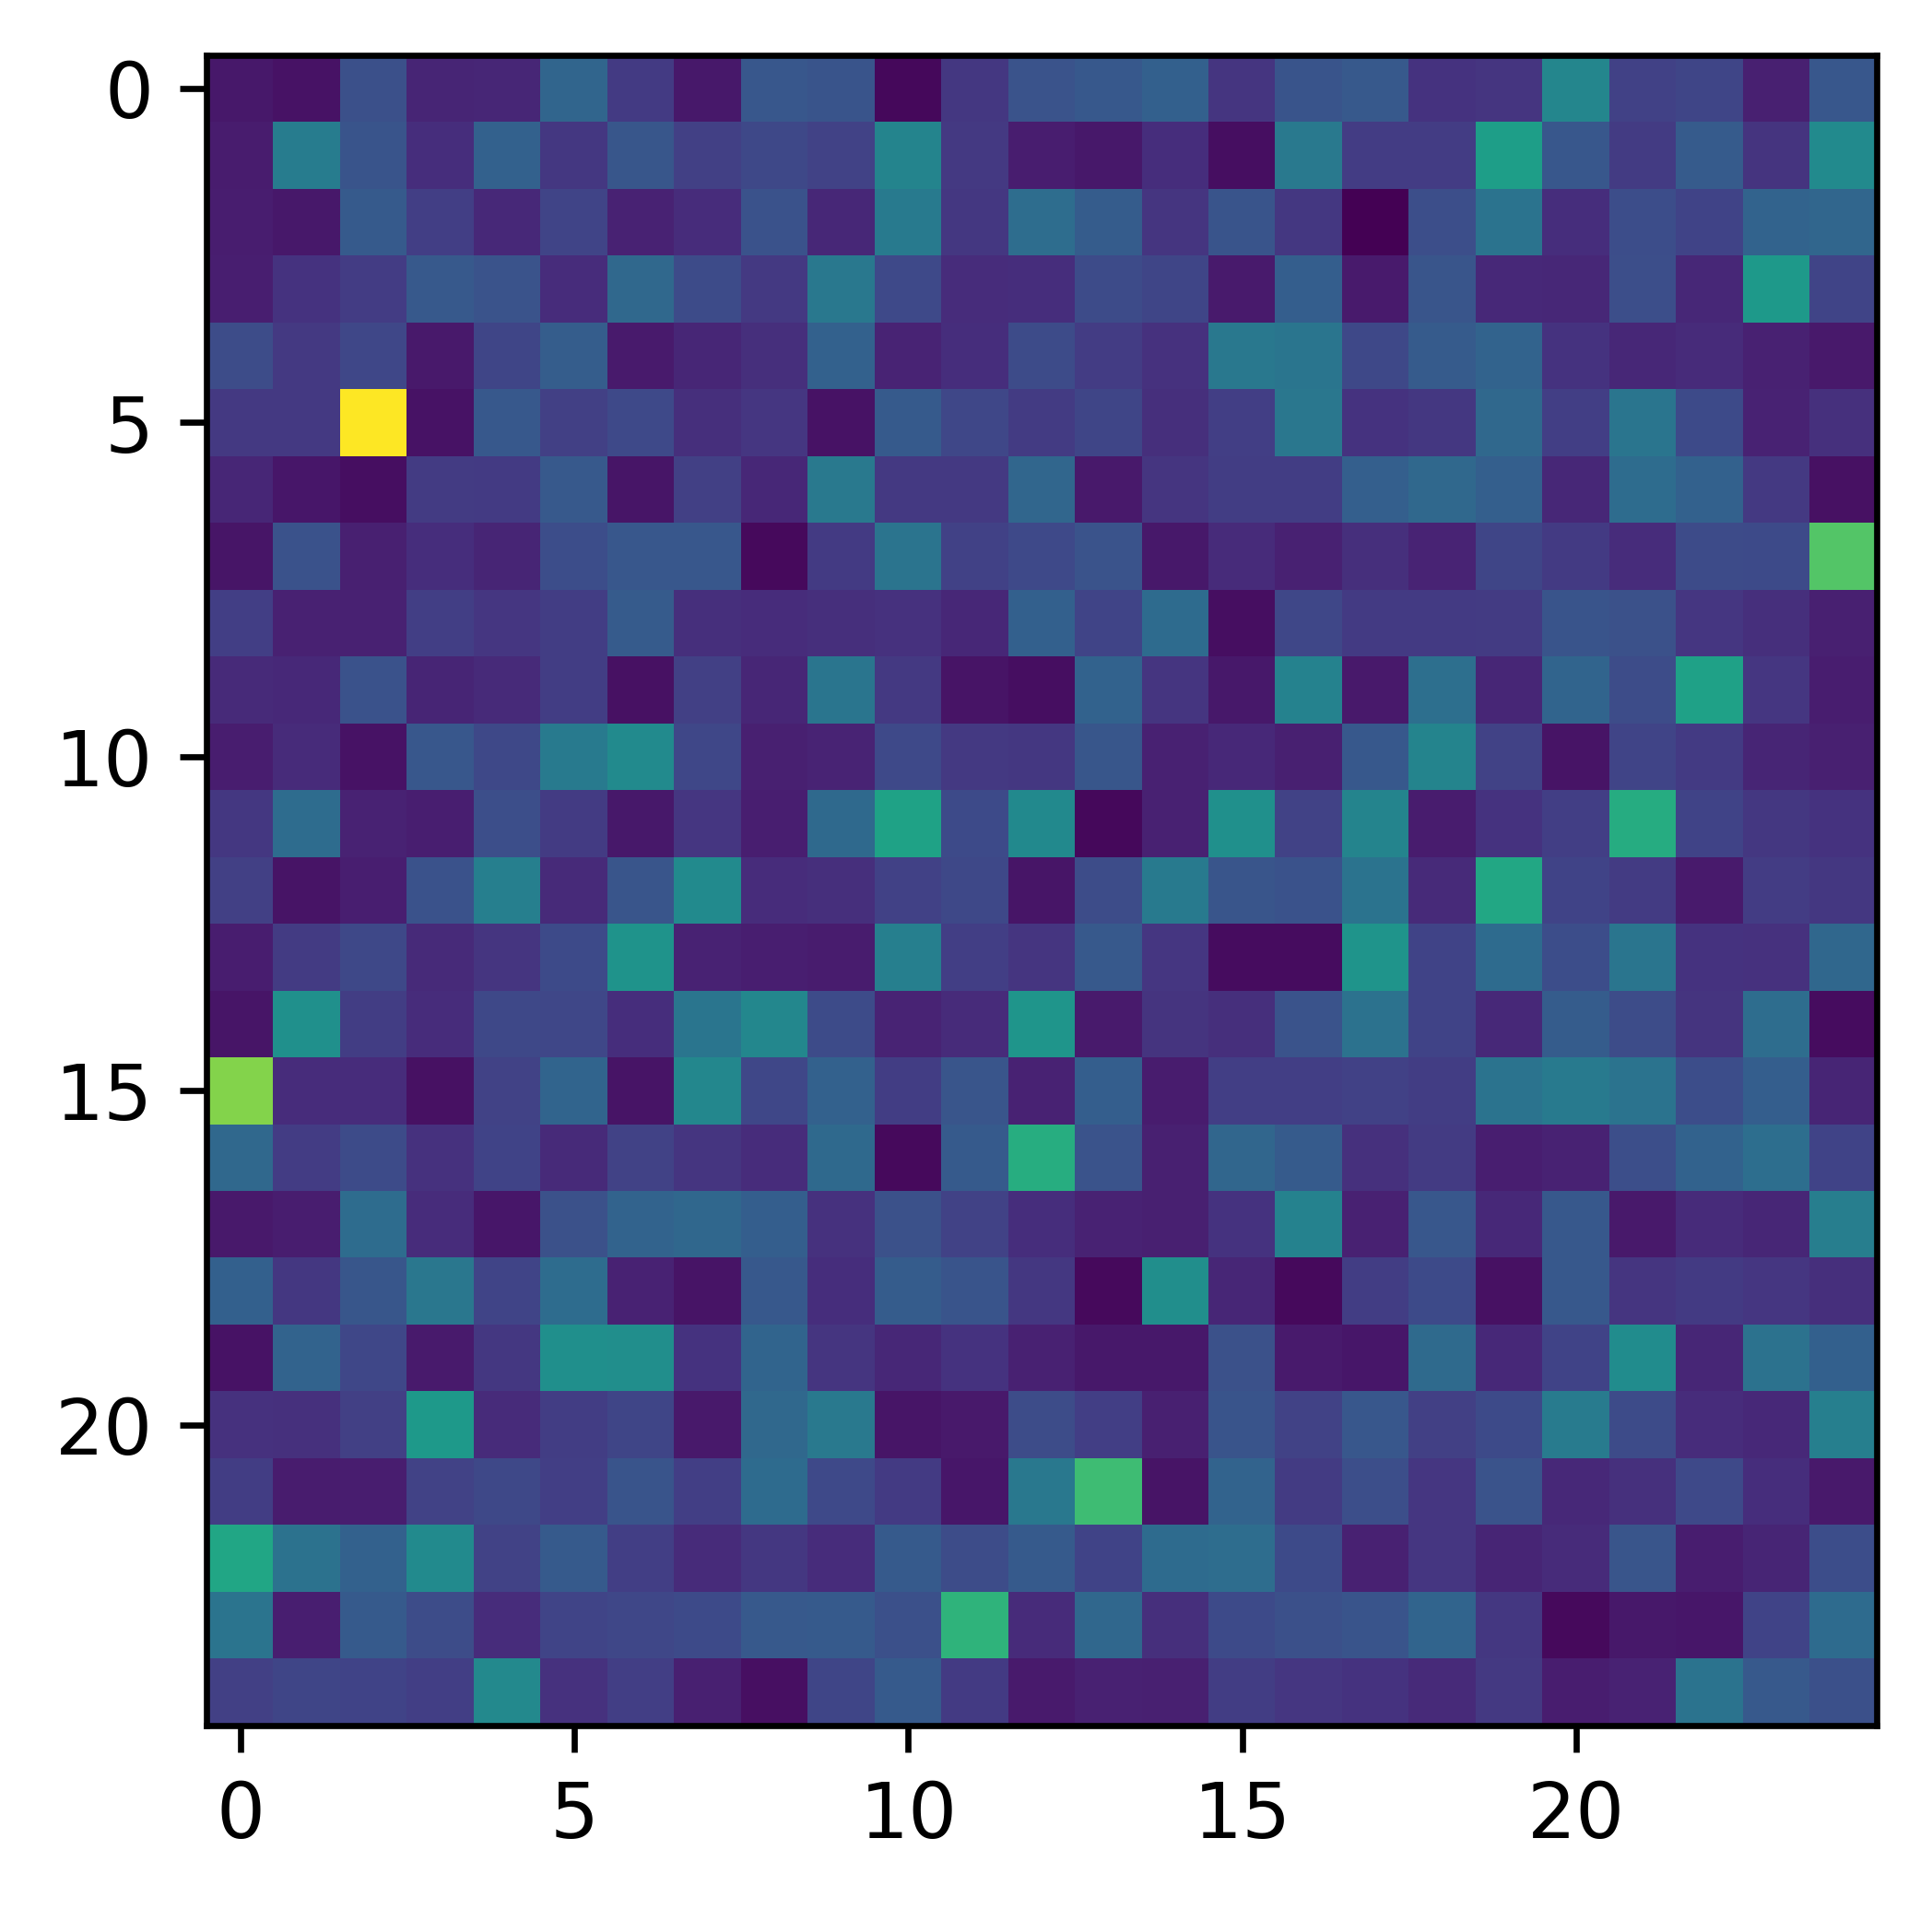

Detection at position (1, 24) with value 0.6462024897149261
Detection at position (11, 4) with value 0.6003502958953639
Detection at position (12, 8) with value 0.6463976868678595
Detection at position (14, 23) with value 0.6056005691468711
Detection at position (17, 9) with value 0.6220599746918742
Detection at position (21, 21) with value 0.6402055934683282


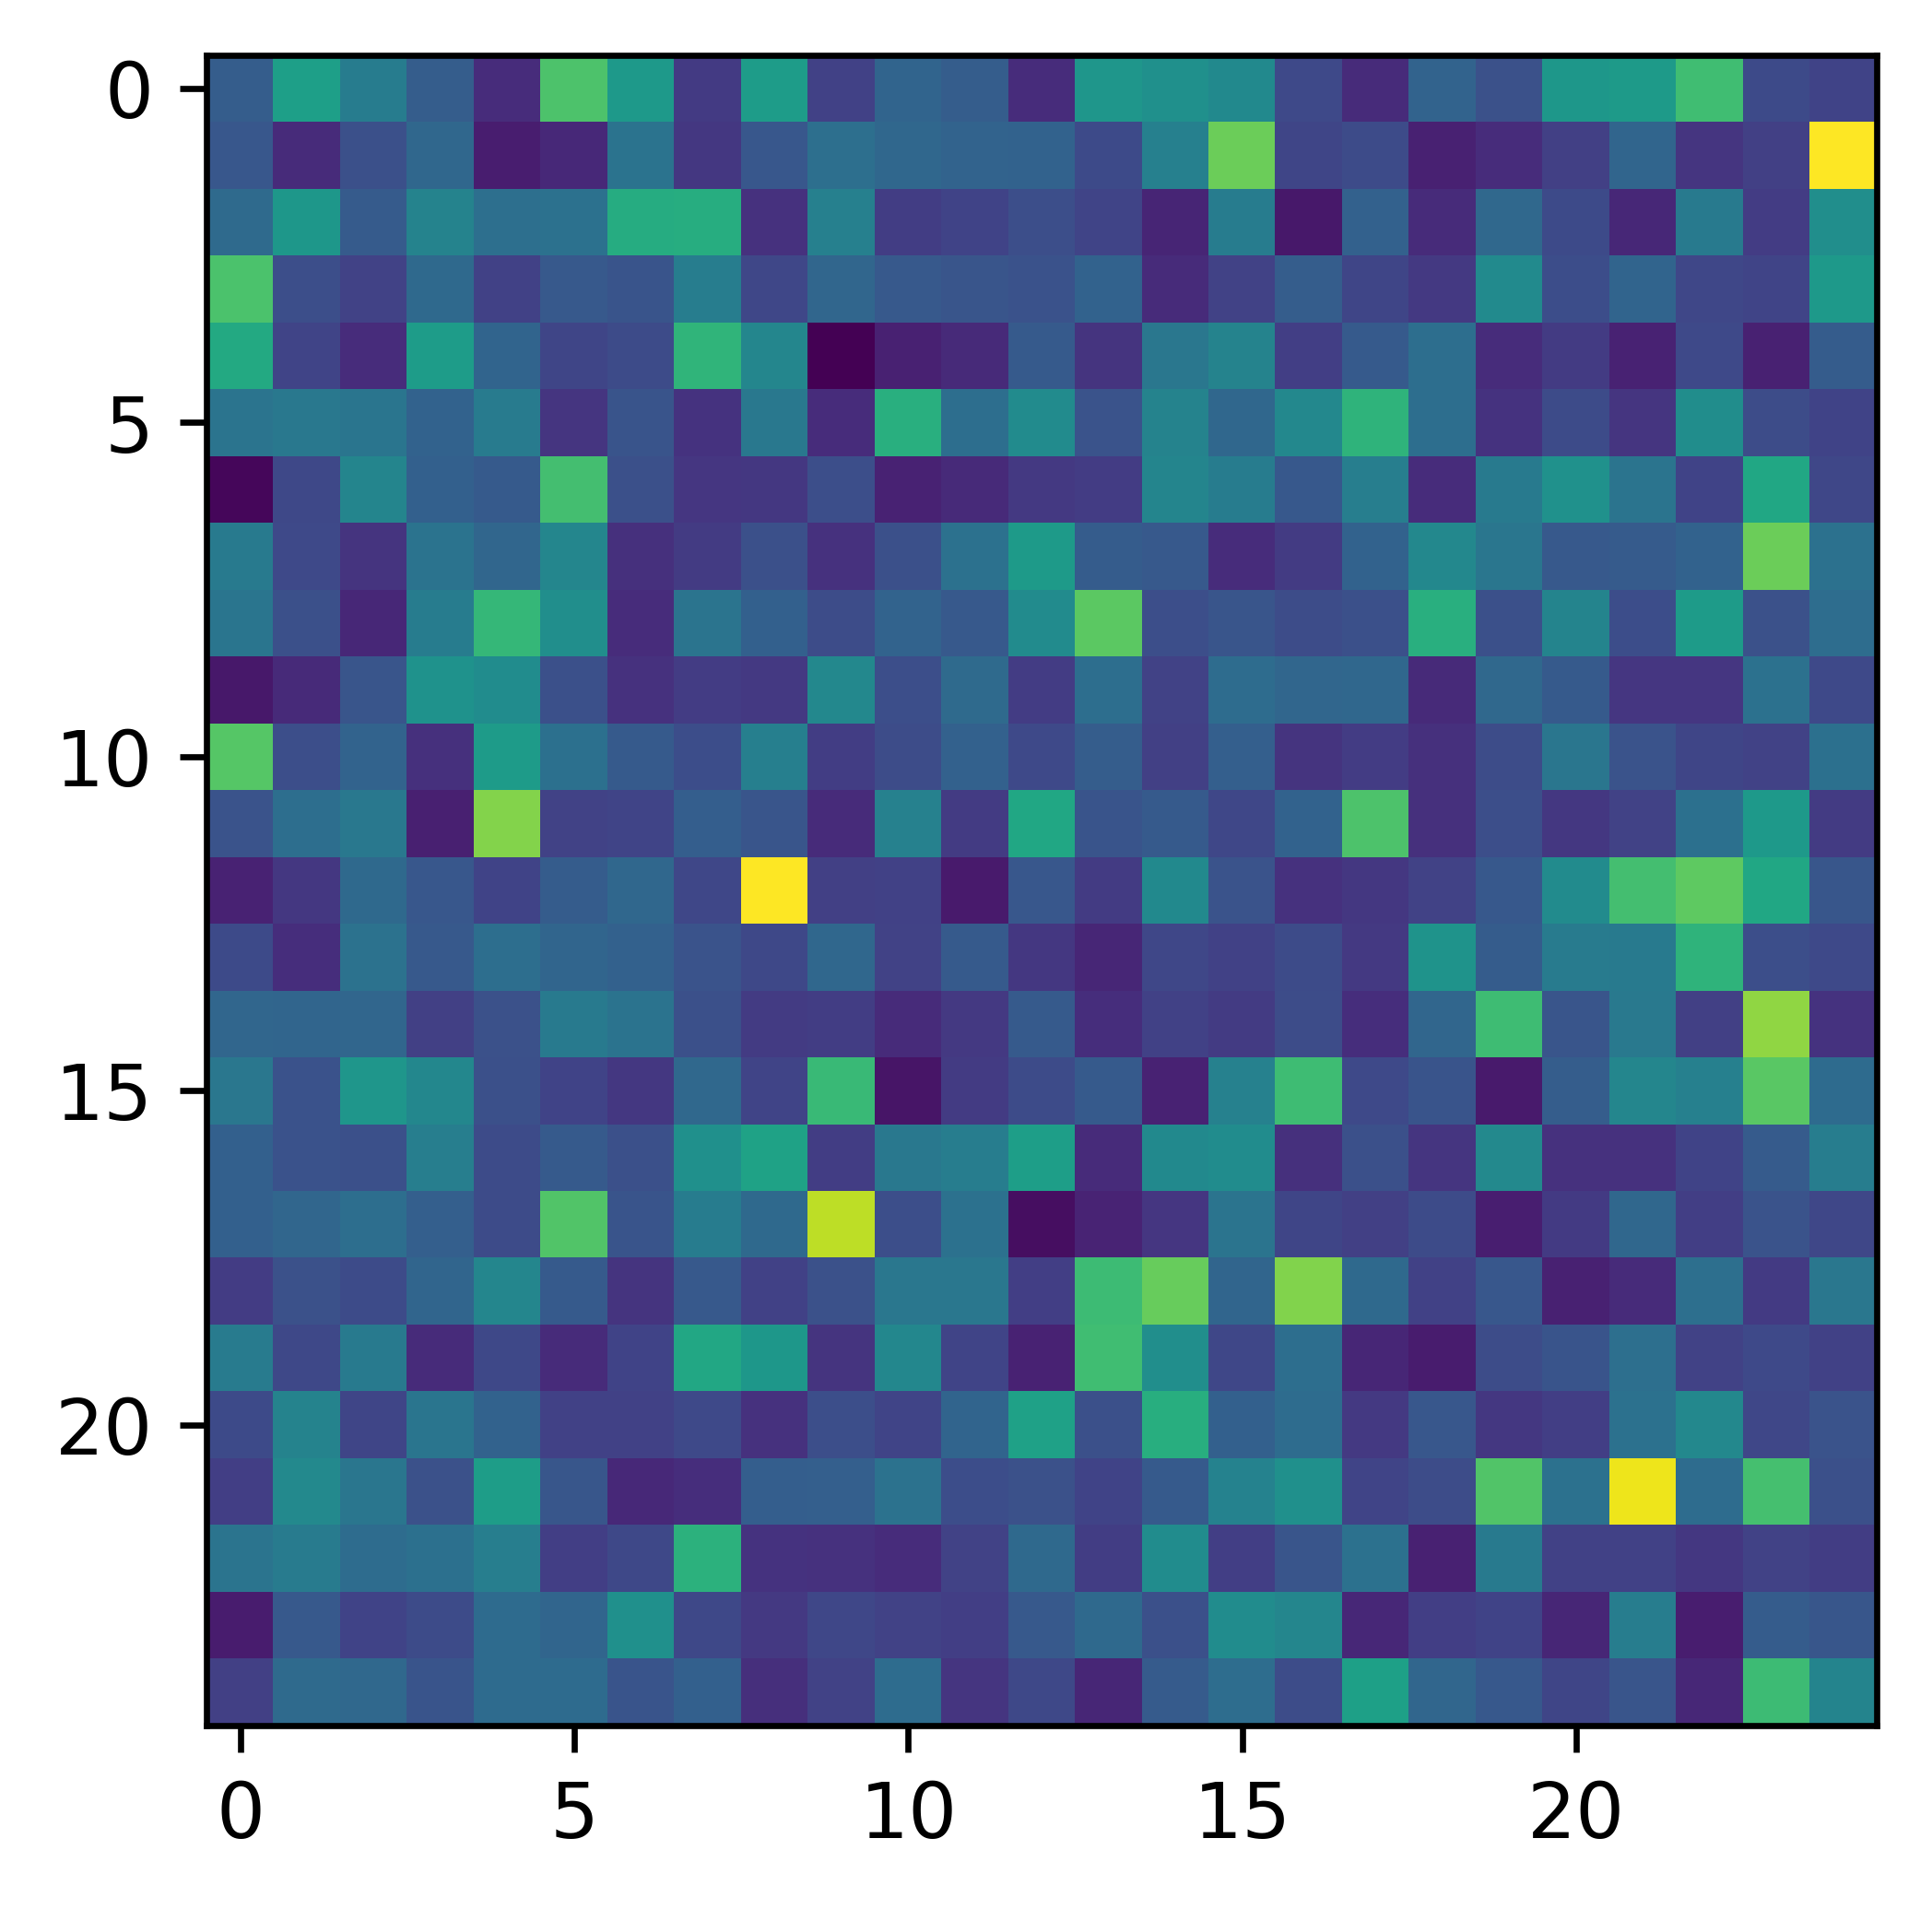

Detection at position (1, 14) with value 0.6803680951791411
Detection at position (10, 5) with value 0.6239917218975302
Detection at position (11, 19) with value 0.6147379102448431
Detection at position (15, 24) with value 0.6380778281162097
Detection at position (21, 7) with value 0.6252247193514179


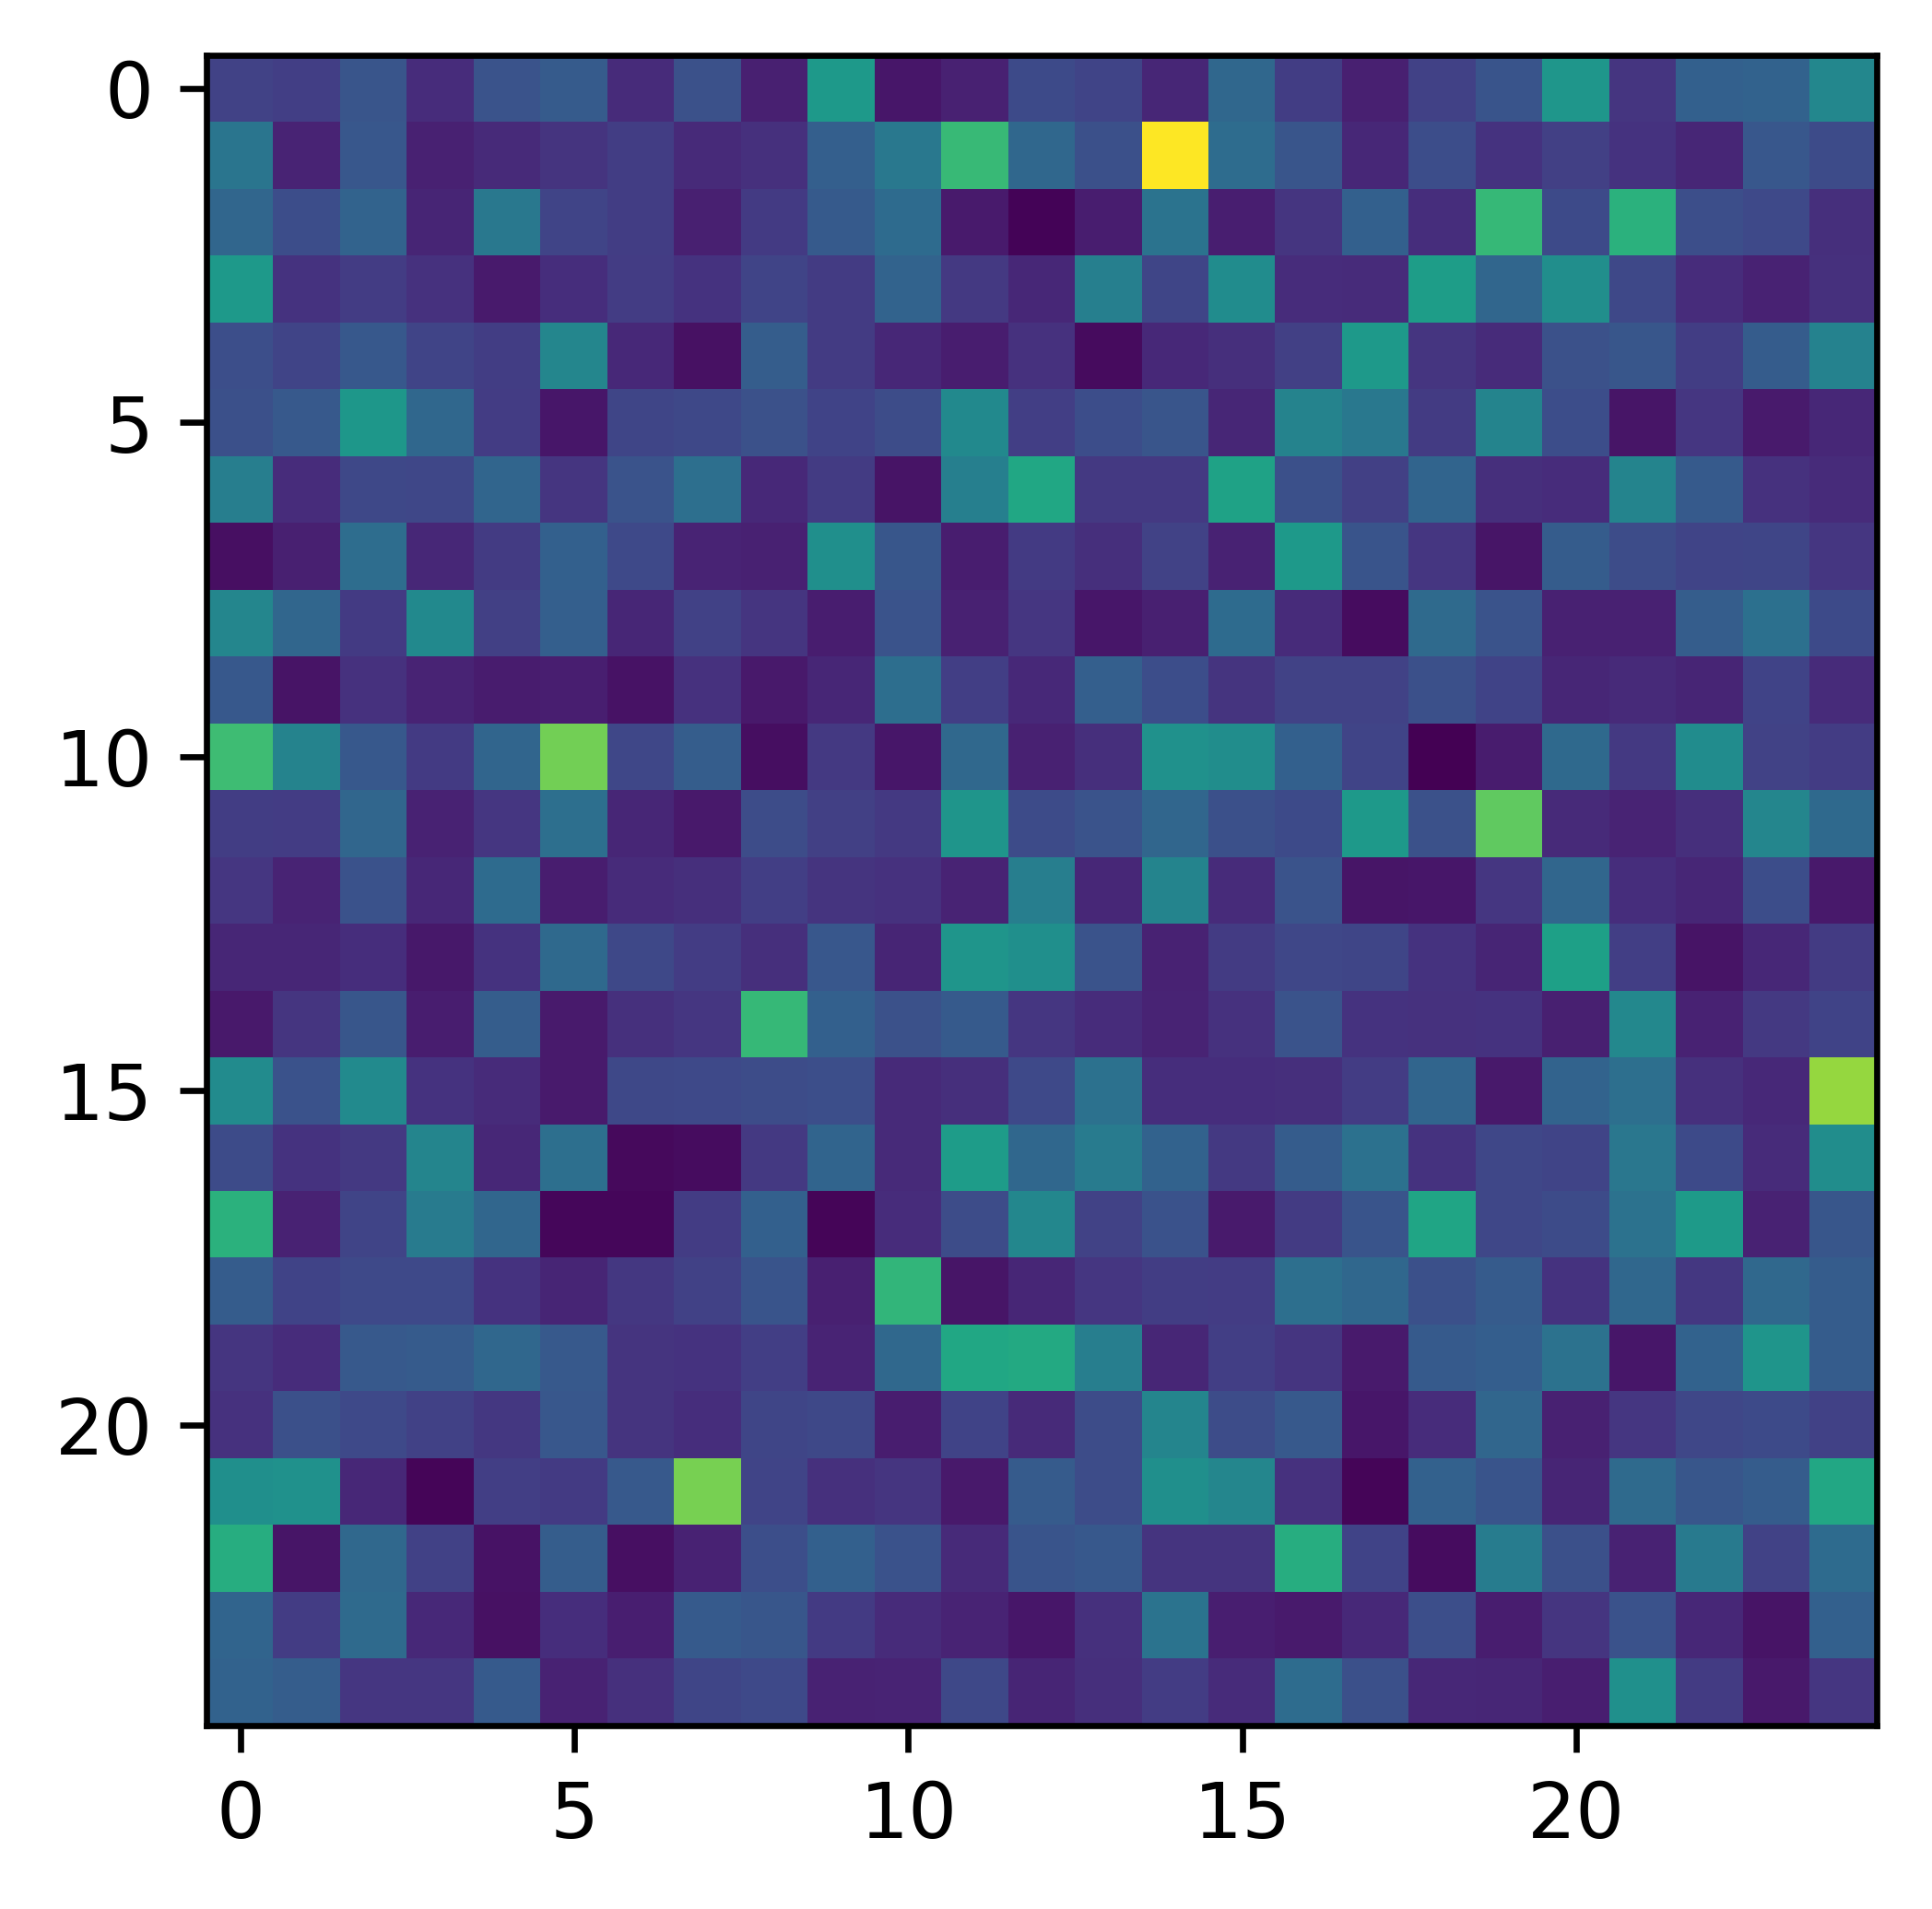

In [61]:
coeffs2 = pywt.dwt2(image,'haar',mode='per')
LL, (LH, HL, HH) = coeffs2
for i, a in enumerate([LL, LH, HL, HH]):
    plt.gcf().set_dpi(600)
    plt.imshow(S(a))  
    detect_pattern(S(a))
    plt.show()

## Second Approach: Extending 1D Shapelet Detection Technique

In [91]:
def dst2_row(image, shapelet):
    rows,cols = image.shape
    aprox_coeff_row, detail_coeff_row = pywt.dwt(image.flatten(), shapelet, mode='per')
    return aprox_coeff_row, detail_coeff_row.reshape((rows,cols//2))

def dst2_col(image, shapelet):
    image = image.transpose()
    rows,cols = image.shape
    aprox_coeff_row, detail_coeff_row = pywt.dwt(image.flatten(), shapelet, mode='per')
    return aprox_coeff_row.transpose(), detail_coeff_row.reshape((rows,cols//2)).transpose()

def dst2(image,shapelet):
    row_shapelet, col_shapelet = shapelet
    return dst2_row(image,row_shapelet), dst2_col(image,col_shapelet)   

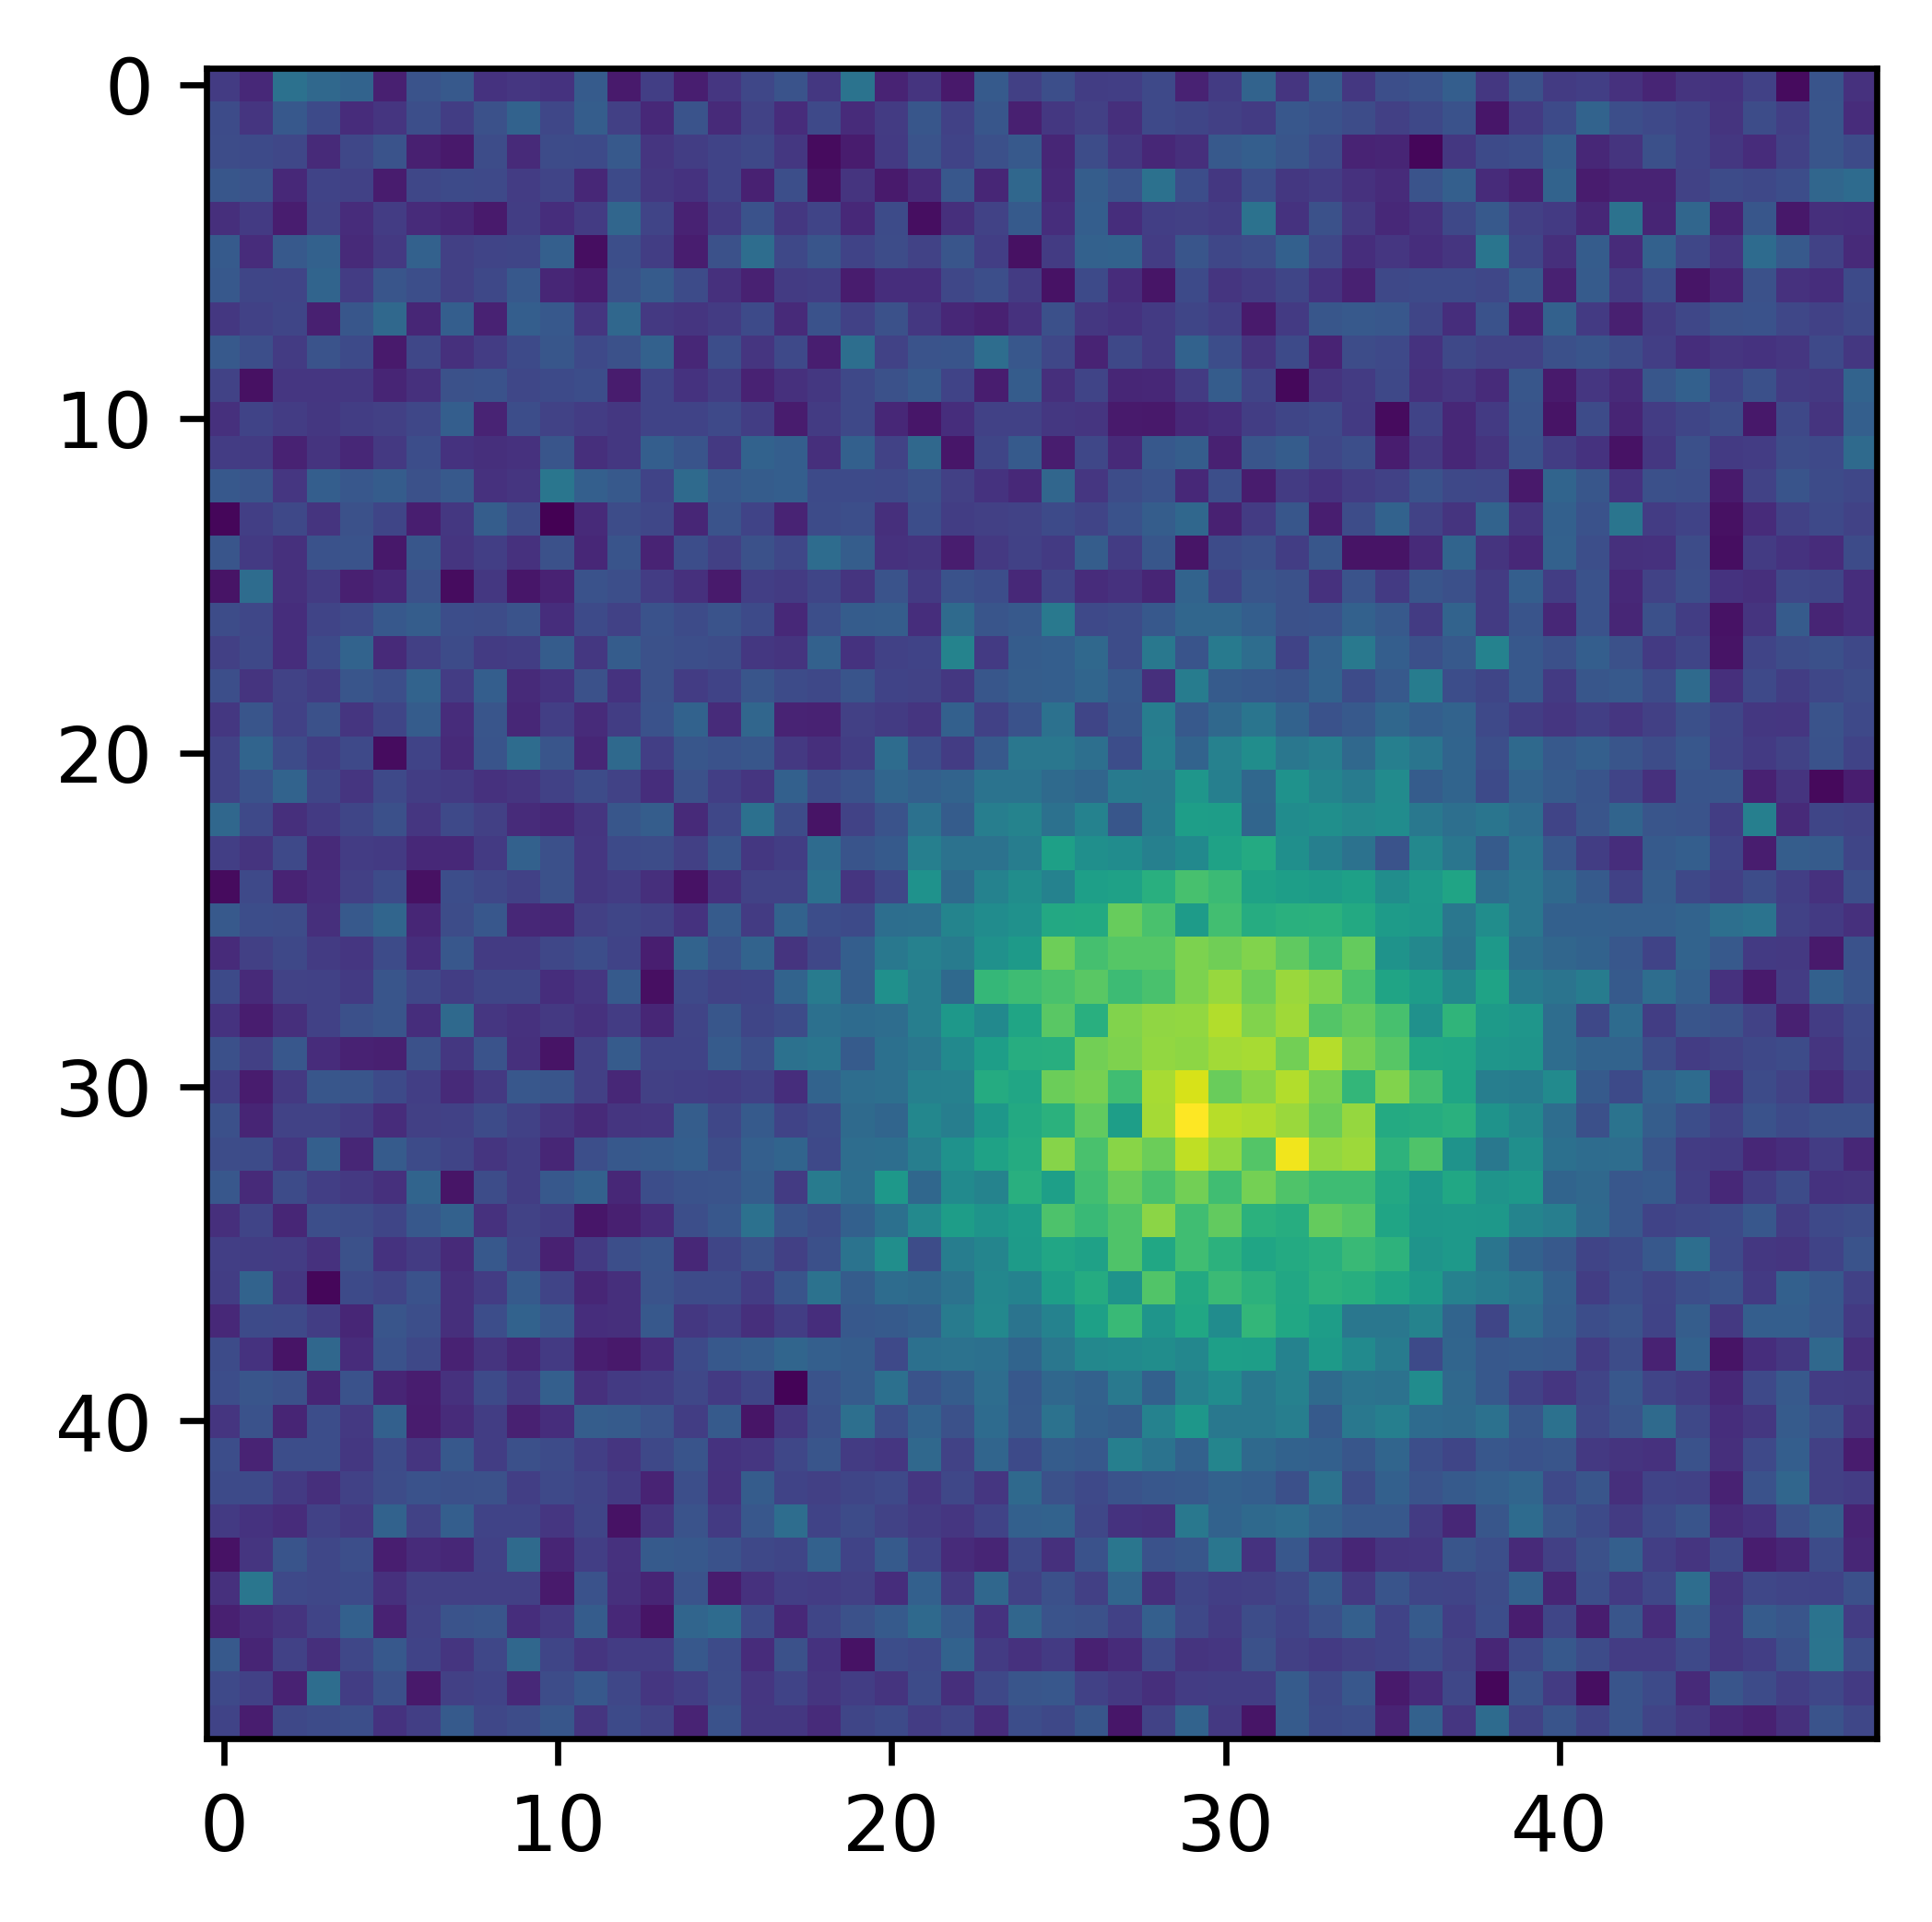

In [92]:
image = noisy_gaussian
plt.gcf().set_dpi(600)
plt.imshow(image)
plt.show()

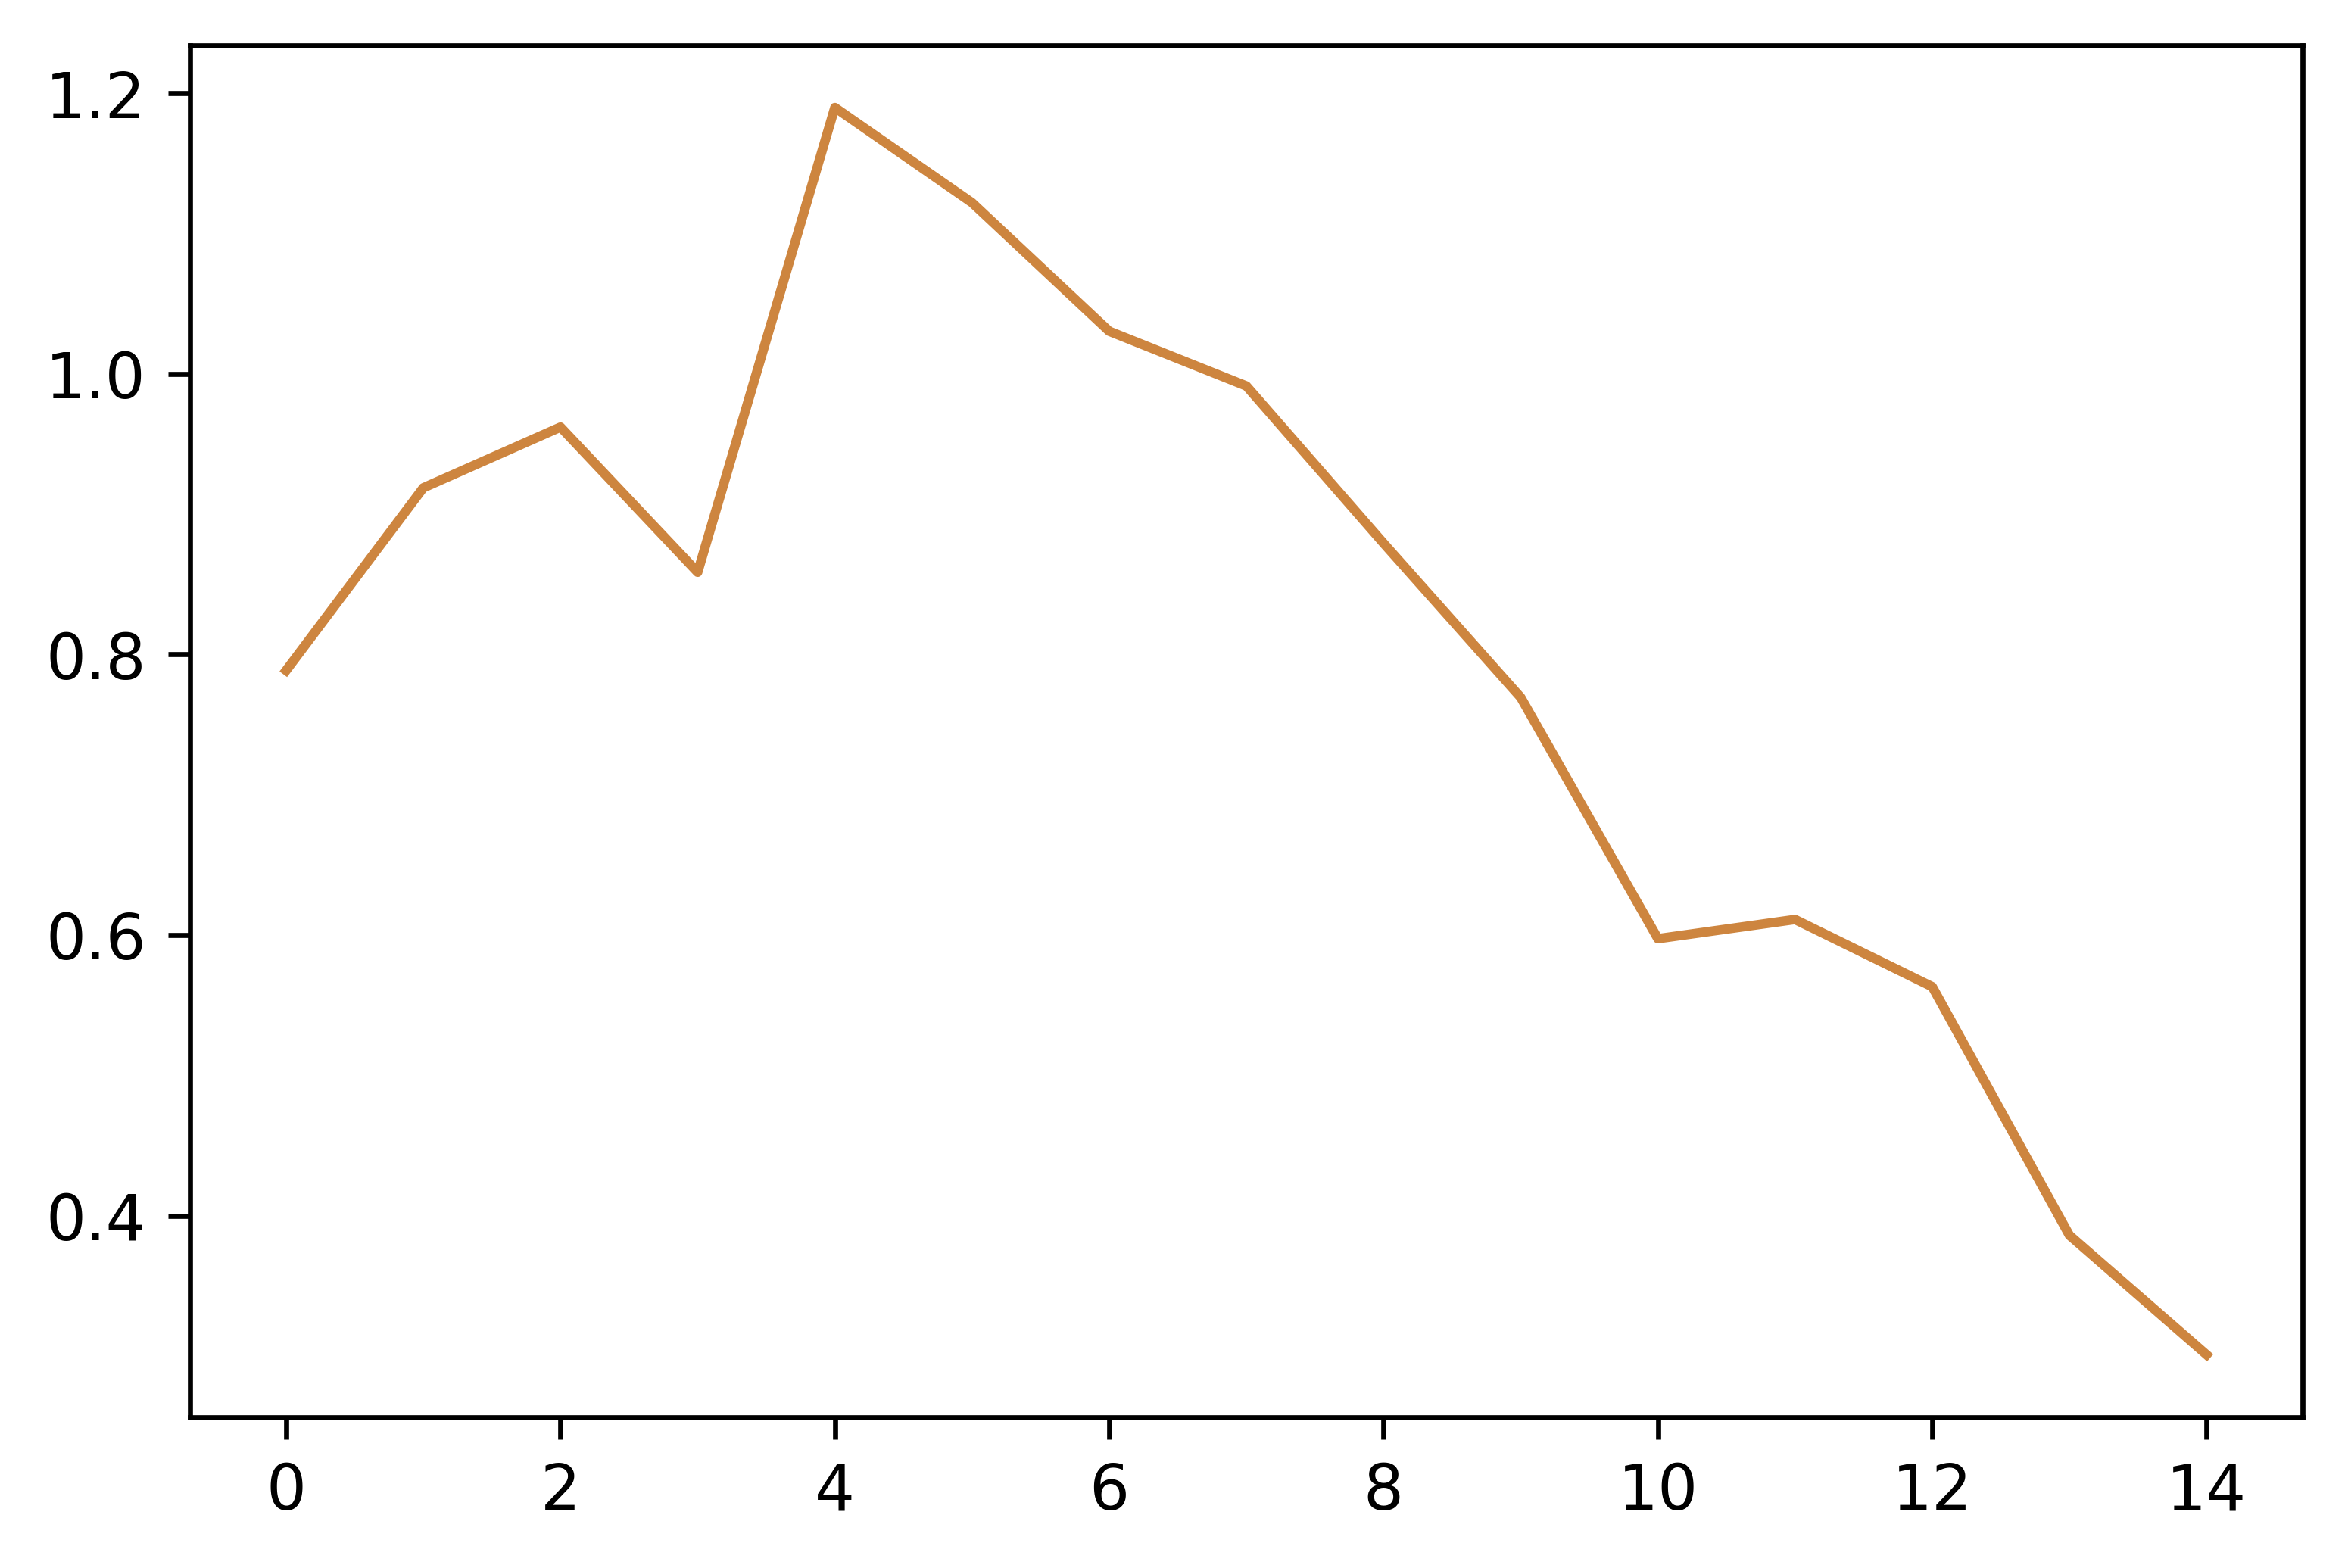

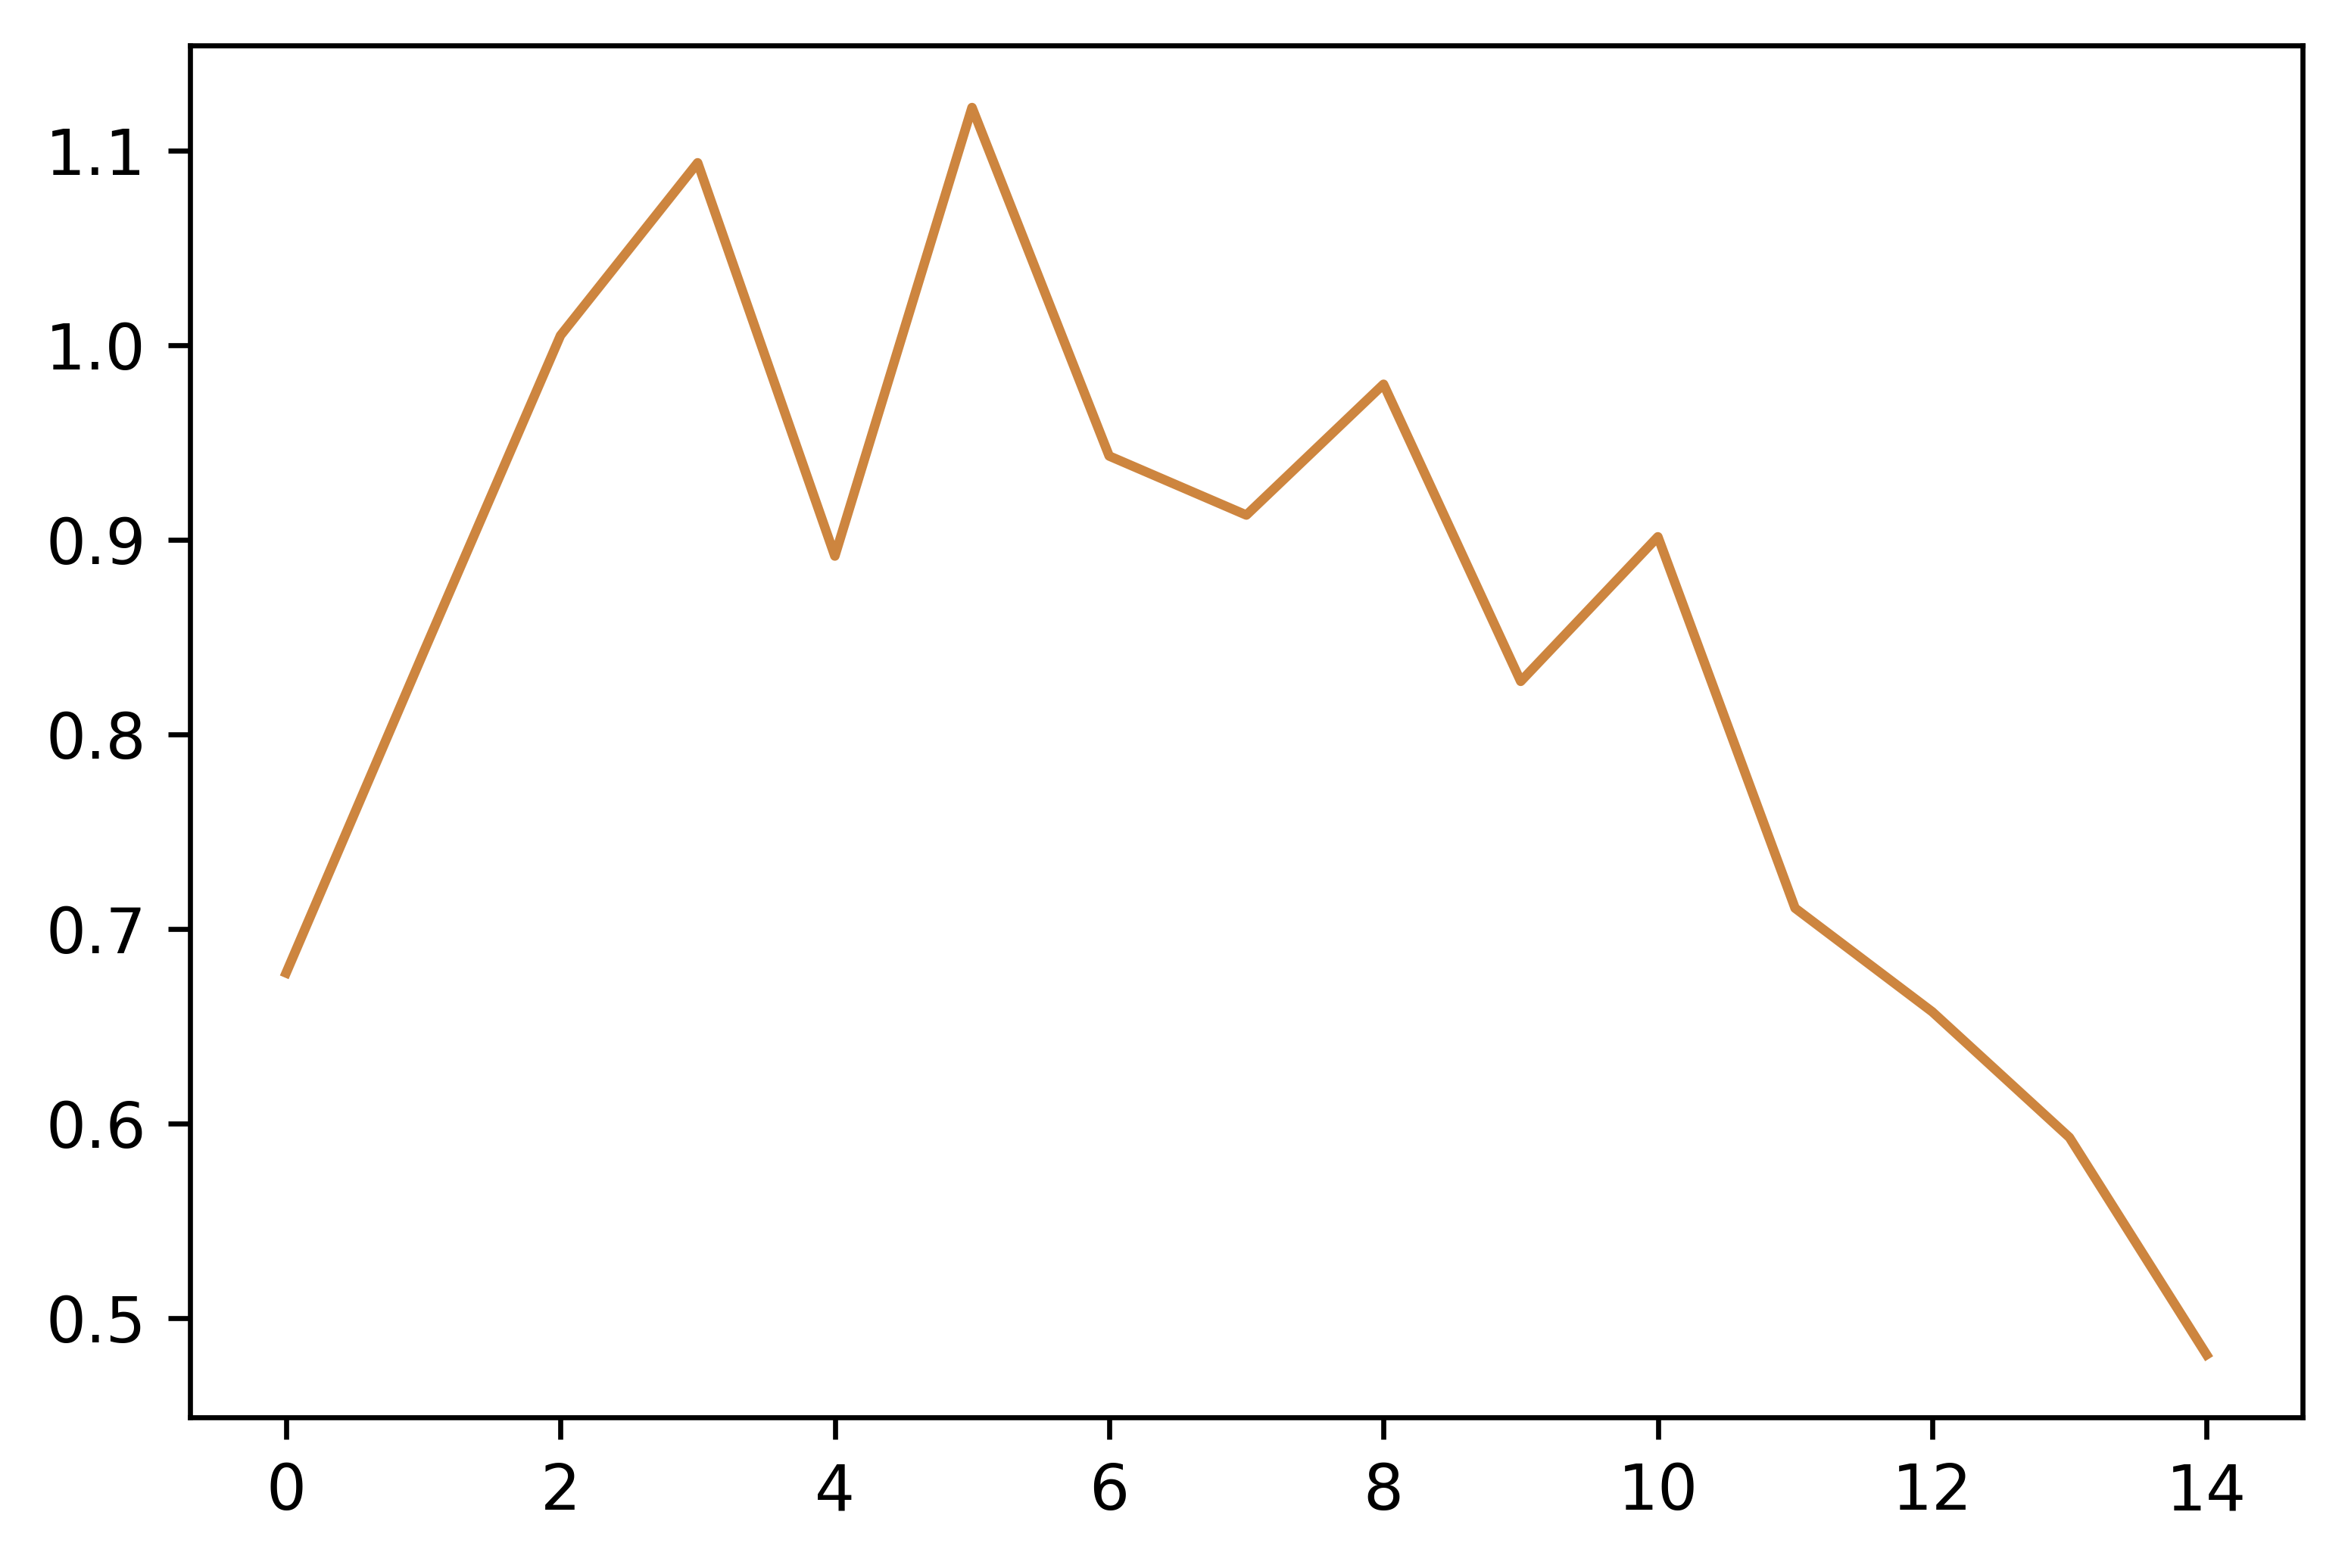

In [64]:
pattern_horizontal = image[30, 25:40].flatten()
pattern_vertical = image[25:40, 30].flatten()
x = [i for i in range(len(pattern_horizontal))]
plt.gcf().set_dpi(600)
plt.plot(x, pattern_horizontal, 'peru')
plt.show()

plt.gcf().set_dpi(600)
plt.plot(x, pattern_vertical, 'peru')
plt.show()

Unitary Energy Equation:
q0**2 + q1**2 + q10**2 + q11**2 + q12**2 + q13**2 + q2**2 + q3**2 + q4**2 + q5**2 + q6**2 + q7**2 + q8**2 + q9**2 - 1
Vanishing Moments Equations:
q1 + q10 + q11 + q12 + q13 + q2 + q3 + q4 + q5 + q6 + q7 + q8 + q9
q1 + 10*q10 + 11*q11 + 12*q12 + 13*q13 + 2*q2 + 3*q3 + 4*q4 + 5*q5 + 6*q6 + 7*q7 + 8*q8 + 9*q9
q1 + 100*q10 + 121*q11 + 144*q12 + 169*q13 + 4*q2 + 9*q3 + 16*q4 + 25*q5 + 36*q6 + 49*q7 + 64*q8 + 81*q9
q1 + 1000*q10 + 1331*q11 + 1728*q12 + 2197*q13 + 8*q2 + 27*q3 + 64*q4 + 125*q5 + 216*q6 + 343*q7 + 512*q8 + 729*q9
q1 + 10000*q10 + 14641*q11 + 20736*q12 + 28561*q13 + 16*q2 + 81*q3 + 256*q4 + 625*q5 + 1296*q6 + 2401*q7 + 4096*q8 + 6561*q9
Orthogonality Equations:
q0*q2 + q1*q3 + q10*q12 + q10*q8 + q11*q13 + q11*q9 + q2*q4 + q3*q5 + q4*q6 + q5*q7 + q6*q8 + q7*q9
q0*q4 + q1*q5 + q10*q6 + q11*q7 + q12*q8 + q13*q9 + q2*q6 + q3*q7 + q4*q8 + q5*q9
q0*q6 + q1*q7 + q10*q4 + q11*q5 + q12*q6 + q13*q7 + q2*q8 + q3*q9
q0*q8 + q1*q9 + q10*q2 + q11*q3 + q12*q4 + q13*q

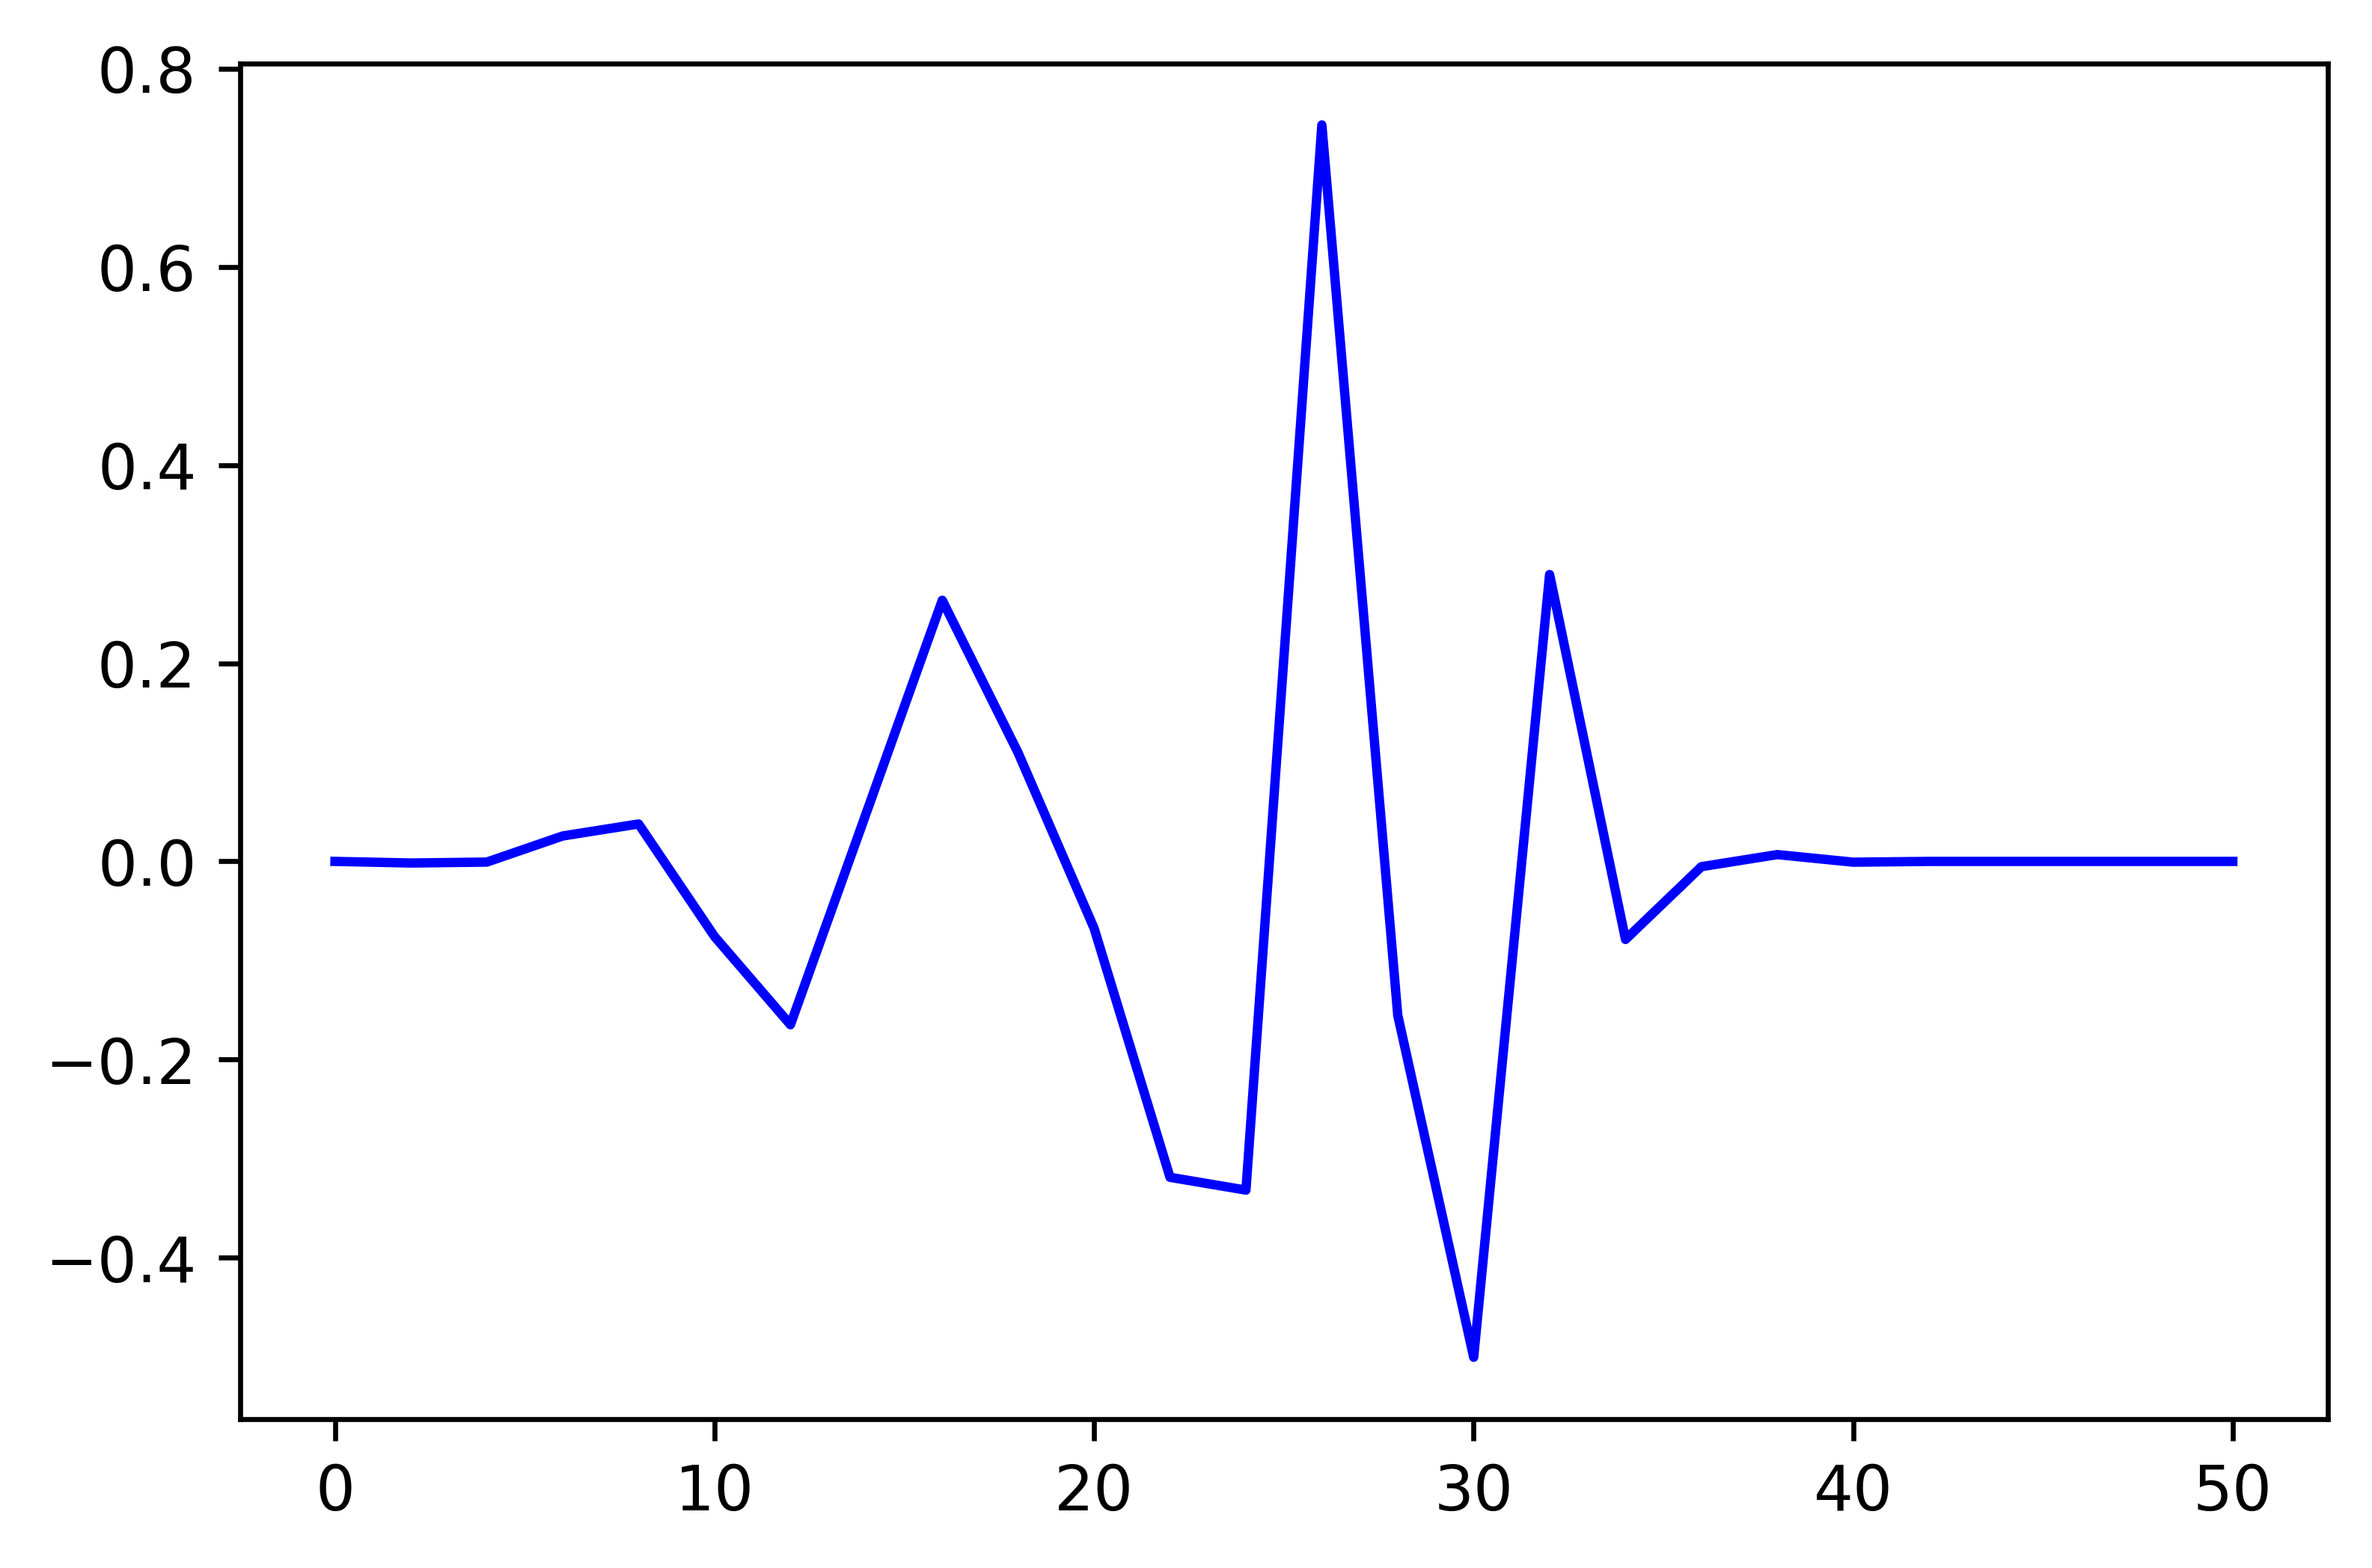

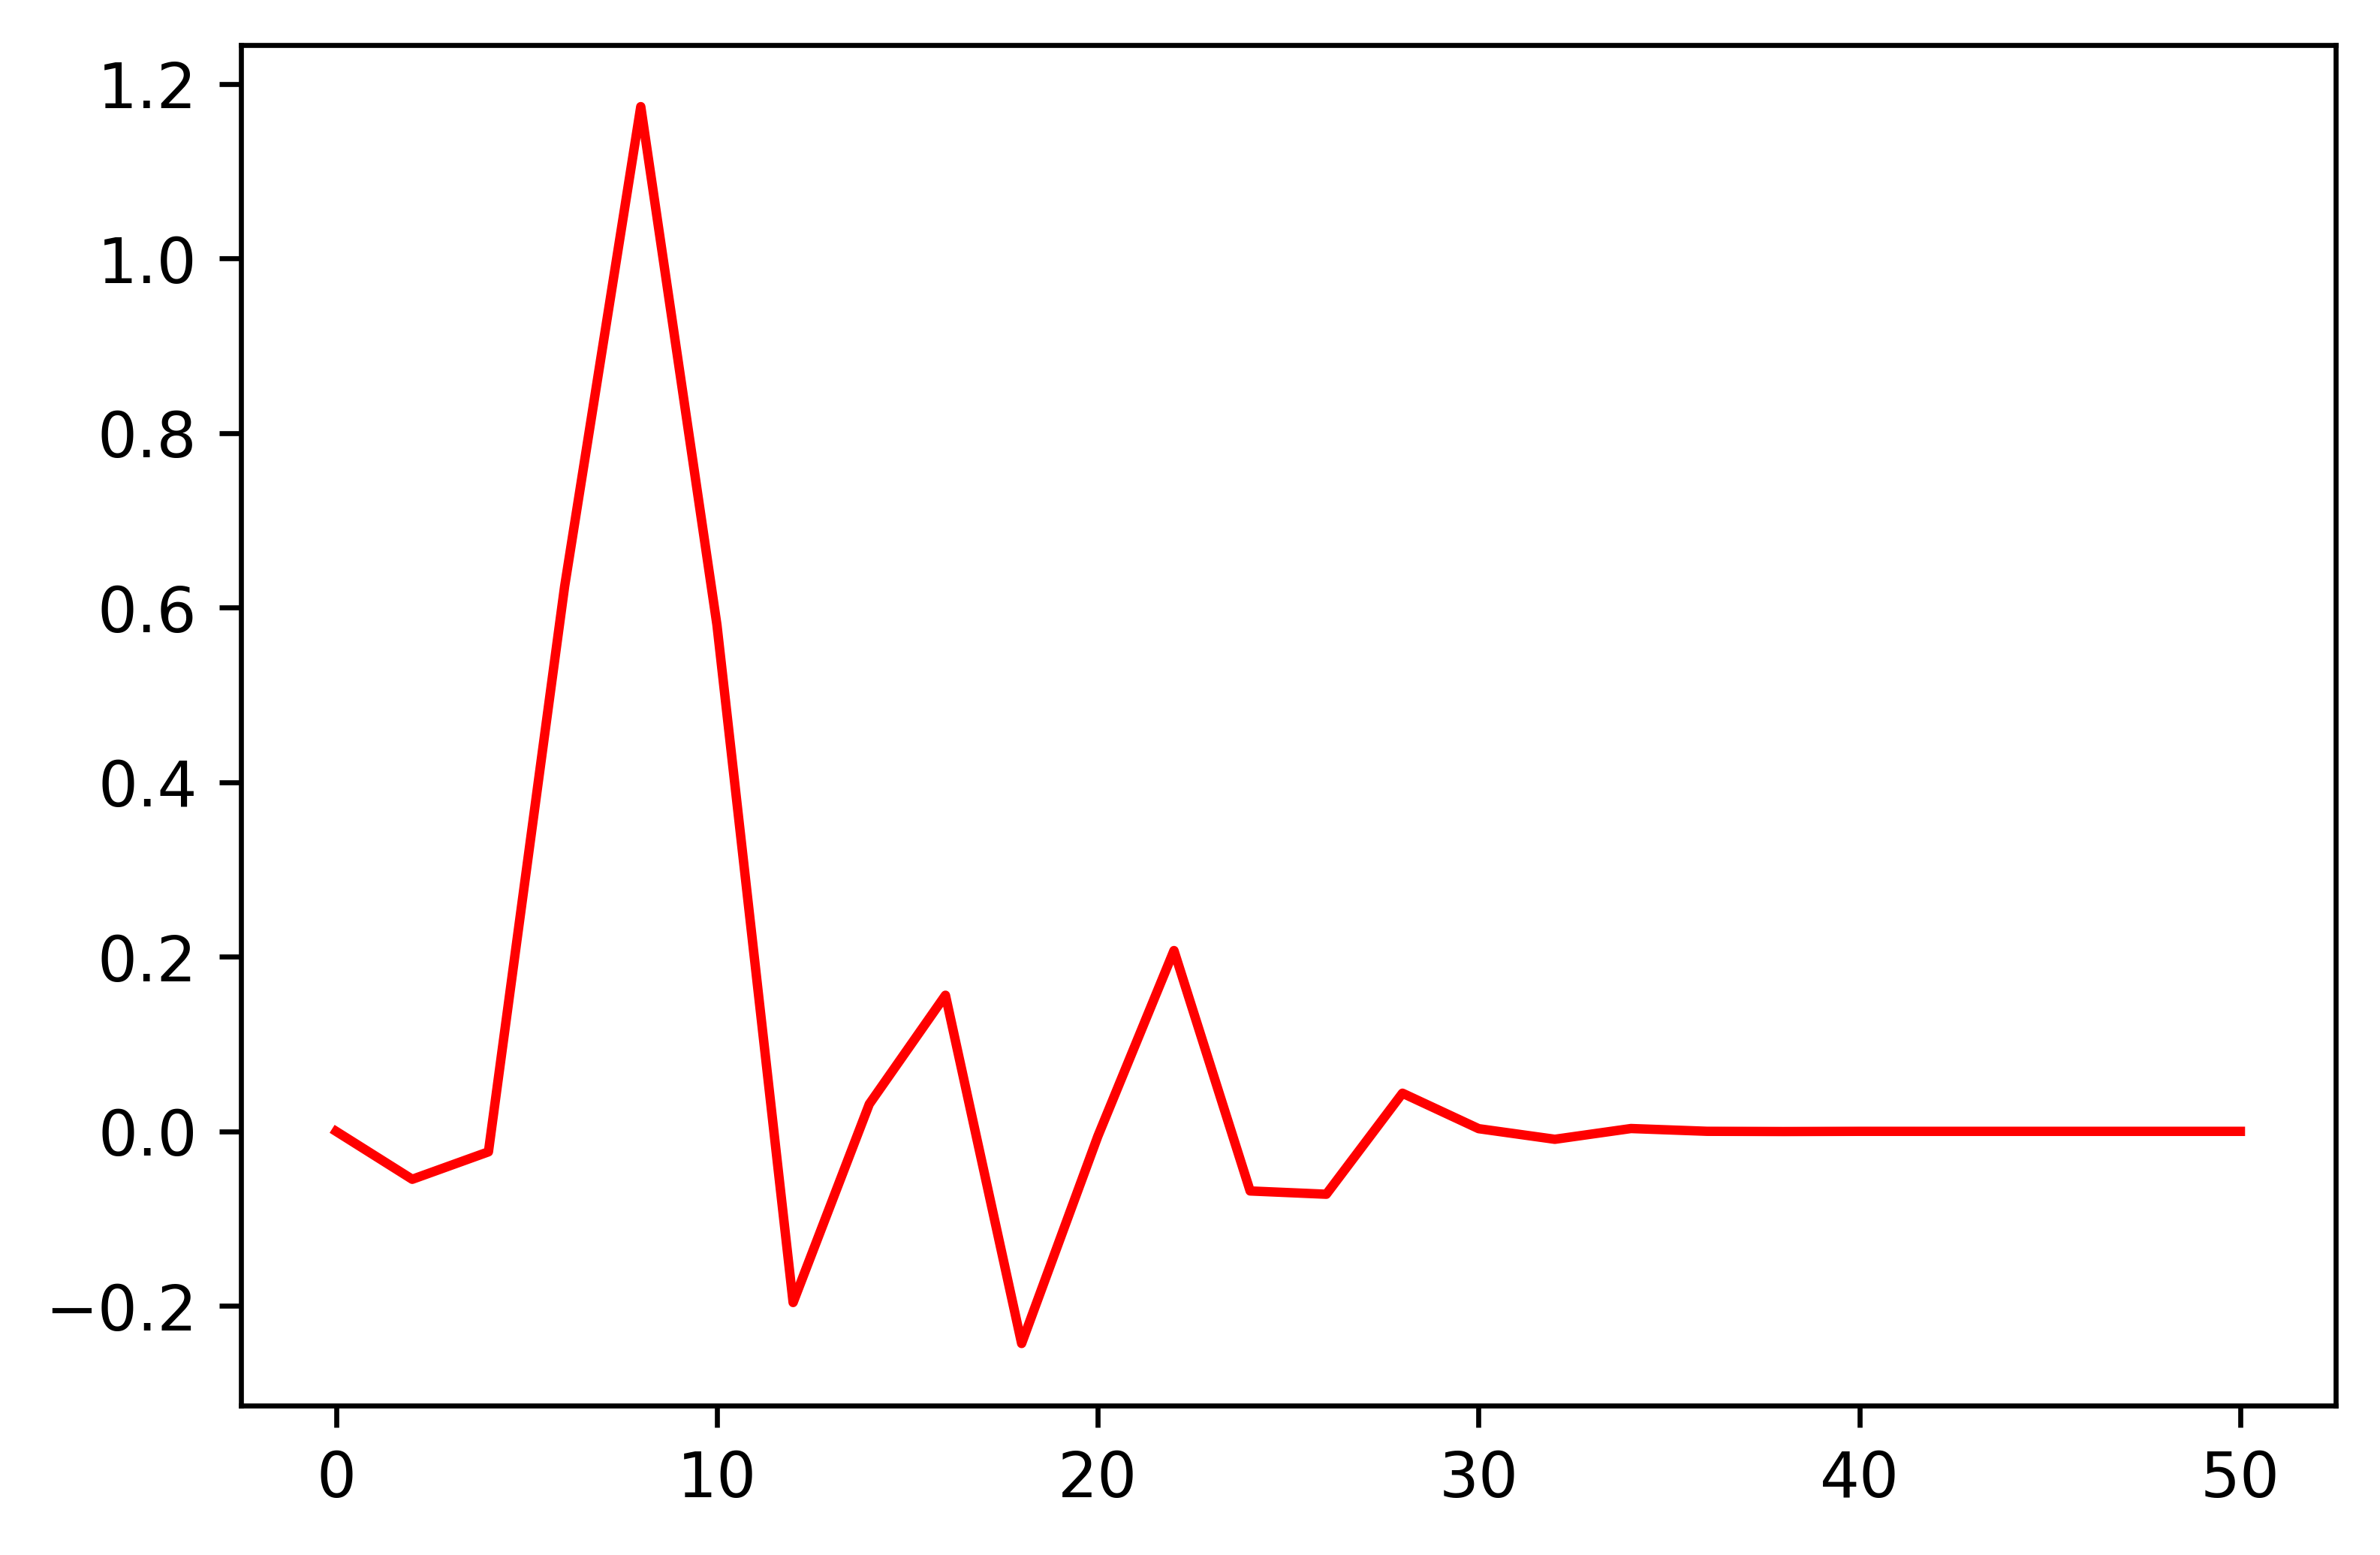

Unitary Energy Equation:
q0**2 + q1**2 + q10**2 + q11**2 + q12**2 + q13**2 + q2**2 + q3**2 + q4**2 + q5**2 + q6**2 + q7**2 + q8**2 + q9**2 - 1
Vanishing Moments Equations:
q1 + q10 + q11 + q12 + q13 + q2 + q3 + q4 + q5 + q6 + q7 + q8 + q9
q1 + 10*q10 + 11*q11 + 12*q12 + 13*q13 + 2*q2 + 3*q3 + 4*q4 + 5*q5 + 6*q6 + 7*q7 + 8*q8 + 9*q9
q1 + 100*q10 + 121*q11 + 144*q12 + 169*q13 + 4*q2 + 9*q3 + 16*q4 + 25*q5 + 36*q6 + 49*q7 + 64*q8 + 81*q9
q1 + 1000*q10 + 1331*q11 + 1728*q12 + 2197*q13 + 8*q2 + 27*q3 + 64*q4 + 125*q5 + 216*q6 + 343*q7 + 512*q8 + 729*q9
q1 + 10000*q10 + 14641*q11 + 20736*q12 + 28561*q13 + 16*q2 + 81*q3 + 256*q4 + 625*q5 + 1296*q6 + 2401*q7 + 4096*q8 + 6561*q9
Orthogonality Equations:
q0*q2 + q1*q3 + q10*q12 + q10*q8 + q11*q13 + q11*q9 + q2*q4 + q3*q5 + q4*q6 + q5*q7 + q6*q8 + q7*q9
q0*q4 + q1*q5 + q10*q6 + q11*q7 + q12*q8 + q13*q9 + q2*q6 + q3*q7 + q4*q8 + q5*q9
q0*q6 + q1*q7 + q10*q4 + q11*q5 + q12*q6 + q13*q7 + q2*q8 + q3*q9
q0*q8 + q1*q9 + q10*q2 + q11*q3 + q12*q4 + q13*q

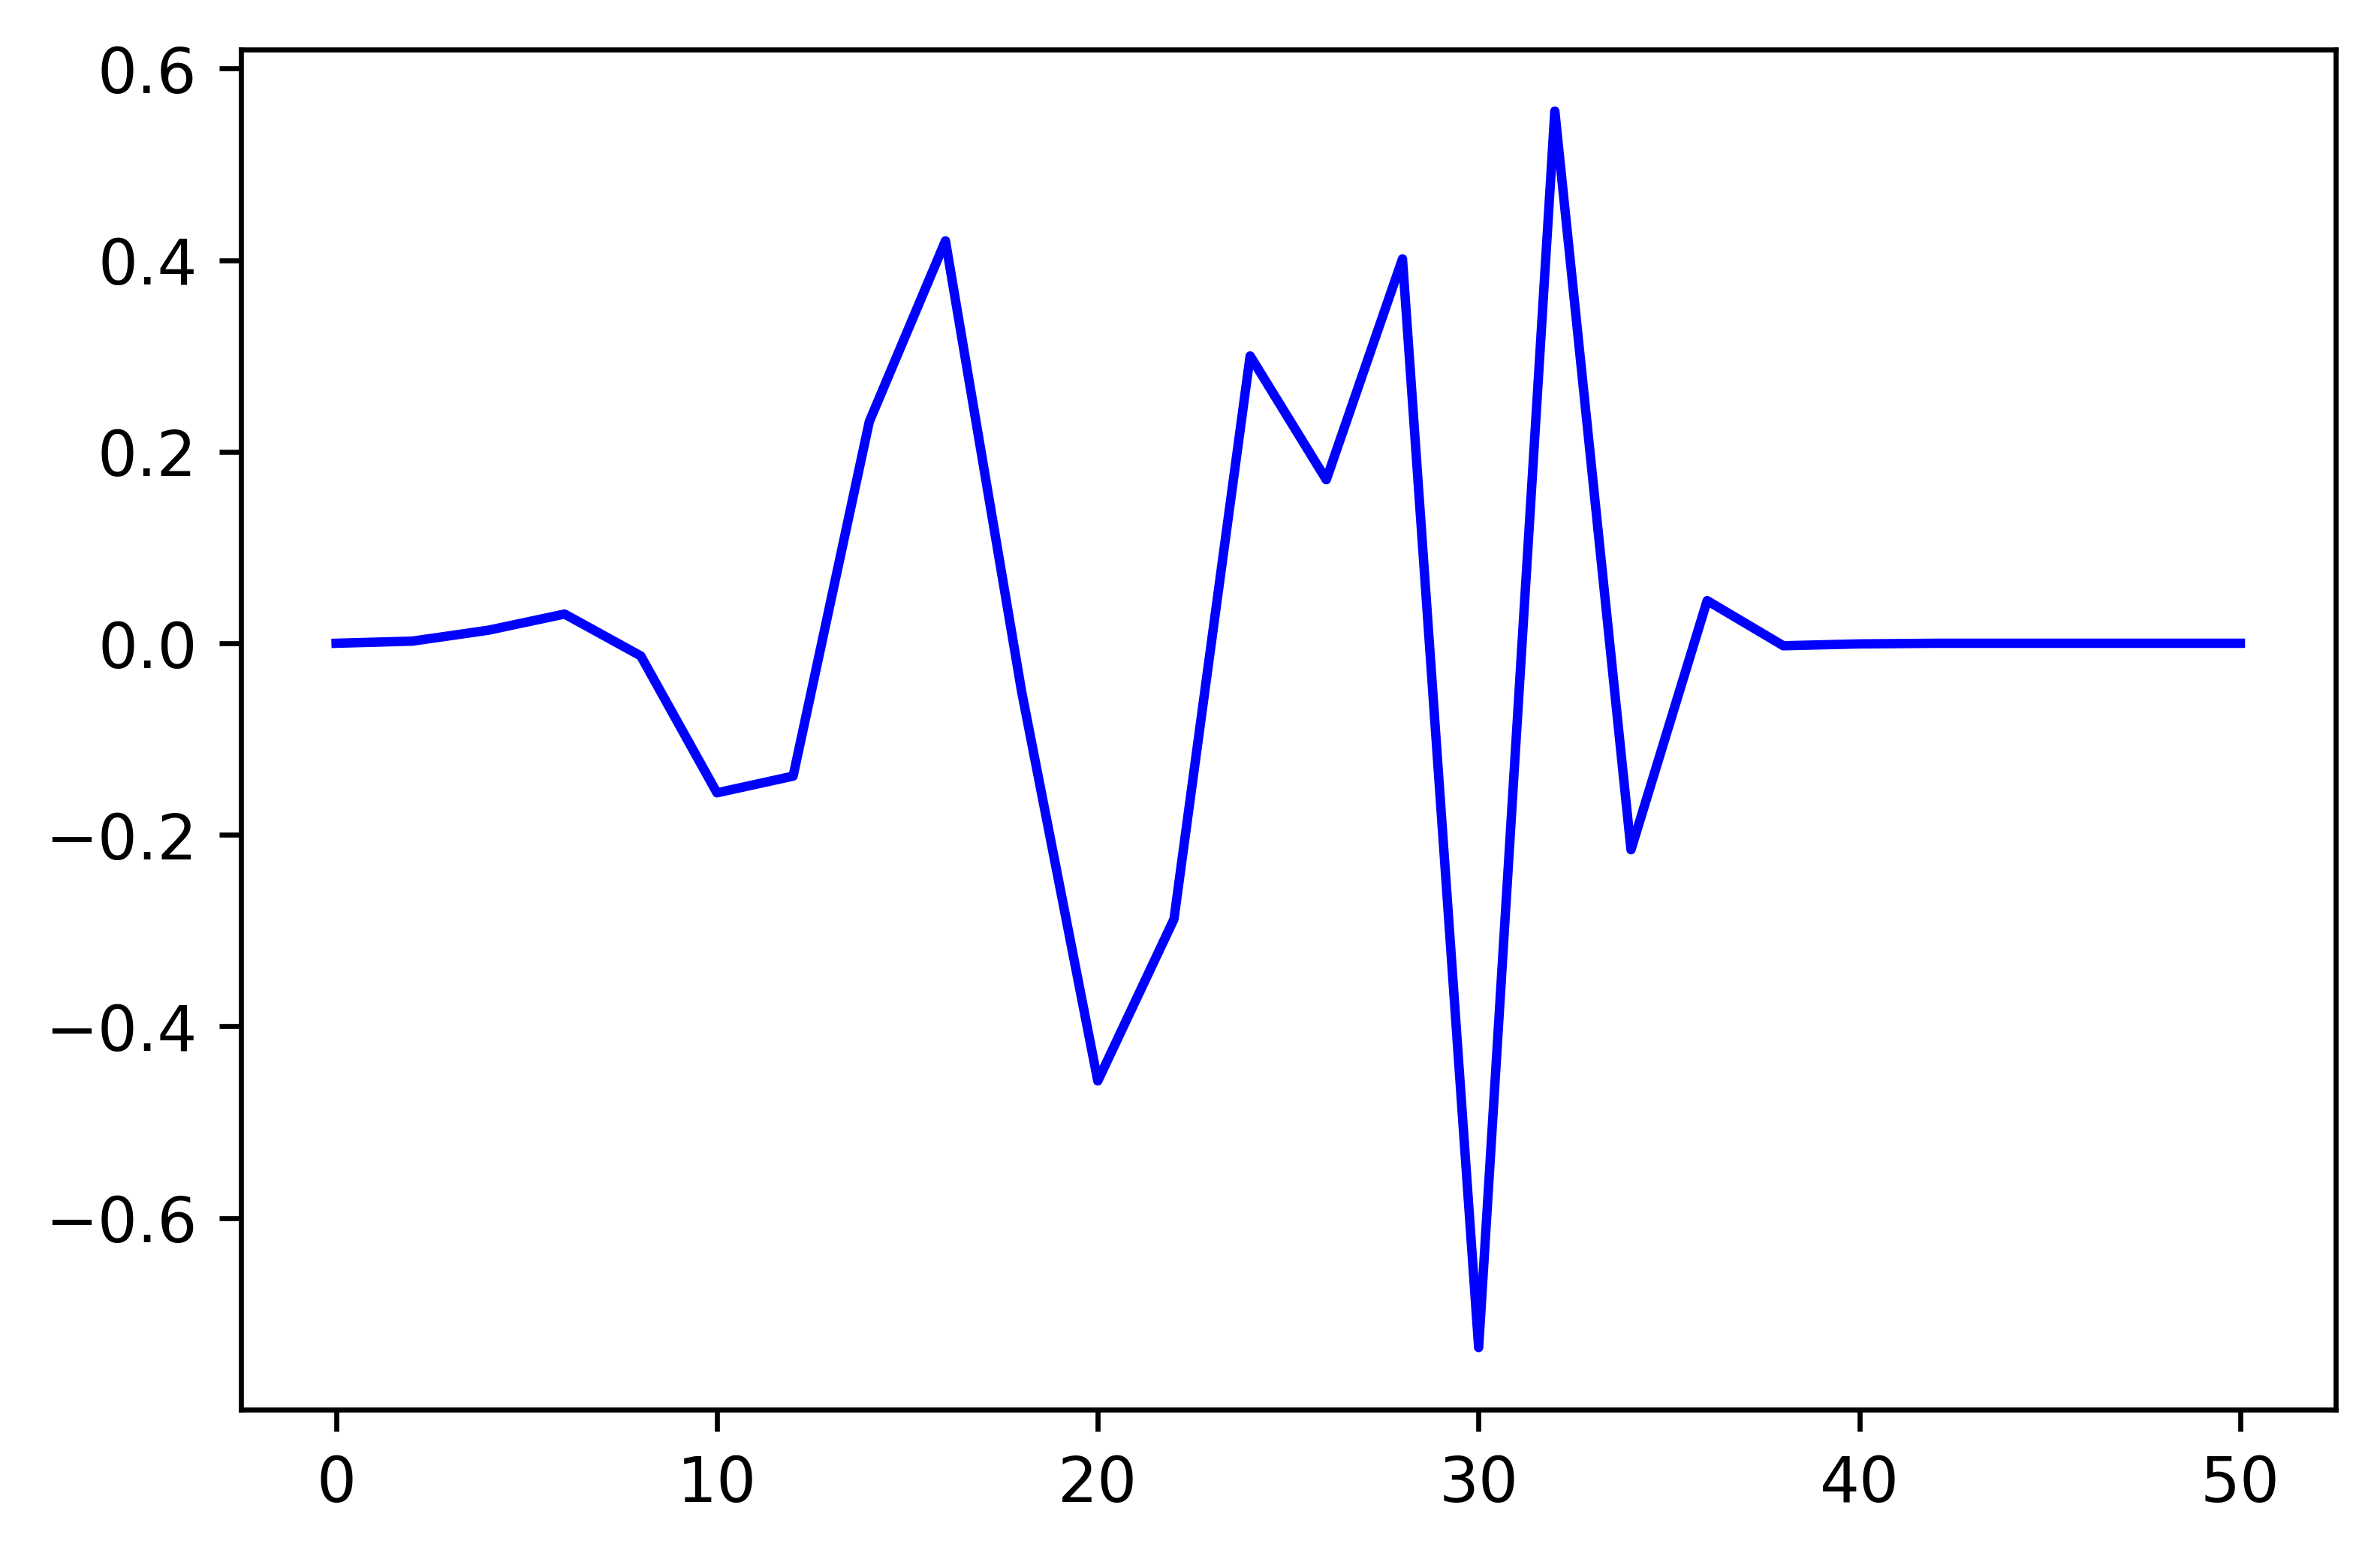

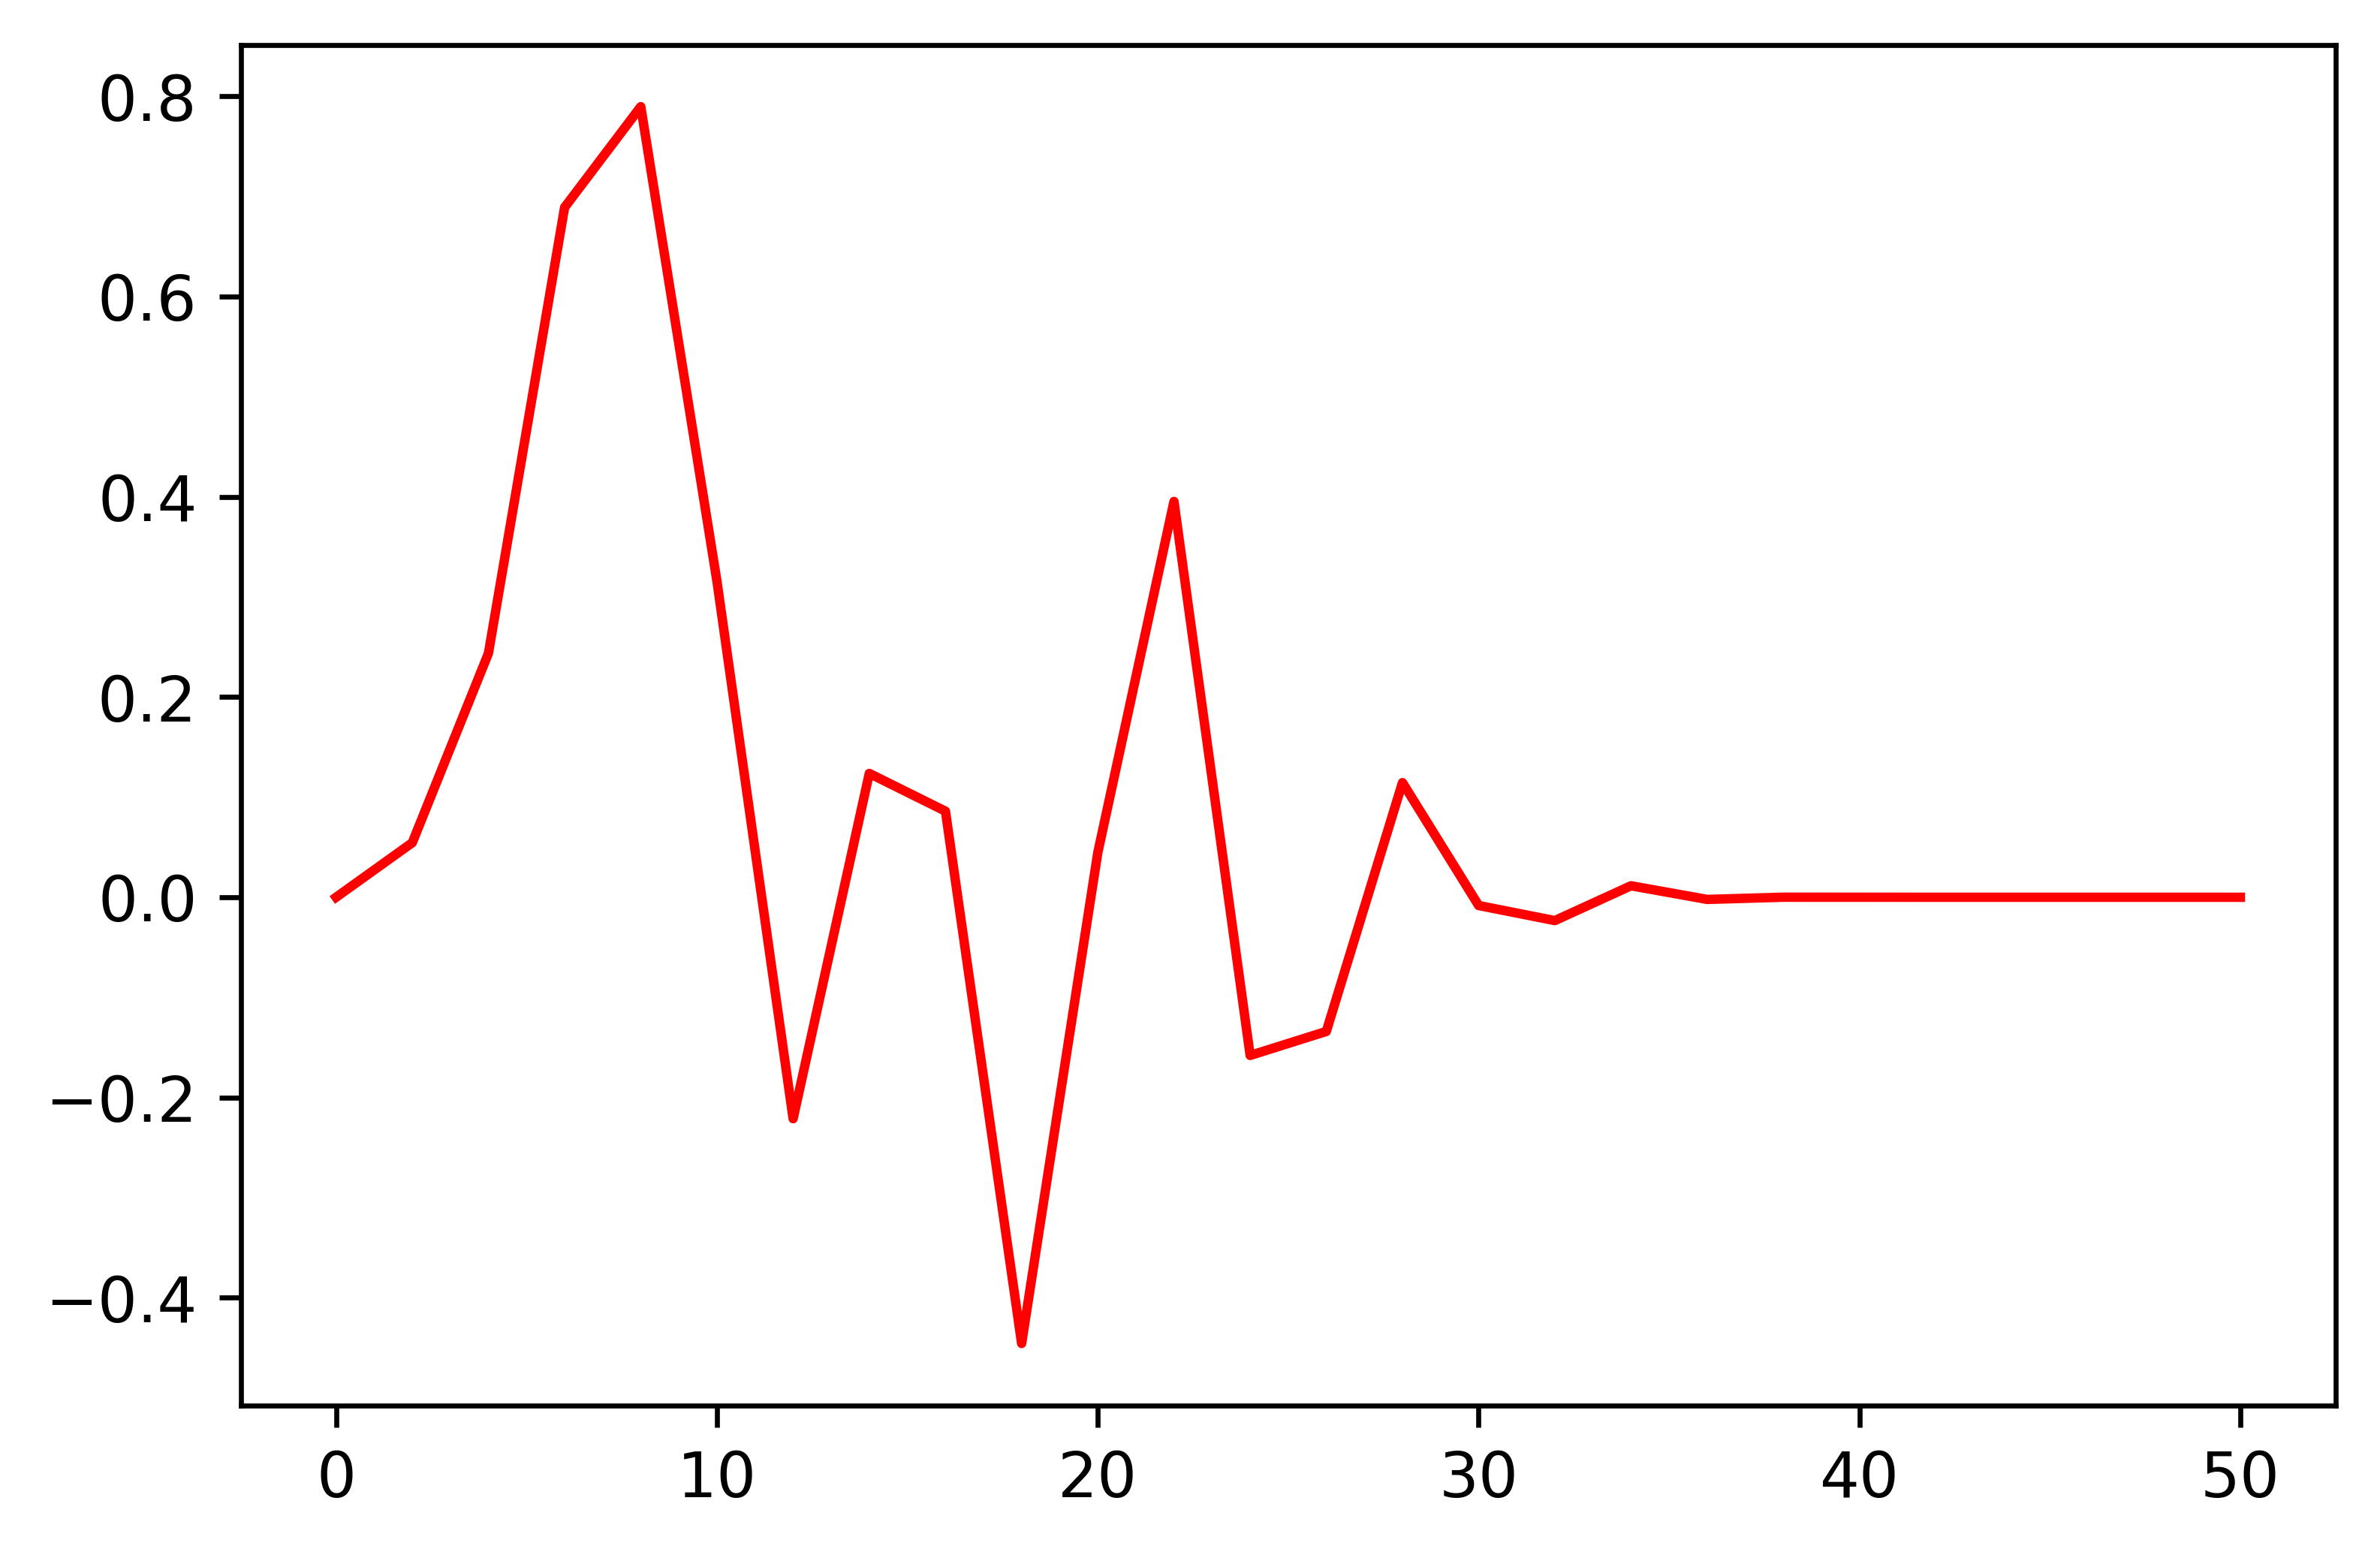

In [65]:
shapelet_horizontal = build_shapelet(pattern_horizontal, verbose=True)
shapelet_vertical = build_shapelet(pattern_vertical, verbose=True)

Detection at position (3, 9) with value 0.6327706740060982
Detection at position (4, 2) with value 0.6106894996833411
Detection at position (6, 15) with value 0.630076595451759
Detection at position (17, 3) with value 0.612542666439271
Detection at position (17, 10) with value 0.6361554335871883
Detection at position (20, 23) with value 0.6108316865238238
Detection at position (26, 18) with value 0.6415156619326701
Detection at position (27, 11) with value 0.6035129155017762
Detection at position (30, 16) with value 0.9797916324922307
Detection at position (33, 8) with value 0.6016367313383126
Detection at position (39, 17) with value 0.6768967094494968
Detection at position (43, 21) with value 0.6325320579953572
Detection at position (49, 15) with value 0.6208050572761711


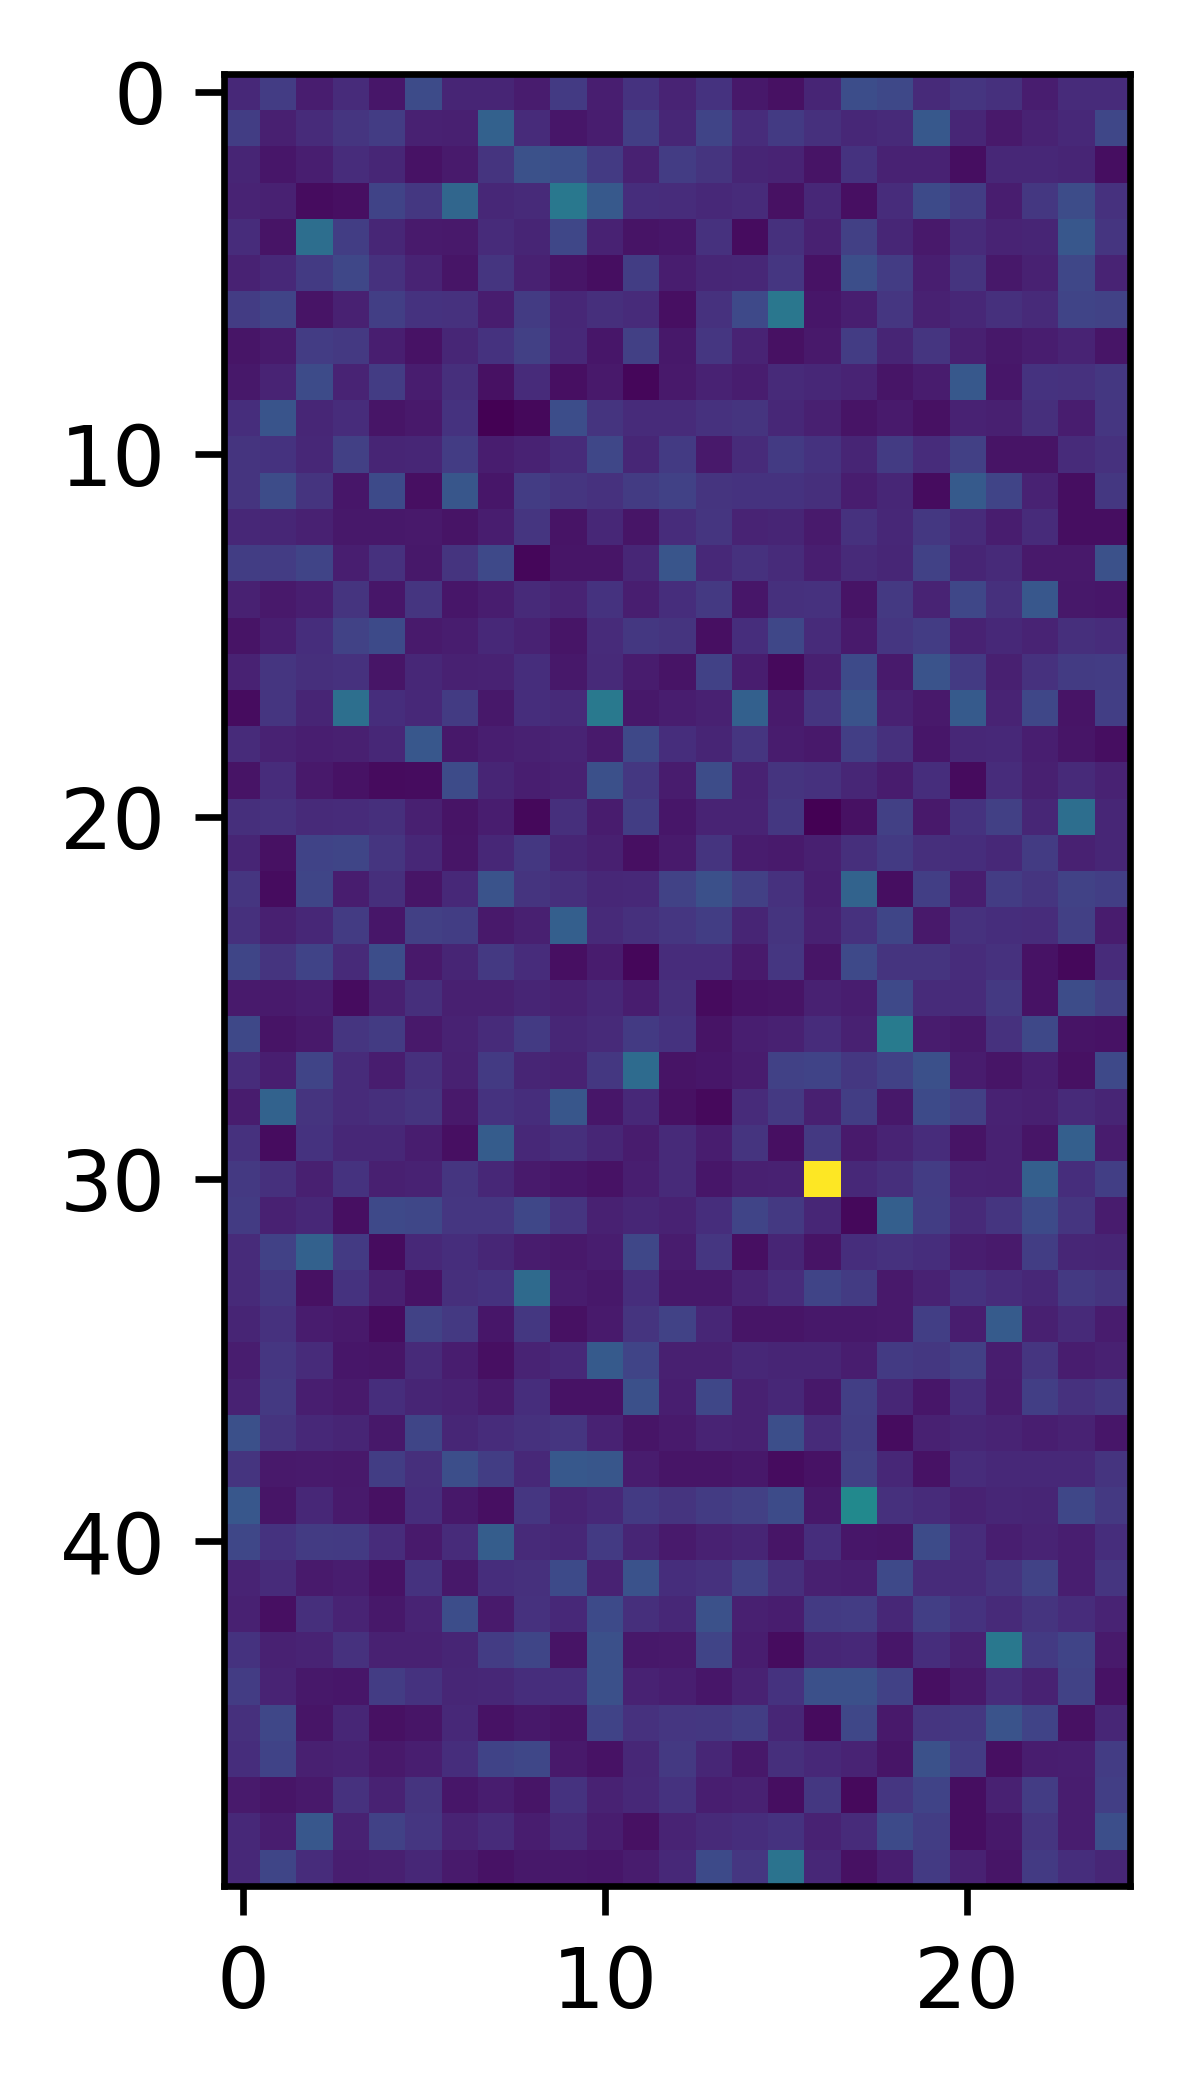

Detection at position (1, 0) with value 0.6131045164683222
Detection at position (2, 5) with value 0.6177232762068
Detection at position (2, 14) with value 0.6442156528623385
Detection at position (4, 48) with value 0.6072770769155206
Detection at position (5, 44) with value 0.6472000955121753
Detection at position (6, 39) with value 0.619190902758069
Detection at position (6, 46) with value 0.6572363455783935
Detection at position (10, 26) with value 0.6248772528272861
Detection at position (12, 37) with value 0.6503406845705875
Detection at position (13, 37) with value 0.6167830632815204
Detection at position (13, 48) with value 0.6587543925543115
Detection at position (14, 39) with value 0.6054221637712099
Detection at position (18, 34) with value 0.6046086408250627
Detection at position (22, 8) with value 0.602515798018352
Detection at position (24, 40) with value 0.6200240805235694


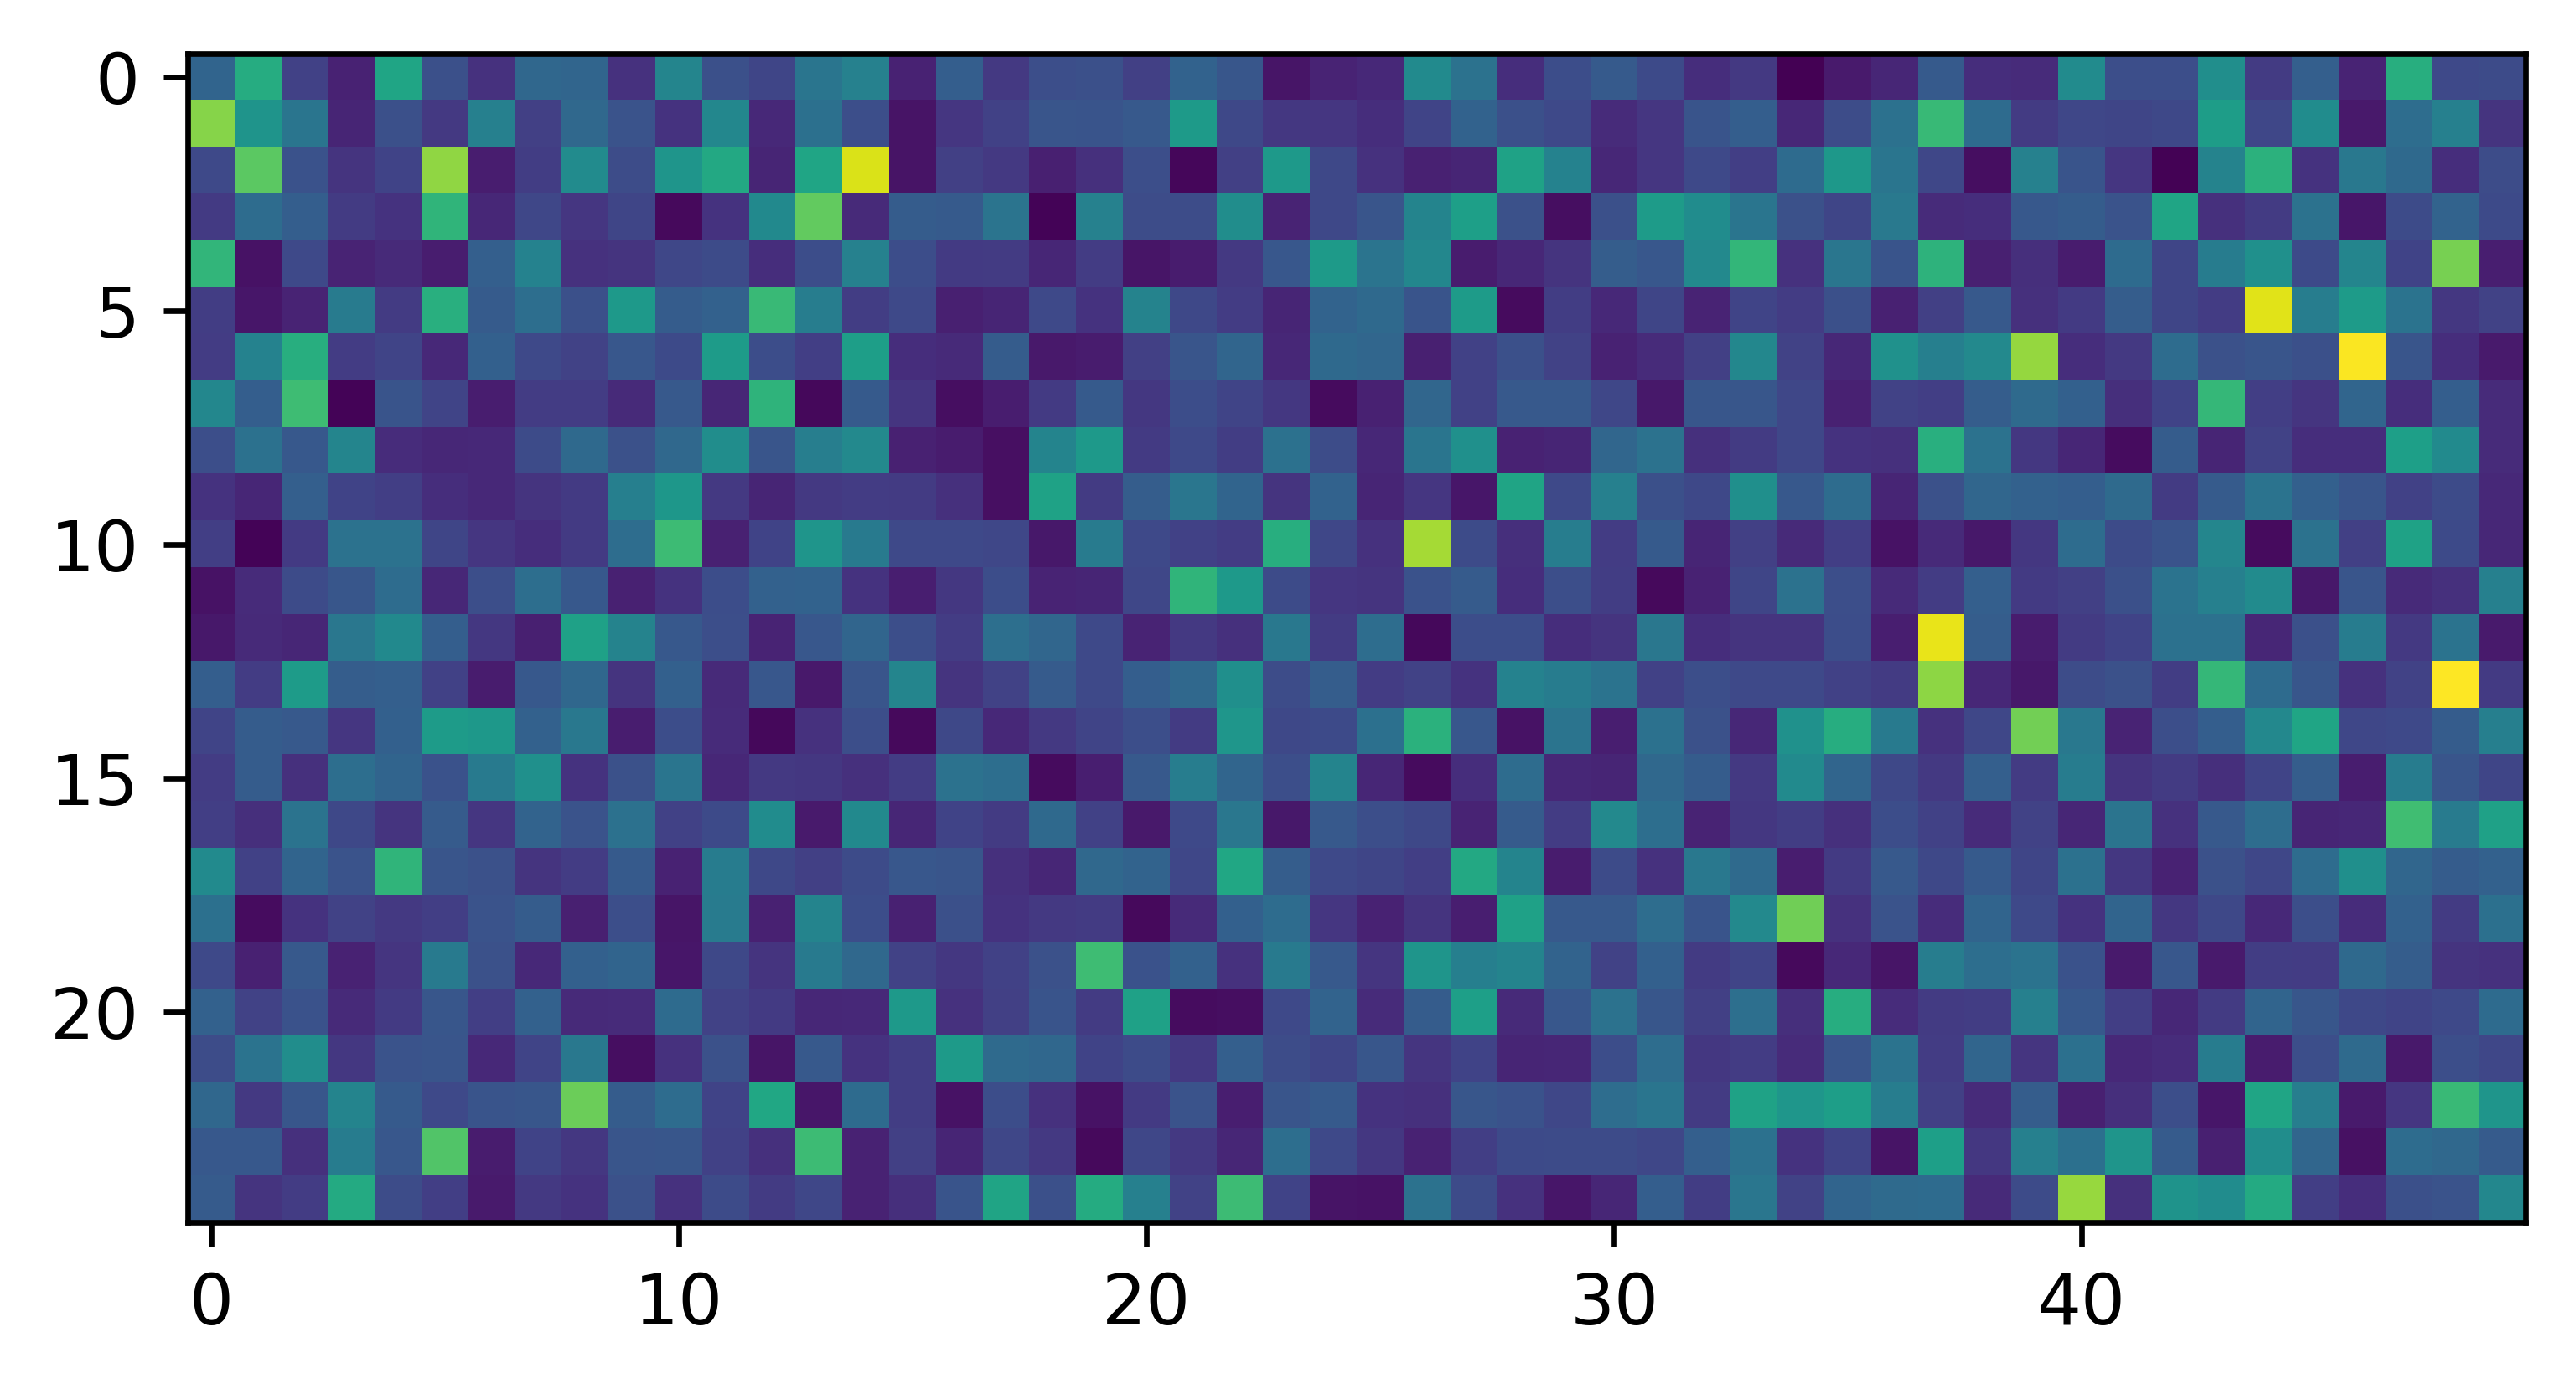

In [66]:
((_,row_details),(_,col_details))= dst2(image,(shapelet_horizontal,shapelet_vertical))
plt.gcf().set_dpi(600)
detect_pattern(S(row_details))
plt.imshow(S(row_details))
plt.show()
plt.gcf().set_dpi(600)
detect_pattern(S(col_details))
plt.imshow(S(col_details))
plt.show()

Detection at position (20, 0) with value 0.6191271290928688
Detection at position (23, 23) with value 0.607231562851828
Detection at position (31, 21) with value 0.6098346226168391
Detection at position (32, 0) with value 0.6074573000099189
Detection at position (40, 16) with value 0.6036315542046892
Detection at position (41, 15) with value 0.6358054820455545
Detection at position (42, 22) with value 0.6034333766060888
Detection at position (44, 12) with value 0.6222430977239669
Detection at position (44, 18) with value 0.620208304568042


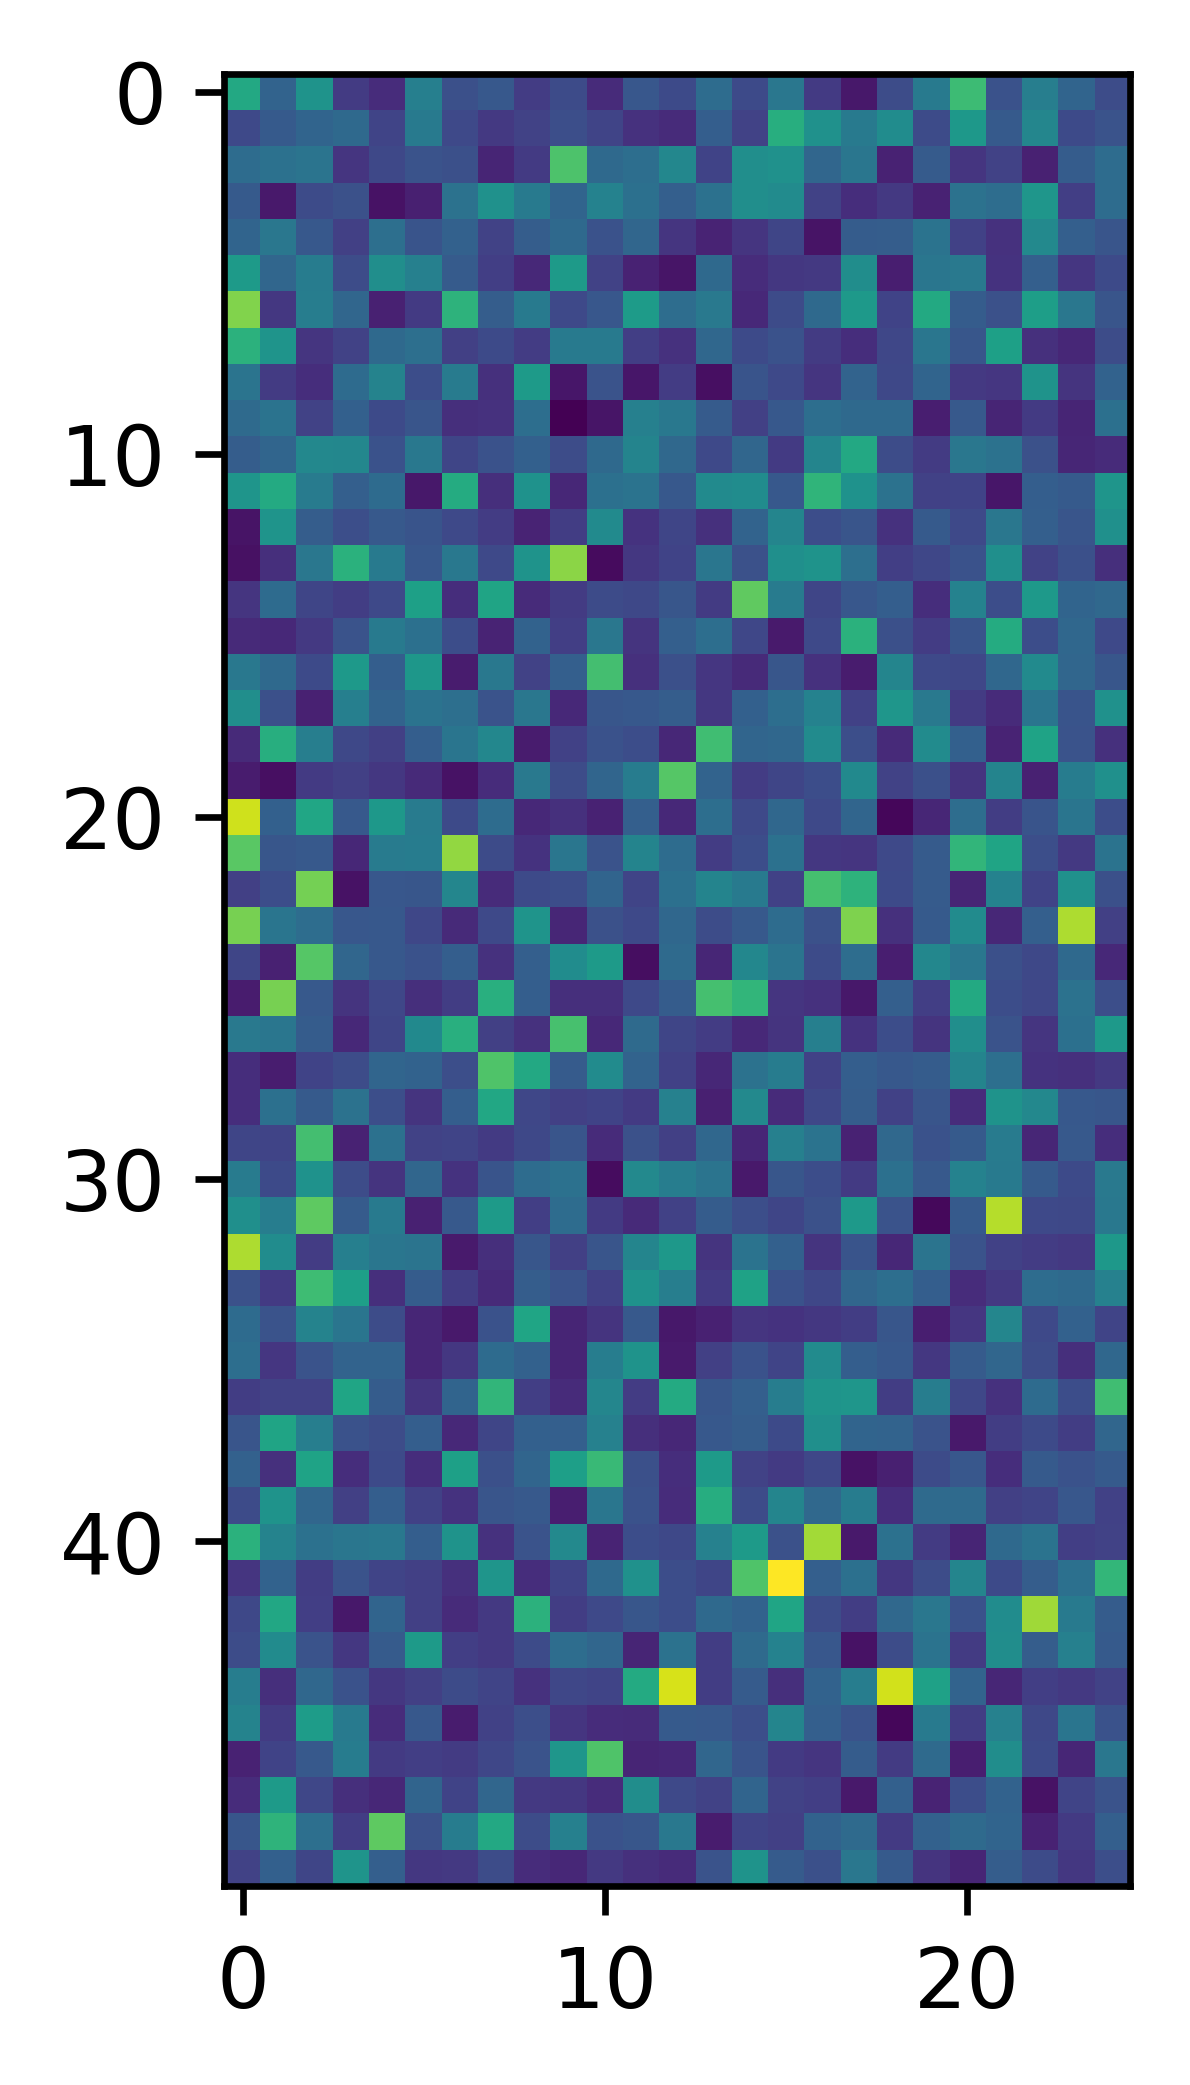

Detection at position (0, 4) with value 0.6029552088529222
Detection at position (0, 41) with value 0.639174973756208
Detection at position (2, 5) with value 0.6124521272343986
Detection at position (3, 11) with value 0.6070425224831708
Detection at position (5, 24) with value 0.6337102922523571
Detection at position (5, 32) with value 0.657102019133766
Detection at position (5, 36) with value 0.6163136760912322
Detection at position (6, 16) with value 0.6519675324829062
Detection at position (6, 29) with value 0.6418951453643191
Detection at position (11, 35) with value 0.6054134337114311
Detection at position (12, 29) with value 0.6530825375946837
Detection at position (14, 31) with value 0.6341037768138202
Detection at position (15, 16) with value 0.6257686268798386
Detection at position (18, 36) with value 0.7098583193102943
Detection at position (21, 13) with value 0.6025497666100089
Detection at position (22, 1) with value 0.623920759591389
Detection at position (22, 5) with valu

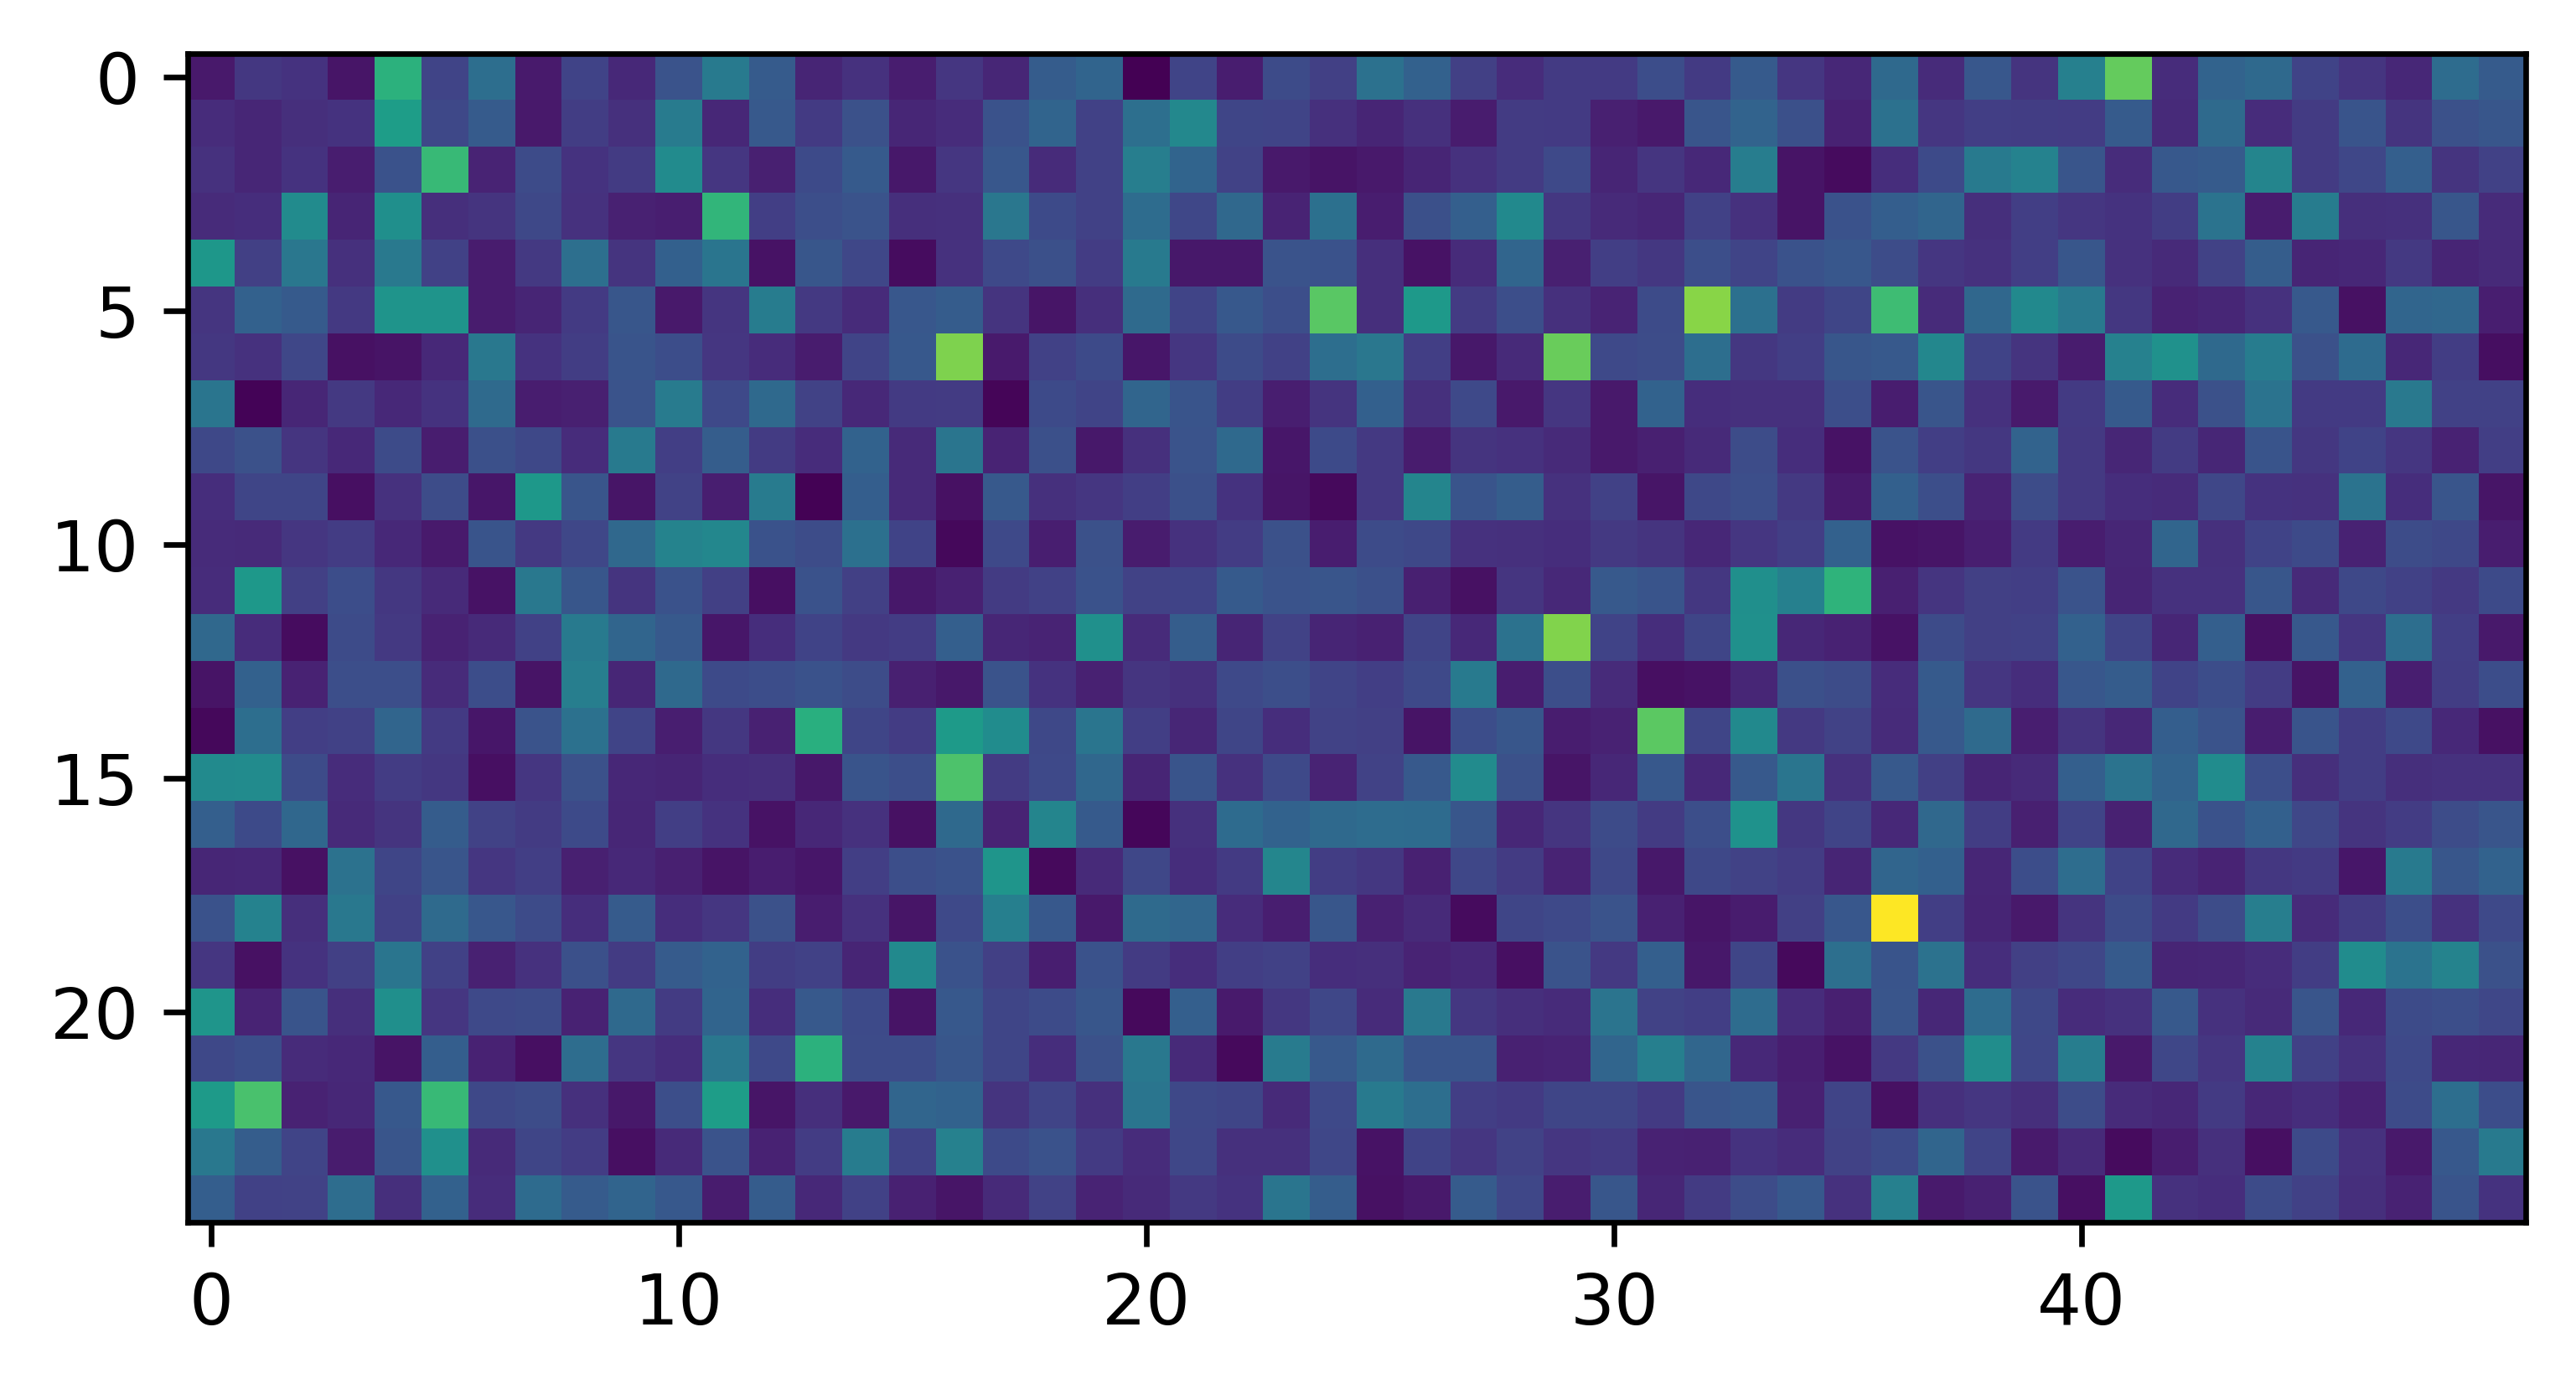

In [75]:
((_,row_details),(_,col_details))= dst2(image,('haar','haar'))

detect_pattern(S(row_details))
plt.gcf().set_dpi(600)
plt.imshow(S(row_details))
plt.show()

detect_pattern(S(col_details))
plt.gcf().set_dpi(600)
plt.imshow(S(col_details))
plt.show()

## Third Approach: Extending 1D Shapelet Detection Technique with several shapelets

In [111]:
def multi_shapelet_detection(image, pattern):
    horizontal_bands = []
    for i in range(pattern.shape[0]):
        horizontal_bands.append(pattern[i, :])

    vertical_bands = []
    for i in range(pattern.shape[1]):
        vertical_bands.append(pattern[:, i])
        
    horizontal_shapelets = []
    for band in horizontal_bands:
        horizontal_shapelets.append(build_shapelet(band))
    
    vertical_shapelets = []
    for band in vertical_bands:
        vertical_shapelets.append(build_shapelet(band))
        
    coef_details_cols = 0
    for shapelet in vertical_shapelets:
        (_, coef) = dst2_col(image, shapelet)
        coef_details_cols += coef
    coef_details_cols /= len(vertical_shapelets)
    
    coef_details_rows = 0
    for shapelet in horizontal_shapelets:
        (_, coef) = dst2_row(image, shapelet)
        coef_details_rows += coef
    coef_details_rows /= len(horizontal_shapelets)
    
    return coef_details_rows, coef_details_cols

In [100]:
def multi_shapelet_detection(image, pattern, threshold=0.6):
    horizontal_bands = []
    for i in range(pattern.shape[0]):
        horizontal_bands.append(pattern[i, :])

    vertical_bands = []
    for i in range(pattern.shape[1]):
        vertical_bands.append(pattern[:, i])
        
    horizontal_shapelets = []
    for band in horizontal_bands:
        horizontal_shapelets.append(build_shapelet(band))
    
    vertical_shapelets = []
    for band in vertical_bands:
        vertical_shapelets.append(build_shapelet(band))
        
    coef_details_cols = 0
    count = 0
    for shapelet in vertical_shapelets:
        (_, coef) = dst2_col(image, shapelet)
        pos = detect_pattern(S(coef), threshold)
        if len(pos)>0:
            coef_details_cols += coef
            count+=1
    coef_details_cols /= count
    
    coef_details_rows = 0
    count = 0
    for shapelet in horizontal_shapelets:
        (_, coef) = dst2_row(image, shapelet)
        pos = detect_pattern(S(coef), threshold)
        if len(pos)>0:
            coef_details_rows += coef
            count+=1
    coef_details_rows /= count
    
    return coef_details_rows, coef_details_cols

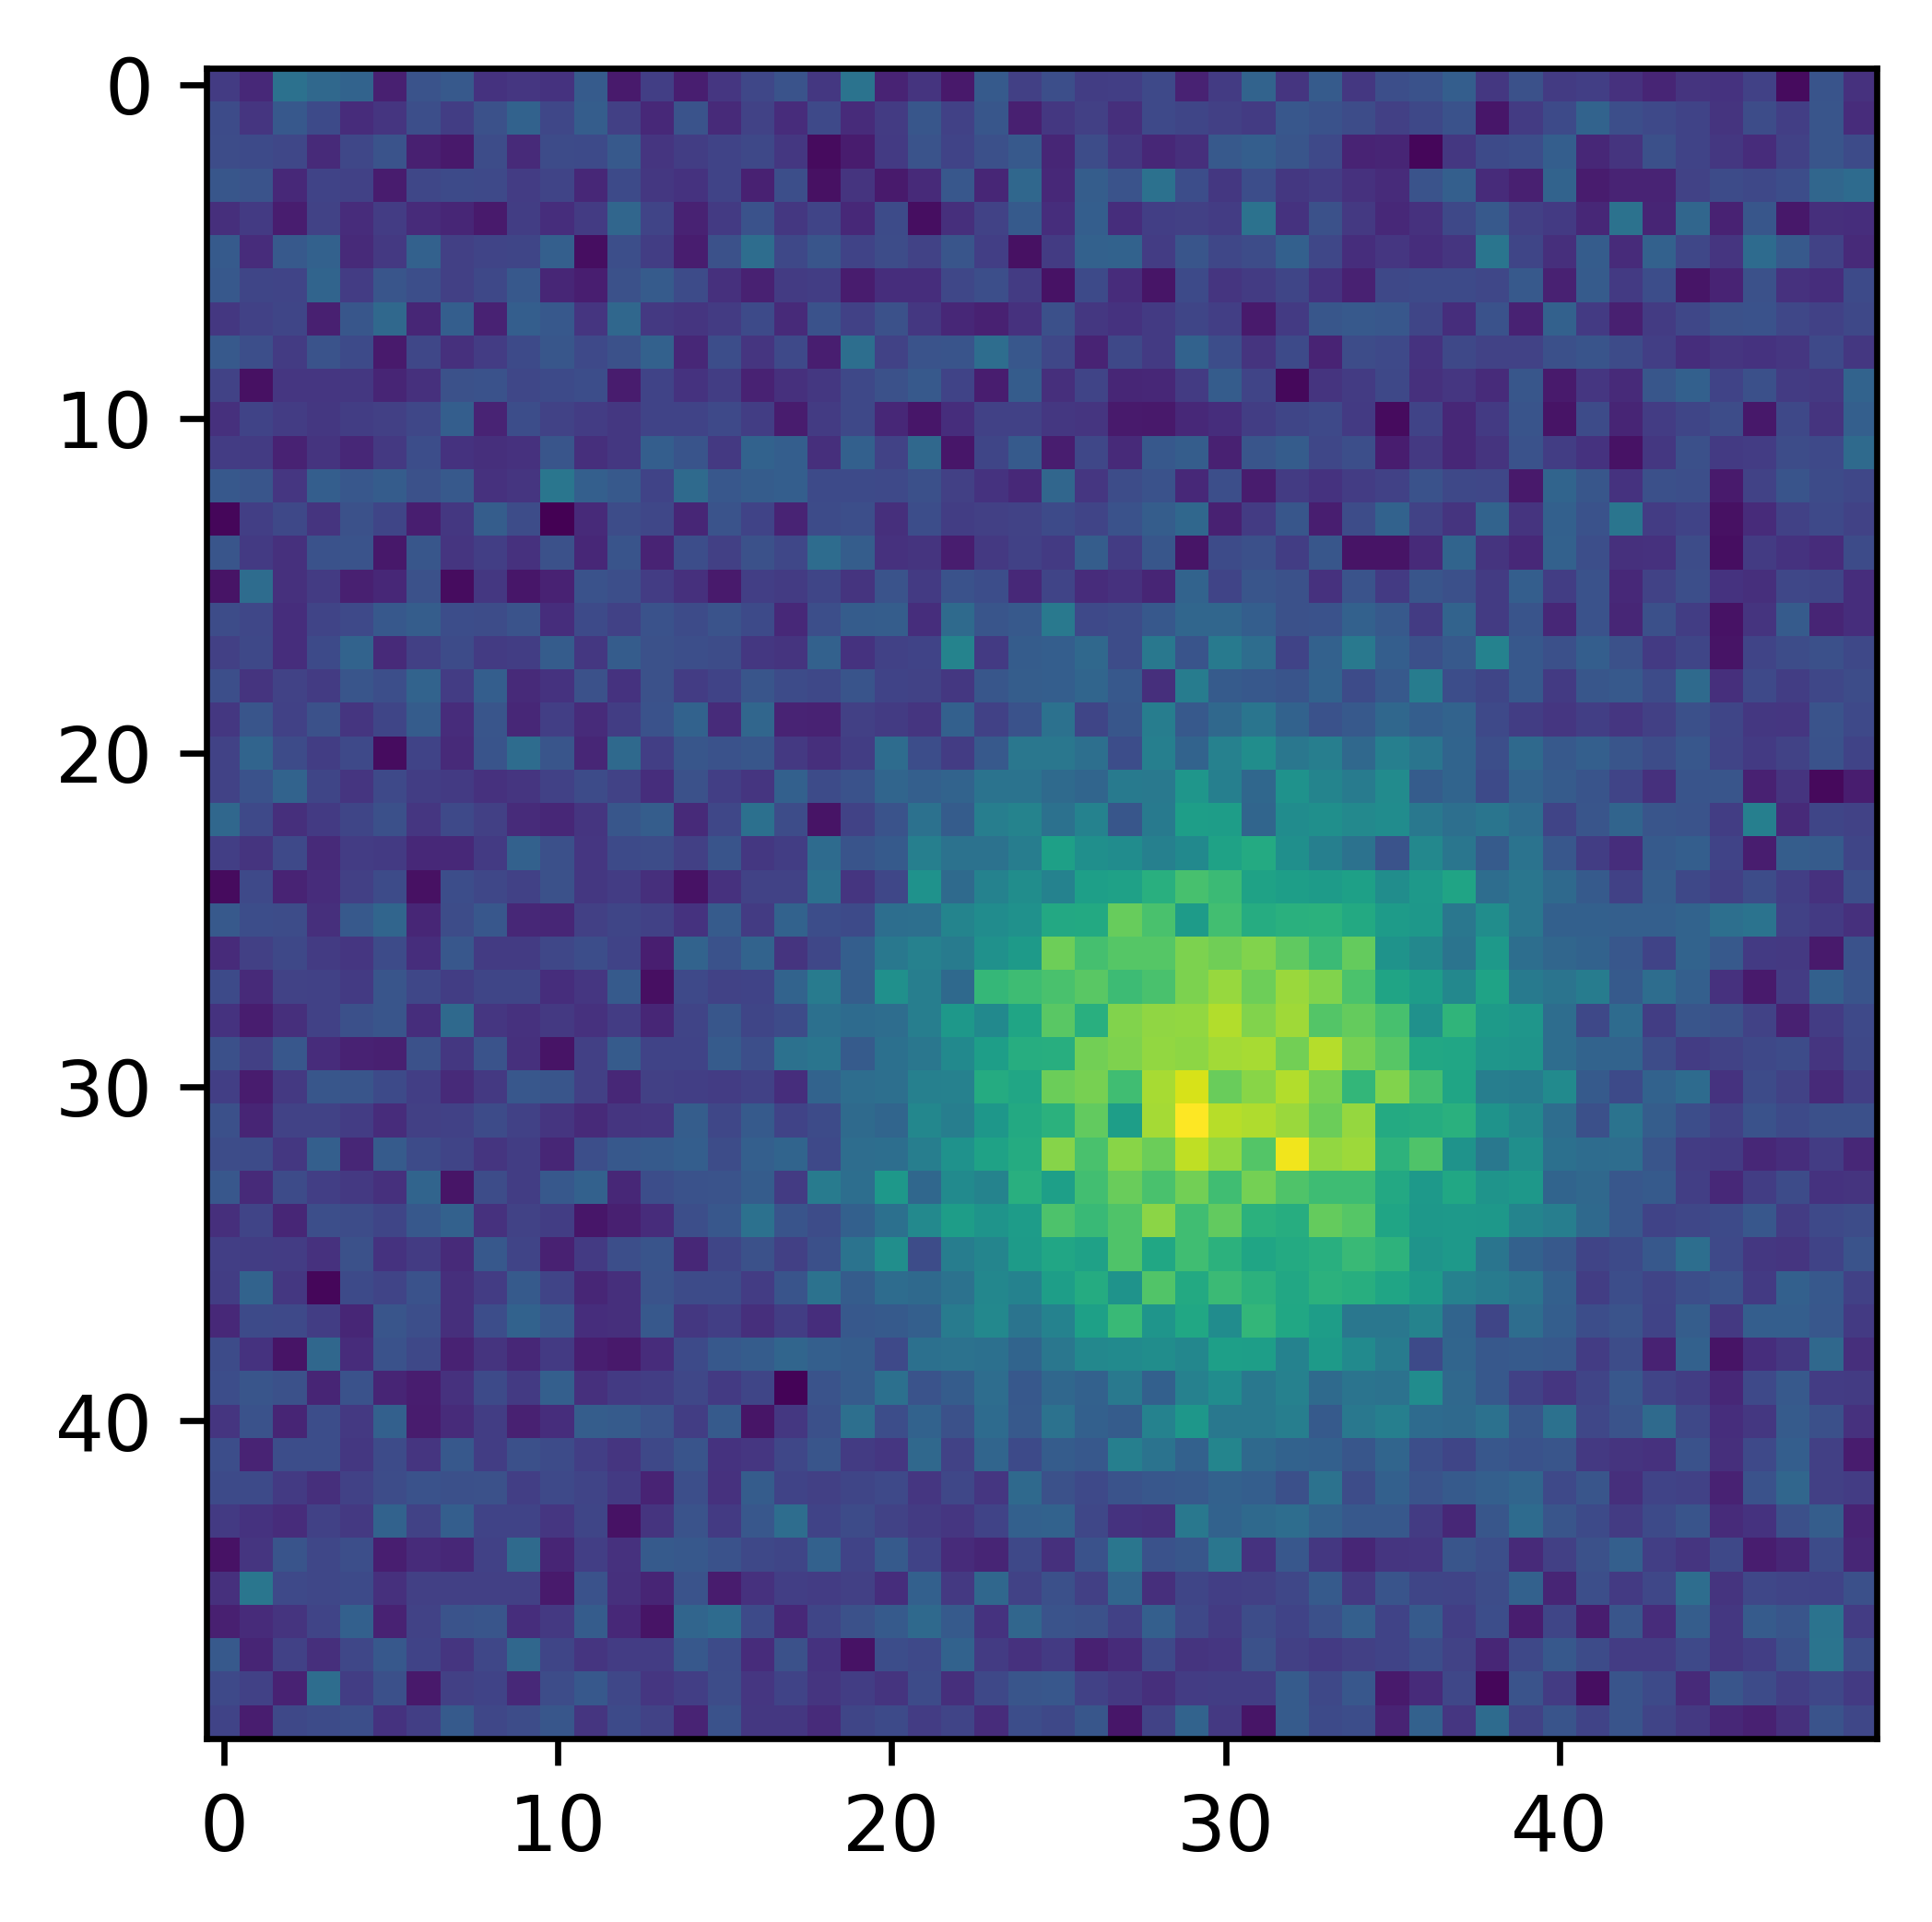

In [98]:
image = noisy_gaussian
plt.gcf().set_dpi(600)
plt.imshow(image)
plt.show()

[[0.5950683  0.60112889 0.8354776  0.75467113 0.51885573 0.73160678
  0.6178985  0.64333051 0.64891432 0.60410794 0.52000542 0.49344632
  0.29900909 0.43546708 0.29167516]
 [0.85094355 0.74246347 0.78737183 0.78613435 0.88401459 0.85443076
  0.89396942 0.81695674 0.7101227  0.82844143 0.46971621 0.3984583
  0.28011937 0.49851518 0.24698205]
 [0.75396927 0.79838872 0.71525014 0.75426765 0.88500363 0.94947037
  0.84805578 0.9540688  0.89655724 0.76059649 0.56877924 0.52228491
  0.39848291 0.56255434 0.32111264]
 [0.80120335 0.63620347 0.8946666  0.9284098  0.93826232 1.00127625
  0.89828899 0.9655008  0.78112337 0.82921642 0.7481393  0.45292299
  0.6689577  0.51063066 0.48197428]
 [0.62910095 0.86318867 0.88888539 0.93375098 0.92191378 0.97102736
  0.98141668 0.86111695 1.00873958 0.8719472  0.79207477 0.58989437
  0.58133726 0.4814198  0.47373637]
 [0.84336198 0.87338743 0.72671334 0.97820622 1.08387139 0.83829803
  0.91568564 1.00307382 0.88066193 0.68409404 0.89403252 0.73992885
  0.5

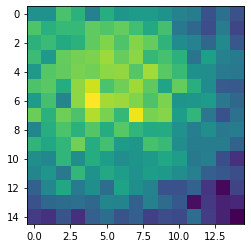

In [102]:
pattern = image[25:40, 25:40]
print(pattern)
plt.imshow(pattern)
plt.show()

Detection at position (3, 5) with value 0.607788673421712
Detection at position (4, 9) with value 0.7048357569763062
Detection at position (6, 5) with value 0.6417144245512877
Detection at position (7, 16) with value 0.6274109118114105
Detection at position (9, 1) with value 0.6596893308153701
Detection at position (11, 2) with value 0.6147276857018285
Detection at position (12, 0) with value 0.6134671801259555
Detection at position (14, 17) with value 0.6365873969654333
Detection at position (17, 14) with value 0.6924759438720289
Detection at position (21, 12) with value 0.615143184804265
Detection at position (24, 6) with value 0.617854328335891
Detection at position (24, 9) with value 0.6093082330908038
Detection at position (26, 21) with value 0.6002403748894454
Detection at position (29, 21) with value 0.6039838398074422
Detection at position (31, 3) with value 0.6065390462182748
Detection at position (34, 1) with value 0.7103101901036095
Detection at position (38, 18) with value 

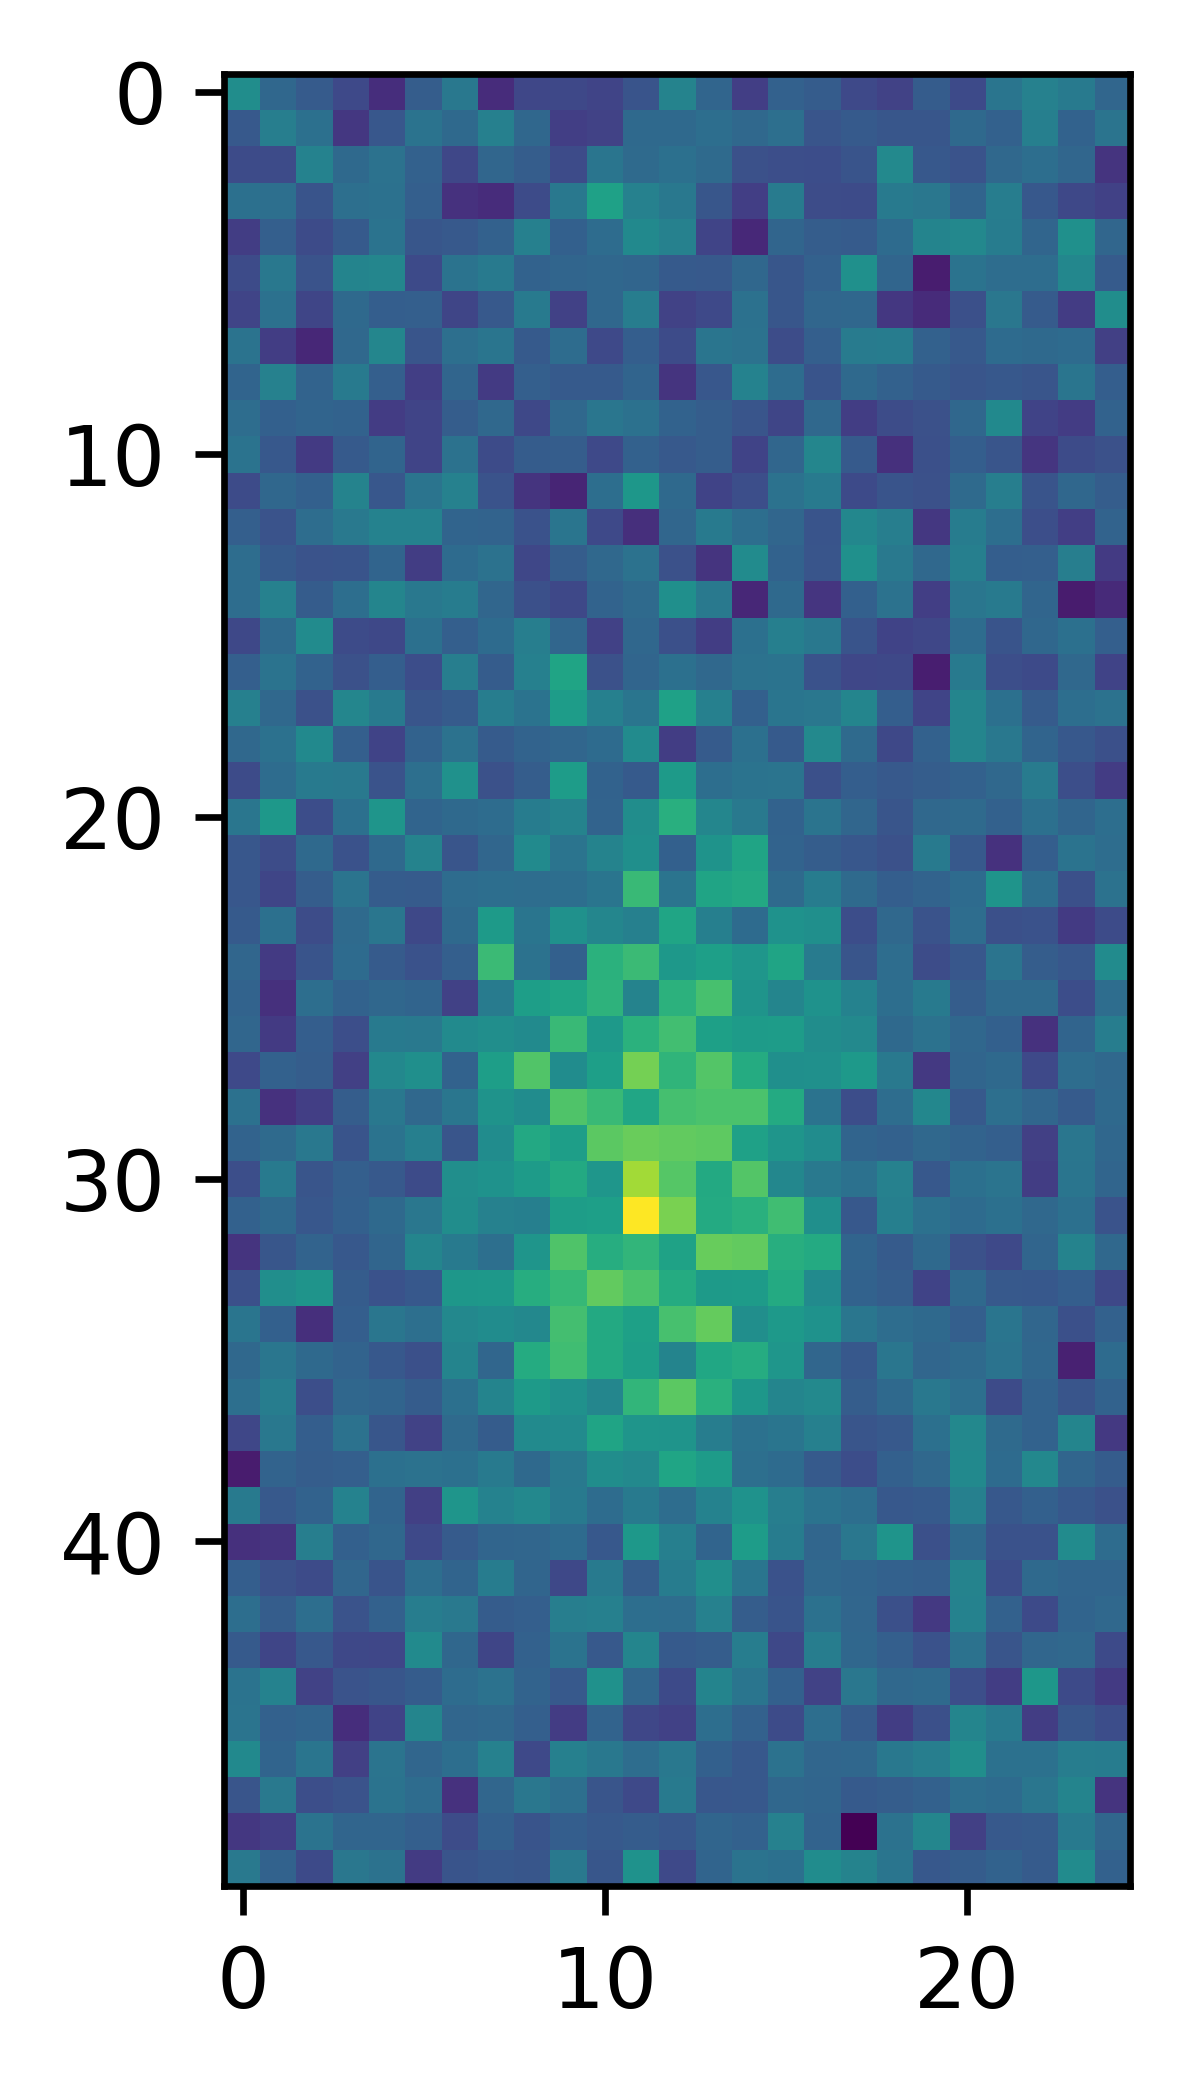

Detection at position (0, 44) with value 0.608061675907178
Detection at position (1, 10) with value 0.6042981695323537
Detection at position (1, 16) with value 0.6146368309810185
Detection at position (3, 26) with value 0.6320202436064182
Detection at position (3, 28) with value 0.6204983363047682
Detection at position (3, 47) with value 0.6093596580111506
Detection at position (3, 48) with value 0.6205488906599663
Detection at position (4, 23) with value 0.6228436557231021
Detection at position (4, 26) with value 0.6335963662494449
Detection at position (4, 40) with value 0.6081479360190223
Detection at position (7, 8) with value 0.6246352250184416
Detection at position (7, 14) with value 0.6521278064775236
Detection at position (8, 19) with value 0.6321845408252528
Detection at position (8, 34) with value 0.6405609017286038
Detection at position (9, 18) with value 0.6025655507663944
Detection at position (10, 5) with value 0.6050587411352777
Detection at position (11, 13) with value 

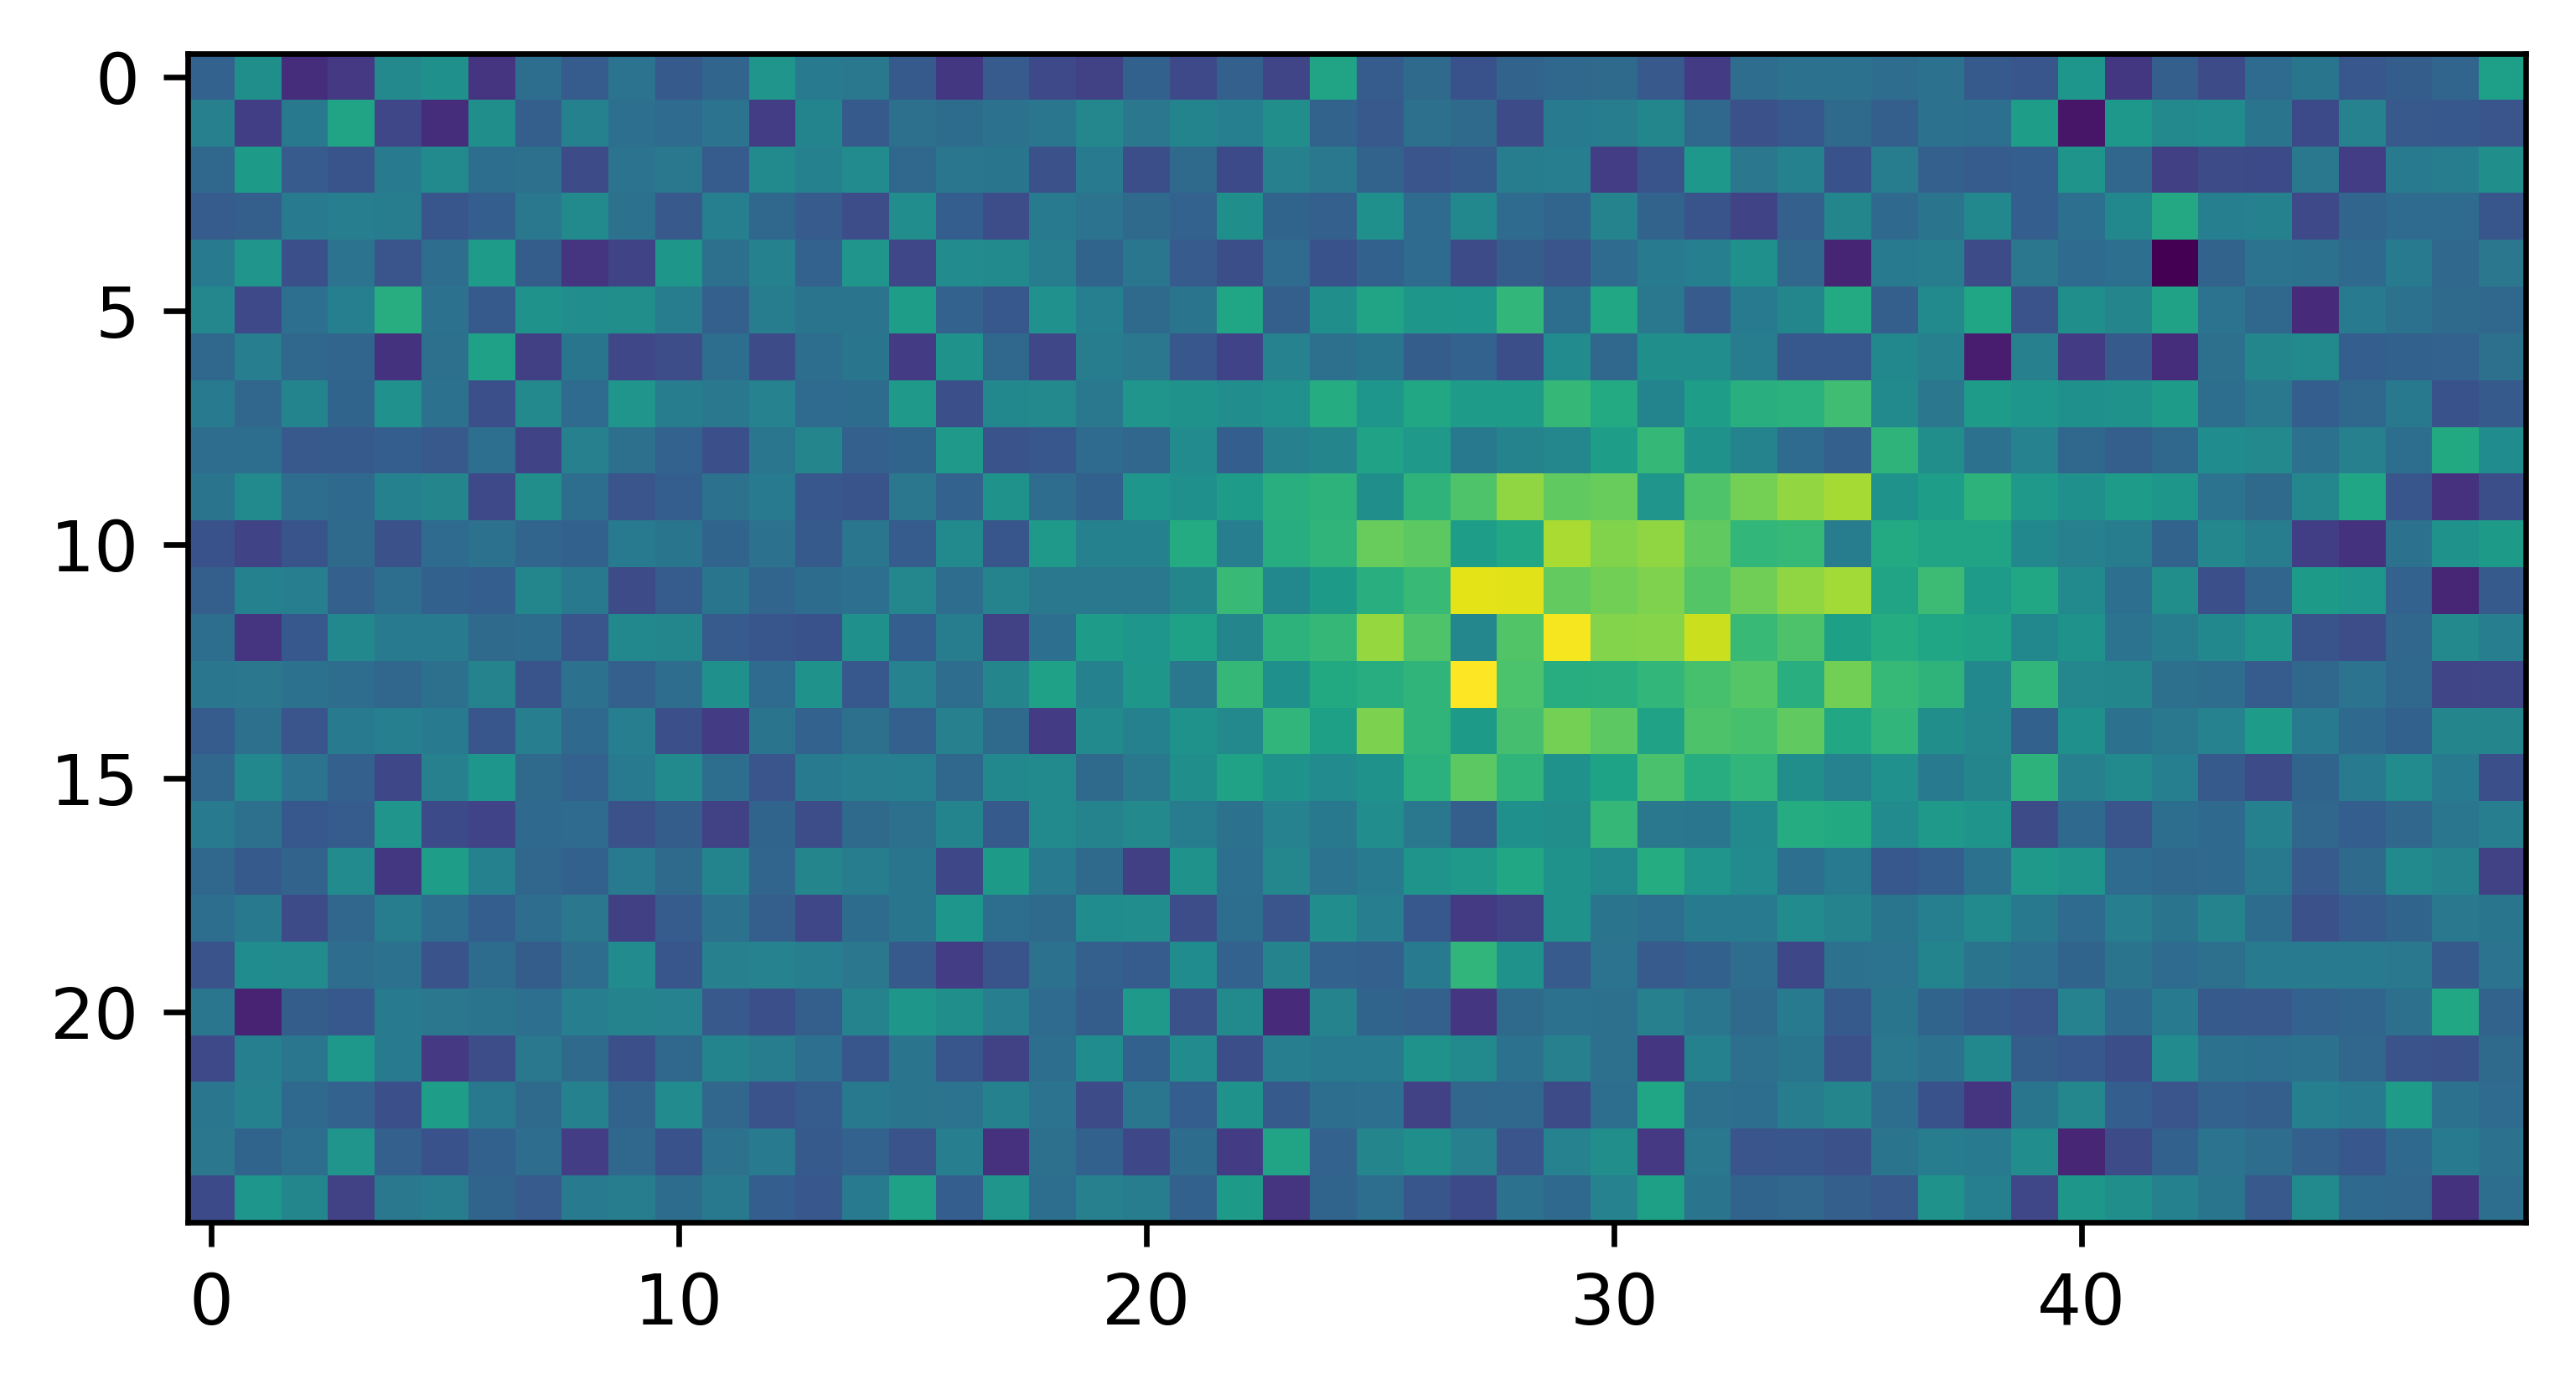

In [112]:
row_details, col_details = multi_shapelet_detection(image, pattern)

detect_pattern(S(row_details))
plt.gcf().set_dpi(600)
plt.imshow(row_details)
plt.show()

detect_pattern(S(col_details))
plt.gcf().set_dpi(600)
plt.imshow(col_details)
plt.show()